# 1. **Descripción del Problema y Objetivos**

## **Descripción del Problema y Objetivos**

El objetivo de este proyecto es diseñar un modelo de clasificación binaria capaz de identificar URLs de phishing, diferenciándolas de URLs legítimas. Para ello, se utilizará un dataset balanceado de 11,430 URLs etiquetadas, que incluye 87 características extraídas de tres categorías principales:

1. **Estructura y Sintaxis**: Analiza la composición del URL, incluyendo longitud, caracteres especiales y patrones sospechosos.
2. **Contenido Basado en la Página Web**: Incluye información sobre hipervínculos, elementos visuales (favicons, títulos) y formularios de login.
3. **Consultas Externas**: Datos derivados de servicios como WHOIS, DNS y Google Index.

La evaluación del modelo se realizará utilizando el **F1-score**, una métrica que equilibra precisión y recall, asegurando que el modelo detecte el mayor número posible de sitios de phishing, minimizando los falsos positivos. Este proyecto es parte de una competencia en Kaggle para estudiantes del curso "Modelos de Toma de Decisión" del Máster en Data Analytics de Loyola Andalucía (2024-25).

---

## **Resumen Clave del Dataset**

1. **Generalidades**:
   - **Dataset**: 11,430 URLs etiquetadas como phishing (50%) o legítimas (50%).
   - **Categorías de características**:
     - **Estructura y sintaxis (56)**: Análisis de la composición del URL, como longitud, caracteres especiales, y patrones.
     - **Basadas en contenido (24)**: Análisis del contenido de la página web, como hipervínculos, redirecciones y elementos visuales (favicons, títulos).
     - **Consultas externas (7)**: Datos extraídos de servicios externos, como WHOIS, DNS, y Google Index.

2. **Variables Relevantes**:
   - **Target (`status`)**: 
     - **0**: URL legítima.
     - **1**: URL de phishing.
   - **Componentes del URL**: Longitud del dominio (`length_hostname`), caracteres especiales (`nb_dots`, `nb_slash`), uso de HTTPS (`https_token`), etc.
   - **Contenido**: Hipervínculos internos y externos (`ratio_intHyperlinks`, `ratio_extHyperlinks`), formulario de login (`login_form`), presencia de `onmouseover` o `iframe`.
   - **Consultas externas**: Edad del dominio (`domain_age`), posición en Google Index (`google_index`), PageRank (`page_rank`).

3. **Propósito del Dataset**:
   - Diseñar un modelo de clasificación binaria que identifique URLs de phishing.
   - Evaluar el modelo con el **F1-score**, equilibrando precisión y recall.


# Categorías de Variables del Dataset de Phishing

## 1. Variable Objetivo
- **`status`**: Clasificación de la página (benigna o phishing).
    - **0**: URL legítima.
    - **1**: URL de phishing.

---

## 2. Variables de Estructura y Sintaxis
Estas variables están relacionadas con la estructura y los elementos sintácticos de la URL:

- **`url`**: URL completa de la página web analizada. Esta variable la eliminaremos, pero de momento la mantenemos por si necesitamos extraer nuevas características.
- **`length_url`**: Longitud total de la URL. URLs más largos pueden ser sospechosos.
- **`length_hostname`**: Longitud del nombre del host en la URL. Hostnames más largos pueden indicar phishing.
- **`ip`**: Indica si la URL contiene una dirección IP. Las URL con IP suelen ser redirecciones o URL sin dominio contratado, lo que es indicio de phishing.
- **`nb_dots`**: Número de puntos ('.') en la URL. Normalmente dos puntos es normal. Uno tras el www. y otro antes del .com, si el dominio no tiene www, suele tener un punto que divide el dominio del subdominio y el punto antes del .com. POr tanto mas de dos nb_dots es un caso extraño y posible de phishing.
- **`nb_hyphens`**: Número de guiones ('-') en la URL. Es normal encontrar algún guión en dominios, pero demasiados guiones es indicador de phishing.
- **`nb_at`**: Número de símbolos '@' en la URL. No es normal encontrar una @ en las url, generalmente se usan para usuarios en linux, por lo que una @ puede ser indicador de phishing.
- **`nb_qm`**: Número de signos de interrogación ('?') en la URL. Las url con signos de interrogación suelen ser url con parametros, a veces de filtrado en url. Es normal encontrar uno, pero varios es indicador de phishing.
- **`nb_and`**: Número de símbolos '&' en la URL. Suelen aparecer en parametros, aunque demasiadas puede ser indicativo de phishing.
- **`nb_or`**: Número de operadores '||' en la URL. No suelen aparecer en URL normales.
- **`nb_eq`**: Número de signos de igual ('=') en la URL. Suelen aparecer en algunas URL con parámetros. 
- **`nb_underscore`**: Número de guiones bajos ('_') en la URL. No es normal encontrar URL con guiones bajos.
- **`nb_tilde`**: Número de símbolos '~' en la URL. Se usa con expresiones regulares o parámetros.
- **`nb_percent`**: Número de símbolos '%' en la URL. Se usa para expresiones regulares o parámetros.
- **`nb_slash`**: Número de barras diagonales ('/') en la URL. Es común encontrarlas en URL varias veces, pero demasiadas puede buscar confundir al usuario.
- **`nb_star`**: Número de asteriscos ('*') en la URL. No es común encontrarlos
- **`nb_colon`**: Número de dos puntos (':') en la URL. Es común encontrarlos tras el https, es decir, una sola vez
- **`nb_comma`**: Número de comas (',') en la URL. No es común encontrar comas en las URL
- **`nb_semicolumn`**: Número de puntos y comas (';') en la URL. Es común encontrarlos en parámetros
- **`nb_dollar`**: Número de símbolos '$' en la URL. Suelen usarse para parámetros en las URL.
- **`nb_space`**: Número de espacios en la URL. No es común encontrar espacios en las URL
- **`nb_www`**: Número de apariciones de 'www' en la URL. Normalmente solo debe aparecer una vez, si aparecen más de una suelen ser redirecciones y es muy probable que sea phishing.
- **`nb_com`**: Número de apariciones de '.com' en la URL. Lo normal es que aparezca solo una vez, más veces, puede indicar una redireccion y ser phishing.
- **`nb_dslash`**: Número de dobles barras diagonales ('//') en la URL. A veces se usa doble barra en algunos entornos, aunque no es lo normal
- **`http_in_path`**: Indica si 'http' aparece en la ruta. 
- **`https_token`**: Indica si 'https' aparece como token. Generalmente tener https indica conexión cifrada, aunque ultimamente los buscadores bloquean las webs sin https por lo que hoy en día no es un aspecto diferenciador.
- **`ratio_digits_url`**: Proporción de dígitos en la URL respecto a su longitud. Webs con demasiados digitos en la url suelen indicar phishing. Ya que se usan para confundir al usuario o simular letras.
- **`ratio_digits_host`**: Proporción de dígitos en el host respecto a su longitud. Es más común encontrar digitos en las subdirecciones, por lo que demasiados digitos en el host puede indicar phishing.
- **`punycode`**: Indica si la URL utiliza Punycode. A veces se usa punycode para confundir al usuario, habría que ver si es relevante.
- **`port`**: Indica si la URL especifica un puerto. Es normal encontrar puertos en API, o servidores legítimos.
- **`tld_in_path`**: Indica si el TLD (.com) aparece en la ruta
- **`tld_in_subdomain`**: Indica si el TLD aparece en el subdominio. Esto suele usarse para phishing, haciendo creer que el usuario esta en la direccion del subdominio, en vez de en la original (Ej. dell.com.secure.login.net)
- **`abnormal_subdomain`**: Subdominio sospechoso. Indica si el nombre del subdominio está marcado como sospechoso.
- **`nb_subdomains`**: Número de subdominios en la URL. Demasiados subdomnios indica phishing.
- **`prefix_suffix`**: Indica si el dominio contiene guiones. Es normal encontrar dominios con guiones, pero no es normal encontrar demasiados guiones, ya que esto se utilizaría para confundir al usuario.
- **`random_domain`**: Indica si el dominio parece aleatorio. Usualmente se usan dominios random con webs generadas automaticamente.
- **`shortening_service`**: Uso de servicios de acortamiento. Es común que se usen acortadores de URL, aunque los sitios de phishing tambien suelen usarlos.
- **`path_extension`**: Ruta con extensiones.
- **`nb_redirection`**: Número de redirecciones en la URL. Puede indicar phishing.
- **`nb_external_redirection`**: Redirecciones a dominios externos.
- **`length_words_raw`**: Longitud total de palabras en la URL. URLs con palabras excesivamente largas o con muchas palabras pueden ser sospechosas.
- **`char_repeat`**: Máxima repetición consecutiva de caracteres.
- **`shortest_words_raw`**: Longitud de la palabra más corta en la URL. URLs con palabras extremadamente cortas pueden ser indicativas de diseño malicioso para engañar al usuario o dificultar su análisis.
- **`shortest_word_host`**: Longitud de la palabra más corta en el host. Dominios con palabras muy cortas en el host, como a.com o x.biz, podrían ser indicadores de sitios maliciosos
- **`shortest_word_path`**: Longitud de la palabra más corta en la ruta. Las rutas con palabras extremadamente cortas, como a o 1, pueden ser indicativas de sitios diseñados para parecer más simples o engañar al usuario
- **`longest_words_raw`**: Longitud de la palabra más larga en la URL. el uso de palabras largas, que podrían ser indicativas de URLs maliciosas complejas
- **`longest_word_host`**: Longitud de la palabra más larga en el host. Se enfoca en el host, ayudando a identificar dominios sospechosos que usan palabras largas para parecer legítimos o confundir al usuario.
- **`longest_word_path`**: Longitud de la palabra más larga en la ruta. Recursos específicos con palabras largas, que a menudo se encuentran en URLs legítimas detalladas o en ataques sofisticados.
- **`avg_words_raw`**: Longitud promedio de palabras en la URL.
- **`avg_word_host`**: Longitud promedio de palabras en el host.
- **`avg_word_path`**: Longitud promedio de palabras en la ruta.

---

## 3. Contenido Basado en la Web
Variables que describen elementos o características del contenido de la página web:
- **`phish_hints`**: Presencia de palabras asociadas al phishing. Predictor importante
- **`domain_in_brand`**: Indica si el dominio contiene una marca conocida.
- **`brand_in_subdomain`**: Indica si una marca aparece en el subdominio.
- **`brand_in_path`**: Indica si una marca aparece en la ruta.
- **`suspecious_tld`**: Indica si el TLD es sospechoso.
- **`statistical_report`**: Basado en reportes estadísticos previos.
- **`login_form`**: Indica si la página contiene un formulario de login.
- **`external_favicon`**: Indica si el favicon está alojado externamente.
- **`links_in_tags`**: Número de enlaces dentro de etiquetas.
- **`submit_email`**: Indica si hay formularios que envían datos a correos.
- **`iframe`**: Indica si se utilizan iframes.
- **`popup_window`**: Indica si hay ventanas emergentes.
- **`safe_anchor`**: Proporción de anclas seguras en los enlaces.
- **`onmouseover`**: Indica uso de eventos onmouseover sospechosos.
- **`right_clic`**: Deshabilitación del clic derecho.
- **`empty_title`**: Título vacío en la página.
- **`domain_in_title`**: Presencia del dominio en el título de la página.
- **`domain_with_copyright`**: Indica si el dominio tiene copyright.

---

## 4. Consultas Externas
Variables que requieren información de fuentes externas como bases de datos o servicios externos:
- **`whois_registered_domain`**: Dominio registrado en WHOIS.
- **`domain_registration_length`**: Tiempo de registro del dominio.
- **`domain_age`**: Antigüedad del dominio. Buen predictor, ya que las páginas de phishing acaban denunciadas o cambiando de dominio.
- **`web_traffic`**: Indicador de tráfico web hacia la página.
- **`dns_record`**: Indica si hay un registro DNS válido.
- **`google_index`**: Indica si la página está indexada en Google.
- **`page_rank`**: Indicador del PageRank del dominio.
- **`nb_hyperlinks`**: Número de hipervínculos en la página.
- **`ratio_intHyperlinks`**: Proporción de hipervínculos internos.
- **`ratio_extHyperlinks`**: Proporción de hipervínculos externos.
- **`ratio_nullHyperlinks`**: Proporción de hipervínculos nulos.
- **`nb_extCSS`**: Número de enlaces a archivos CSS externos.
- **`ratio_intRedirection`**: Proporción de redirecciones internas.
- **`ratio_extRedirection`**: Proporción de redirecciones externas.
- **`ratio_intErrors`**: Proporción de errores internos.
- **`ratio_extErrors`**: Proporción de errores externos.
- **`ratio_intMedia`**: Proporción de medios internos.
- **`ratio_extMedia`**: Proporción de medios externos.


# 2 Importar Librerías

En esta sección, se importan todas las librerías necesarias para el análisis, preprocesamiento, visualización y modelado. 

1. **Manipulación y análisis de datos:** `pandas` y `numpy` se utilizarán para gestionar y analizar los datos.
2. **Visualización:** `matplotlib` y `seaborn` para explorar los datos gráficamente.
3. **Modelos y preprocesamiento:** Incluimos herramientas de `scikit-learn` para preprocesar los datos, dividir conjuntos y aplicar modelos de machine learning.
4. **Métricas y análisis estadístico:** Se incluyen librerías para evaluar el rendimiento del modelo y analizar los datos estadísticamente.
5. **Configuración global:** Configuramos la semilla aleatoria para garantizar reproducibilidad, desactivamos notación científica en los datos y ajustamos el estilo de las visualizaciones.


In [241]:
## **2.2 Importar Librerías**

# Importar librerías esenciales
import pandas as pd  # Manipulación y análisis de datos
import numpy as np  # Operaciones matemáticas y numéricas

# Librerias estadisticas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency, shapiro, levene, kruskal, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# --- Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para preprocesamiento
from sklearn.model_selection import train_test_split  # División de datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Normalización de datos

# Librerías para modelos de machine learning
from sklearn.ensemble import RandomForestClassifier  # Modelo de clasificación basado en bosques aleatorios
from sklearn.linear_model import LogisticRegression  # Regresión logística para clasificación
from sklearn.tree import DecisionTreeClassifier  # Árbol de decisión

# Librerías para evaluación de modelos
from sklearn.metrics import classification_report, confusion_matrix, f1_score  # Métricas de evaluación

# --- Otras herramientas
import math
import random
from IPython.display import display
import joblib
import datetime
import time
from scipy.stats import chi2_contingency

# Desactivar notacion cientifica
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# ===============================
# CONFIGURACIÓN GLOBAL
# ===============================

# Configurar Pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Configuración adicional
import warnings
warnings.filterwarnings("ignore")  # Ignorar advertencias para mantener el output limpio

# --- Configuración de la semilla aleatoria
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# --- Configuración de gráficos
sns.set_palette('viridis')
plt.style.use('ggplot')


Se han cargado correctamente todas las librerías necesarias para el análisis y se ha establecido la configuración global:

- **Semilla aleatoria:** Configurada para garantizar la reproducibilidad en todas las operaciones aleatorias.
- **Notación científica:** Desactivada para facilitar la interpretación de los resultados.
- **Visualizaciones:** Configuradas con la paleta `viridis` y el estilo `ggplot` para gráficos consistentes y atractivos.
- **Advertencias:** Ignoradas para mantener el entorno de trabajo limpio.


### Variable `is_weird`

Se define una lista llamada `is_weird`, que se utilizará para identificar y almacenar aquellas características del dataset que, aunque tienen baja representatividad estadística, muestran un alto poder predictivo. 

**Objetivo:**
- Durante el modelado, se calculará una puntuación para cada URL sumando 1 punto por cada característica presente en `is_weird` que aplique.
- **Hipótesis:** A mayor puntuación en `is_weird`, mayor será la probabilidad de que la URL sea phishing.

Esta estrategia permite incorporar información clave y específica al modelo, mejorando su capacidad predictiva.


In [242]:
is_weird = []

La lista `is_weird` ha sido creada con éxito. Este enfoque asegura que las características seleccionadas como "raras pero relevantes" sean consideradas en el cálculo de probabilidad de phishing, añadiendo una capa adicional de análisis al modelo.


## **2.3. Funciones**

### Funciones para el Análisis Exploratorio y Relacional

Se definen varias funciones para el análisis de datos, detección de outliers, y evaluación de relaciones entre variables. Estas funciones serán usadas durante la exploración y modelado para identificar patrones relevantes y validar hipótesis.

1. **Detección de Outliers:**
   - `detect_outliers_all_columns(df)`: Detecta valores atípicos en columnas numéricas usando el rango intercuartil (IQR).

2. **Análisis de Relaciones:**
   - `analizar_relacion(df, variable_1, variable_2)`: Evalúa relaciones entre una variable categórica y una numérica mediante pruebas estadísticas (ANOVA, Kruskal-Wallis, etc.).
   - `analisis_contingencia(df, x, target)`: Analiza relaciones entre variables categóricas usando matrices de contingencia y gráficos.
   - `binary_analysis(df, x, target, criterion, value)`: Convierte variables numéricas en binarias según un criterio y analiza su relación con una variable objetivo.

3. **Análisis por Intervalos:**
   - `interval_analysis(df, column, target, intervals, labels=None)`: Divide una variable continua en intervalos y analiza la distribución del target en cada intervalo.
   - `categorize_and_analyze(df, column, target, bins, labels=None)`: Categoriza una variable continua en intervalos y evalúa su relación con el target.

Estas herramientas son fundamentales para entender el comportamiento de los datos y ajustar el modelo de manera efectiva.


In [243]:
# Función para detectar outliers en todas las columnas numéricas
def detect_outliers_all_columns(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return pd.DataFrame(list(outlier_counts.items()), columns=['Variable', 'Outlier_Count'])



# Definir la función
def analizar_relacion(df, variable_1, variable_2):
    """
    Analiza la relación entre dos variables mediante pruebas estadísticas.

    Parámetros:
    - df: DataFrame con los datos.
    - variable_1: Variable categórica.
    - variable_2: Variable numérica.

    Devuelve:
    - Resultados y conclusión sobre la relación entre las variables.
    """
    try:
        # Separar los grupos según la variable categórica
        grupos = [df[df[variable_1] == categoria][variable_2] for categoria in df[variable_1].unique()]

        # 1. Comprobación de normalidad (Shapiro-Wilk para cada grupo)
        normalidad = all(shapiro(grupo.dropna())[1] > 0.05 for grupo in grupos)

        # 2. Comprobación de independencia (verificada por diseño del dataset)
        independencia = True  # Por defecto asumimos independencia

        # 3. Comprobación de homocedasticidad (Levene Test)
        homocedasticidad = levene(*grupos).pvalue > 0.05

        print("Resultados de las pruebas preliminares:")
        print(f"Normalidad: {'Cumple' if normalidad else 'No cumple'}")
        print(f"Independencia: {'Cumple' if independencia else 'No cumple'}")
        print(f"Homocedasticidad: {'Cumple' if homocedasticidad else 'No cumple'}")

        # 4. Selección del test
        if normalidad and homocedasticidad and independencia:
            # Aplicar ANOVA
            anova_pvalue = f_oneway(*grupos).pvalue

            if anova_pvalue < 0.05:
                print(f"ANOVA: Las variables están relacionadas (p-value = {anova_pvalue:.4f})")

                # Prueba post hoc (Tukey HSD)
                tukey = pairwise_tukeyhsd(df[variable_2], df[variable_1])
                print(tukey)
                conclusion = "Las variables están relacionadas según ANOVA, con diferencias significativas entre ciertos grupos."
            else:
                print(f"ANOVA: No hay relación significativa (p-value = {anova_pvalue:.4f})")
                conclusion = "No hay relación significativa según ANOVA."
        else:
            # Aplicar prueba no paramétrica (Kruskal-Wallis)
            kruskal_pvalue = kruskal(*grupos).pvalue

            if kruskal_pvalue < 0.05:
                print(f"Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = {kruskal_pvalue:.4f})")
                conclusion = "Las variables están relacionadas según Kruskal-Wallis, pero los supuestos de ANOVA no se cumplieron."
            else:
                print(f"Prueba de Kruskal-Wallis: No hay relación significativa (p-value = {kruskal_pvalue:.4f})")
                conclusion = "No hay relación significativa según Kruskal-Wallis."

        return conclusion

    except Exception as e:
        print(f"Error al analizar las variables: {e}")
        return "No se pudo realizar el análisis."
    
def analisis_contingencia (df, x,target):
    '''
    Función para analizar la relación entre dos variables categóricas mediante la matriz de contingencia y el test de chi-cuadrado.

    Parámetros:
    - df: DataFrame con los datos.
    - x: Variable categórica 1.
    - target: Variable categórica 2.
    
    '''
    # Ver la distribucion de "http_in_path" con la variable objetivo 'status'

    df_visual = df.copy()

    sns.histplot(data=df, x=x, hue=target, palette='Set2', element='step')
    plt.title(f'Distribución de {x} según `status`')

    plt.show()

    # Calcular la matriz de contingencia
    contingency_table = pd.crosstab(df[x], df_visual[target])
    print("Matriz de Contingencia:")
    # maximo 10 valores
    display(contingency_table.head(10))

def binary_analysis(df, x, target, criterion, value):
    """
    Función para analizar la relación entre una variable binaria y una variable objetivo mediante
    la matriz de contingencia y el test de chi-cuadrado.

    Parámetros:
    - df: DataFrame con los datos.
    - x: Variable numérica a convertir en binaria.
    - target: Variable objetivo categórica.
    - criterion: Criterio para dividir la variable ('<', '<=', '>', '>=', '==').
    - value: Valor para aplicar el criterio.
    """

    # Crear la columna binaria
    have_variable = f'have_{x}'
    if criterion == '<':
        df[have_variable] = (df[x] < value).astype(int)
    elif criterion == '<=':
        df[have_variable] = (df[x] <= value).astype(int)
    elif criterion == '>':
        df[have_variable] = (df[x] > value).astype(int)
    elif criterion == '>=':
        df[have_variable] = (df[x] >= value).astype(int)
    elif criterion == '==':
        df[have_variable] = (df[x] == value).astype(int)
    elif criterion == '!=':
        df[have_variable] = (df[x] != value).astype(int)
    else:
        raise ValueError("Criterio no válido. Usa '<', '<=', '>', '>=', o '=='.")

    # Visualización
    sns.histplot(data=df, x=have_variable, hue=target, palette='Set2', element='step')
    plt.title(f'Distribución de {have_variable} según {target}')
    plt.show()

    # Relación estadística
    analizar_relacion(df, have_variable, target)

    # Calcular la matriz de contingencia
    
    contingency_table = pd.crosstab(df[have_variable], df[target])
    print("Matriz de Contingencia:")
    display(contingency_table)

    # Calcular el coeficiente de contingencia
    C, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Coeficiente de Contingencia: {C:.4f}")
    print(f"p-value: {p:.4f}")

def interval_analysis(df, column, target, intervals, labels=None):
    """
    Divide una columna numérica en intervalos y analiza la distribución del target en cada intervalo.

    Args:
        df: DataFrame de pandas.
        column: Nombre de la columna a dividir en intervalos.
        target: Nombre de la columna target (variable dependiente).
        intervals: Lista de puntos de corte para los intervalos. Debe incluir el valor mínimo y máximo deseados.
                   Ej: [0, 0.2, 0.5, 1] crea intervalos (0, 0.2], (0.2, 0.5], (0.5, 1].
                   Si se proporciona un entero, se generan intervalos equiespaciados.
        labels: Lista opcional de etiquetas para los intervalos. Si no se proporciona, se usan etiquetas por defecto.

    Returns:
        DataFrame con el análisis de cada intervalo.
        O None si hay un error en los argumentos.
    """

    if not isinstance(df, pd.DataFrame):
        print("Error: df debe ser un DataFrame de pandas.")
        return None

    if not all(col in df.columns for col in [column, target]):
      print(f"Error: Las columnas {column} o {target} no existen en el DataFrame.")
      return None

    if isinstance(intervals, int):
        if intervals <= 1:
            print("Error: Si 'intervals' es un entero, debe ser mayor que 1.")
            return None
        min_val = df[column].min()
        max_val = df[column].max()
        intervals = np.linspace(min_val, max_val, intervals + 1)
    elif not isinstance(intervals, list):
        print("Error: 'intervals' debe ser una lista o un entero.")
        return None
    
    if labels and len(labels) != len(intervals) - 1:
        print("Error: El número de etiquetas debe ser igual al número de intervalos menos 1.")
        return None

    try:
        df['interval'] = pd.cut(df[column], bins=intervals, labels=labels, include_lowest=True, right=True)
    except ValueError as e:
        print(f"Error al crear los intervalos: {e}")
        return None

    interval_analysis = df.groupby('interval')[target].value_counts(normalize=True).unstack().fillna(0)
    interval_analysis['Total'] = df.groupby('interval')[target].count()
    return interval_analysis.reset_index()

def categorize_and_analyze(df, column, target, bins, labels=None):
    """
    Agrupa una variable continua en intervalos y analiza su relación con la variable objetivo.

    Args:
        df: DataFrame de pandas.
        column: Nombre de la columna continua a categorizar.
        target: Nombre de la variable objetivo.
        bins: Número de intervalos (o lista de cortes personalizados).
        labels: Lista opcional de etiquetas para los intervalos.

    Returns:
        DataFrame con la relación entre los intervalos y la variable objetivo.
    """
    if column not in df.columns or target not in df.columns:
        raise ValueError(f"Las columnas '{column}' o '{target}' no existen en el DataFrame.")

    # Categorizar la columna continua en intervalos
    if isinstance(bins, int):
        df[f"{column}_interval"] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)
    elif isinstance(bins, list):
        if labels and len(labels) != len(bins) - 1:
            raise ValueError("El número de etiquetas debe coincidir con el número de intervalos menos 1.")
        df[f"{column}_interval"] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)
    else:
        raise ValueError("'bins' debe ser un entero o una lista de puntos de corte.")

    # Analizar la relación con la variable objetivo
    interval_analysis = df.groupby(f"{column}_interval")[target].value_counts(normalize=True).unstack().fillna(0)
    interval_analysis['Total'] = df.groupby(f"{column}_interval")[target].count()
    
    return interval_analysis.reset_index()


### Resultados de las Funciones

Se han definido con éxito las siguientes funciones para el análisis y preprocesamiento de datos:

1. **Detección de Outliers:** 
   - La función `detect_outliers_all_columns()` está lista para identificar valores atípicos en todas las columnas numéricas del dataset.

2. **Análisis de Relaciones:**
   - `analizar_relacion()`, `analisis_contingencia()` y `binary_analysis()` permiten explorar las relaciones entre variables categóricas, binarias y continuas mediante pruebas estadísticas y visualizaciones.

3. **Análisis por Intervalos:**
   - `interval_analysis()` y `categorize_and_analyze()` ofrecen métodos flexibles para dividir variables continuas en intervalos y analizar su impacto en la variable objetivo.

Estas herramientas proporcionan una base sólida para la exploración de datos y la identificación de patrones clave en el dataset.


# **3. Exploración Inicial**

### Carga y Exploración de los Datasets



En esta sección se cargan los datasets de entrenamiento y prueba, y se realiza una exploración inicial del dataset de entrenamiento para entender su estructura y características clave.

**Pasos realizados:**
1. **Carga de datos:** Se importan los archivos `train.csv` y `test.csv`.
2. **Vista preliminar:** Se visualizan las primeras filas del dataset de entrenamiento.
3. **Información general:** Se inspecciona la estructura del dataset (`info`) y se generan estadísticas descriptivas (`describe`).
4. **Valores nulos:** Se verifica la presencia de valores nulos en las columnas.
5. **Distribución de la variable objetivo (`status`):** Se analiza la frecuencia de cada categoría en la variable objetivo mediante un gráfico de barras.

Este análisis inicial proporciona una comprensión básica de los datos y permite identificar posibles problemas o tendencias en el dataset.


Primeras filas del dataset de entrenamiento:


url  length_url  \
0  https://help.ubuntu.com/community/Mobile%20Bro...          80   
1                     http://www.voipoid.com/telekom          30   
2  http://usbank-link-mupyndtfft---com.illmickels...          58   
3     http://www.flaticon.com/free-icons/parking_403          46   
4                             https://www.hivos.org/          22   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               15   0        2           0      0      0       0      0  ...   
1               15   0        2           0      0      0       0      0  ...   
2               50   0        2           5      0      0       0      0  ...   
3               16   0        2           1      0      0       0      0  ...   
4               13   0        2           0      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                1                      0                        0   
1                1                      1                        0   
2                1                      0                        0   
3                1                      1                        0   
4                0                      0                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                         676        5897         2688           0   
1                         206         889            0           0   
2                         372        1454            0           0   
3                         288        2633          827           0   
4                         110          -1       442024           0   

   google_index  page_rank      status  
0             1          7  legitimate  
1             1          1    phishing  
2             1          0    phishing  
3             1          7  legitimate  
4             0          5  legitimate  

[5 rows x 89 columns]


Información general del dataset de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10858 entries, 0 to 10857
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         10858 non-null  object 
 1   length_url                  10858 non-null  int64  
 2   length_hostname             10858 non-null  int64  
 3   ip                          10858 non-null  int64  
 4   nb_dots                     10858 non-null  int64  
 5   nb_hyphens                  10858 non-null  int64  
 6   nb_at                       10858 non-null  int64  
 7   nb_qm                       10858 non-null  int64  
 8   nb_and                      10858 non-null  int64  
 9   nb_or                       10858 non-null  int64  
 10  nb_eq                       10858 non-null  int64  
 11  nb_underscore               10858 non-null  int64  
 12  nb_tilde                    10858 non

None


Resumen estadístico de las variables numéricas (entrenamiento):


length_url  length_hostname        ip   nb_dots  nb_hyphens     nb_at  \
count   10858.000        10858.000 10858.000 10858.000   10858.000 10858.000   
mean       60.997           21.076     0.149     2.477       0.991     0.022   
std        55.616           10.824     0.356     1.381       2.035     0.155   
min        12.000            4.000     0.000     1.000       0.000     0.000   
25%        33.000           15.000     0.000     2.000       0.000     0.000   
50%        47.000           19.000     0.000     2.000       0.000     0.000   
75%        71.000           24.000     0.000     3.000       1.000     0.000   
max      1641.000          214.000     1.000    24.000      32.000     4.000   

          nb_qm    nb_and     nb_or     nb_eq  ...  empty_title  \
count 10858.000 10858.000 10858.000 10858.000  ...    10858.000   
mean      0.141     0.161     0.000     0.291  ...        0.125   
std       0.364     0.824     0.000     1.000  ...        0.331   
min       0.000     0.000     0.000     0.000  ...        0.000   
25%       0.000     0.000     0.000     0.000  ...        0.000   
50%       0.000     0.000     0.000     0.000  ...        0.000   
75%       0.000     0.000     0.000     0.000  ...        0.000   
max       3.000    19.000     0.000    19.000  ...        1.000   

       domain_in_title  domain_with_copyright  whois_registered_domain  \
count        10858.000              10858.000                10858.000   
mean             0.776                  0.438                    0.073   
std              0.417                  0.496                    0.260   
min              0.000                  0.000                    0.000   
25%              1.000                  0.000                    0.000   
50%              1.000                  0.000                    0.000   
75%              1.000                  1.000                    0.000   
max              1.000                  1.000                    1.000   

       domain_registration_length  domain_age  web_traffic  dns_record  \
count                   10858.000   10858.000    10858.000   10858.000   
mean                      491.947    4056.416   856791.884       0.020   
std                       819.753    3105.822  1999636.892       0.140   
min                        -1.000     -12.000        0.000       0.000   
25%                        84.000     961.250        0.000       0.000   
50%                       242.000    3993.000     1658.000       0.000   
75%                       448.000    6997.500   369421.250       0.000   
max                     29829.000   12874.000 10767986.000       1.000   

       google_index  page_rank  
count     10858.000  10858.000  
mean          0.535      3.191  
std           0.499      2.534  
min           0.000      0.000  
25%           0.000      1.000  
50%           1.000      3.000  
75%           1.000      5.000  
max           1.000     10.000  

[8 rows x 87 columns]


Valores nulos en el dataset de entrenamiento:


url                           0
length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_s


Distribución de la variable objetivo (status) en el dataset de entrenamiento:


status
legitimate    5429
phishing      5429
Name: count, dtype: int64

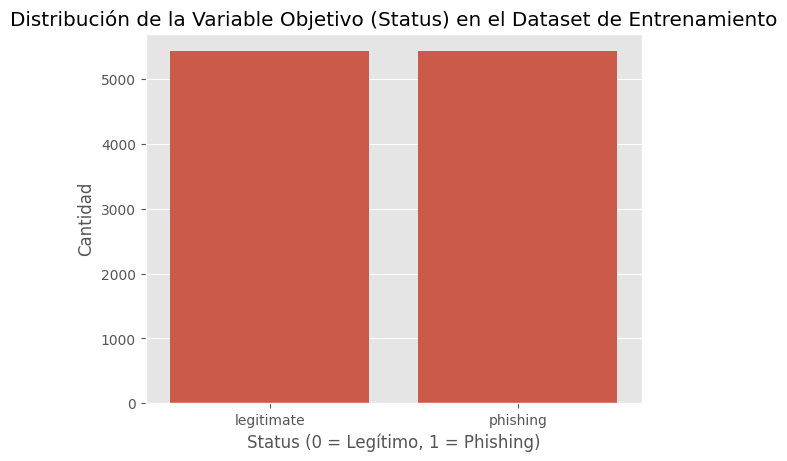

In [244]:
# Cargar los datasets de entrenamiento y prueba
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

# Visualizar las primeras filas del dataset de entrenamiento
print("Primeras filas del dataset de entrenamiento:")
display(df_train.head())

# Información general del dataset de entrenamiento
print("\nInformación general del dataset de entrenamiento:")
display(df_train.info())

# Resumen estadístico de las variables numéricas en el dataset de entrenamiento
print("\nResumen estadístico de las variables numéricas (entrenamiento):")
display(df_train.describe())

# Verificar valores nulos en el dataset de entrenamiento
print("\nValores nulos en el dataset de entrenamiento:")
display(df_train.isnull().sum())

# Distribución de la variable objetivo (`status`) en el dataset de entrenamiento
print("\nDistribución de la variable objetivo (status) en el dataset de entrenamiento:")
display(df_train['status'].value_counts())

# Visualizar gráficamente la distribución de la variable objetivo
sns.countplot(x='status', data=df_train)
plt.title(f'Distribución de la Variable Objetivo (Status) en el Dataset de Entrenamiento')
plt.xlabel('Status (0 = Legítimo, 1 = Phishing)')
plt.ylabel('Cantidad')
plt.show()


# Análisis Exploratorio Inicial del Dataset

## **1. Variables con posibles outliers**
Basándonos en los valores extremos (`max`) y la dispersión (`std`), destacan las siguientes variables:

- **`length_url` (Longitud de la URL):**
  - **Media:** ~61
  - **Máximo:** 1641 (muy por encima del percentil 75, que es 71).
  - **Posible acción:** Revisar URLs extremadamente largas y decidir si las mantenemos o las tratamos como outliers.

- **`length_hostname` (Longitud del hostname):**
  - **Media:** ~21
  - **Máximo:** 214 (muy por encima del percentil 75, que es 24).
  - **Posible acción:** Similar a `length_url`, revisar valores altos.

- **`domain_registration_length` y `domain_age`:**
  - **Valores negativos:** Esto es curioso, ya que no debería haber longitudes o edades negativas. Es probable que haya errores de datos o codificaciones especiales.
  - **Posible acción:** Limpiar o transformar estos valores.

- **`web_traffic`:**
  - **Máximo:** ~10.7 millones, mientras que el percentil 75 es ~369,000.
  - **Posible acción:** Tratar los valores extremos o aplicar una escala logarítmica.

---

## **2. Distribuciones que pueden influir en el modelo**
Algunas variables presentan distribuciones sesgadas o valores concentrados:

- **`ip`:**
  - **Media:** 0.15  
  - La mayoría de las URLs no tienen IPs en el hostname. Sería interesante ver cómo se relaciona con `status`.

- **`phish_hints`:**
  - Esta variable podría ser muy relevante si tiene una alta correlación con `status`.

- **`dns_record` y `google_index`:**
  - Variables binarias que parecen tener distribuciones sesgadas (la media está cerca de los extremos).

---

## **3. Variables que parecen más uniformes**
Algunas variables tienen distribuciones más concentradas y podrían aportar menos al modelo:

- **`nb_dots`, `nb_hyphens`, `nb_at`, etc.:**
  - Muchas tienen valores bajos en el percentil 75 y máximos altos.  
  - **Posible acción:** Combinar estas en una métrica agregada, como "ratio de caracteres especiales por longitud".


## Conclusiones de la Exploración Inicial

1. **Valores nulos**: El dataset no contiene valores nulos en ninguna de las columnas, lo que simplifica la limpieza de datos y permite avanzar directamente al análisis y preprocesamiento.

2. **Balance de clases**: La variable objetivo (`status`) está perfectamente balanceada, con un 50% de URLs etiquetadas como `legitimate` (0) y el otro 50% como `phishing` (1). Esto es ideal para entrenar modelos de machine learning sin necesidad de aplicar técnicas de balanceo.

3. **Estructura del dataset**:

   - **Cantidad de columnas**: El dataset tiene 89 columnas, incluyendo 87 características, la columna `url` y la variable objetivo `status`.
   - **Tipos de datos**: Mayoritariamente columnas numéricas (`int64` y `float64`), con una columna categórica (`object`).

4. **Distribución de valores**:
   - Las características presentan gran variabilidad en sus valores (por ejemplo, `length_url` varía de 12 a 1641 caracteres).
   - Esto indica la necesidad de explorar y posiblemente escalar las variables antes de entrenar el modelo.

5. **Columna `url`**: Aunque no se utilizará directamente en el modelo, la columna `url` se mantiene por ahora en el dataset, ya que puede ser útil para extraer nuevas características durante el proceso de *feature engineering*.


## **4. Codificación de la Variable Objetivo**

En este apartado, realizaremos la codificación de la variable objetivo `status`, que actualmente contiene etiquetas categóricas (`legitimate` y `phishing`). Estas serán transformadas a valores numéricos:

- **`legitimate` → 0**
- **`phishing` → 1**

Además:
1. Se verificará la correcta codificación revisando la distribución de los valores.
2. Se eliminará la columna `url` del dataset, ya que no es directamente útil para el modelo, aunque se mantendrá disponible en el proyecto para futuras tareas de *feature engineering*.


In [245]:
# **Preparación del Dataset**

# Codificar la variable objetivo
df_train['status'] = df_train['status'].map({'legitimate': 0, 'phishing': 1})

# Verificar el cambio
print("\nDistribución de la variable objetivo codificada (status):")
display(df_train['status'].value_counts())

# Eliminar la columna 'url' ya que no es relevante directamente
# df_train.drop(columns=['url'], inplace=True)

# Mostrar la nueva estructura del dataset
print("\nEstructura del dataset después de preparar:")
display(df_train.head())


Distribución de la variable objetivo codificada (status):


status
0    5429
1    5429
Name: count, dtype: int64


Estructura del dataset después de preparar:


url  length_url  \
0  https://help.ubuntu.com/community/Mobile%20Bro...          80   
1                     http://www.voipoid.com/telekom          30   
2  http://usbank-link-mupyndtfft---com.illmickels...          58   
3     http://www.flaticon.com/free-icons/parking_403          46   
4                             https://www.hivos.org/          22   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               15   0        2           0      0      0       0      0  ...   
1               15   0        2           0      0      0       0      0  ...   
2               50   0        2           5      0      0       0      0  ...   
3               16   0        2           1      0      0       0      0  ...   
4               13   0        2           0      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                1                      0                        0   
1                1                      1                        0   
2                1                      0                        0   
3                1                      1                        0   
4                0                      0                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                         676        5897         2688           0   
1                         206         889            0           0   
2                         372        1454            0           0   
3                         288        2633          827           0   
4                         110          -1       442024           0   

   google_index  page_rank  status  
0             1          7       0  
1             1          1       1  
2             1          0       1  
3             1          7       0  
4             0          5       0  

[5 rows x 89 columns]

## **3.2. Distribución de las Variables**

Analizar todas las variables numéricas en bloques para identificar patrones, *outliers* y posibles diferencias entre URLs legítimas (`status = 0`) y de phishing (`status = 1`).



**Distribución de variables - Bloque 1**


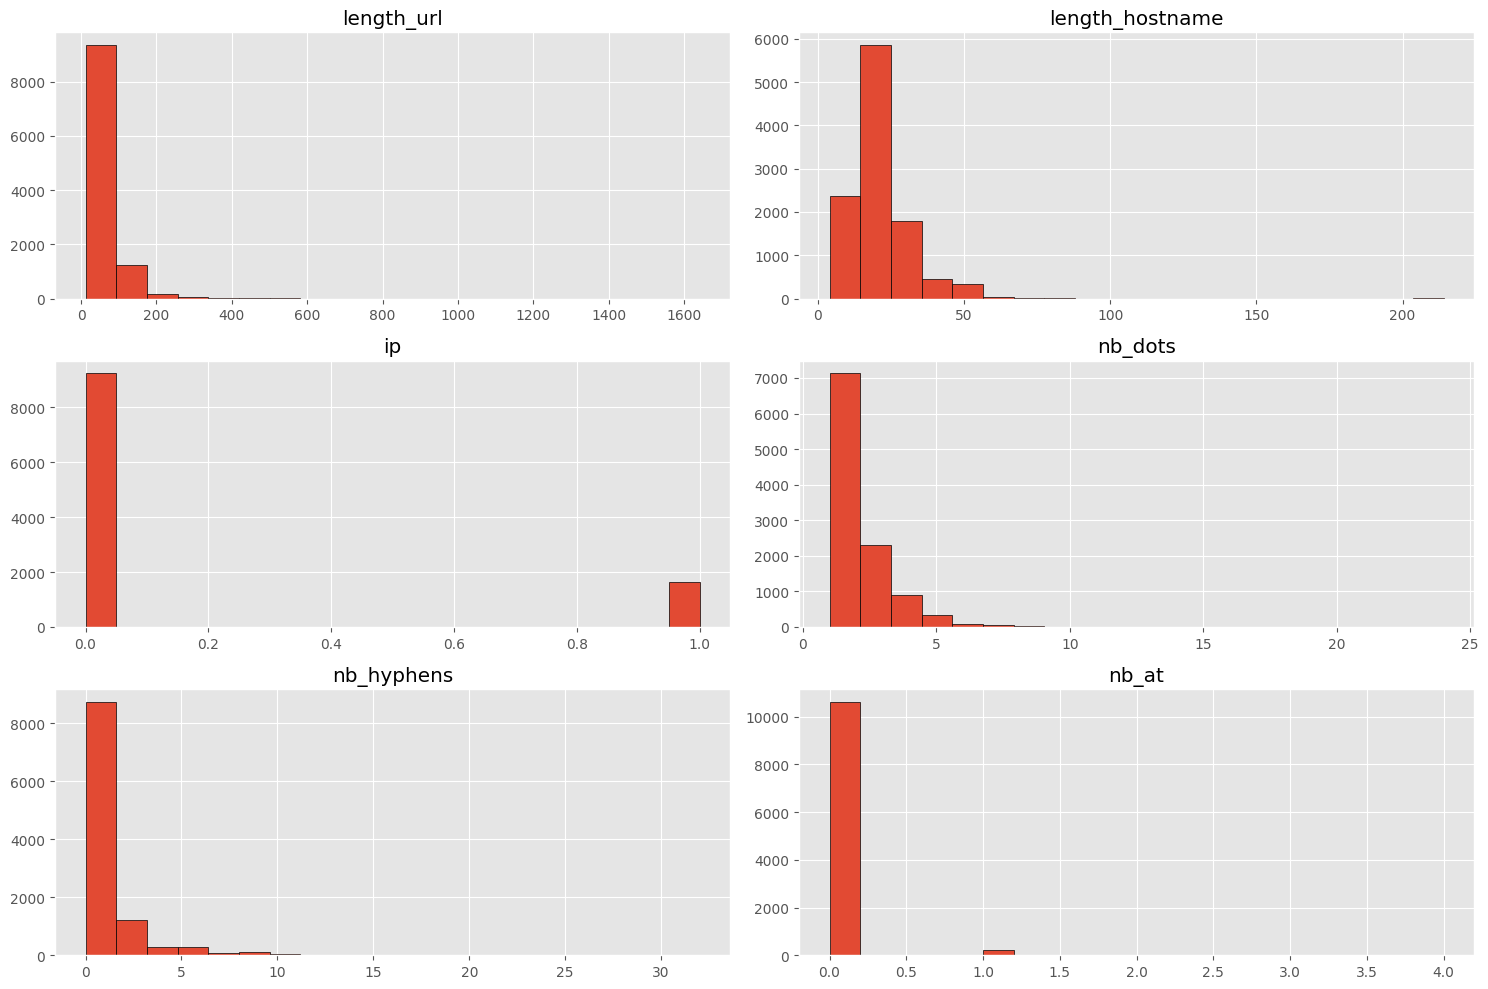


**Distribución de variables - Bloque 2**


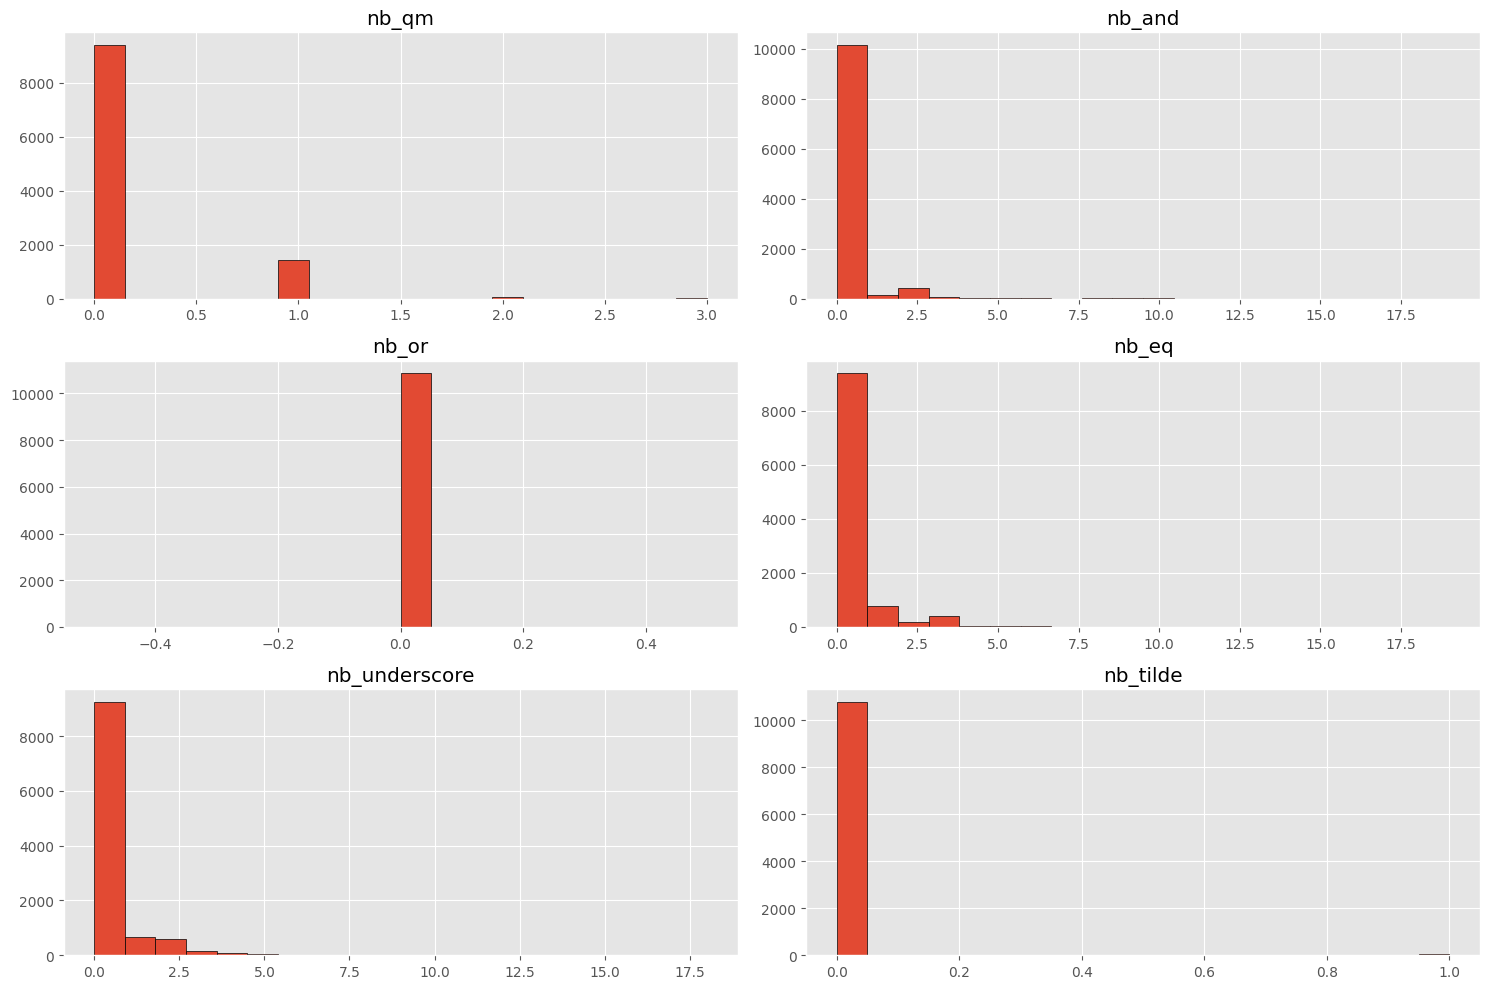


**Distribución de variables - Bloque 3**


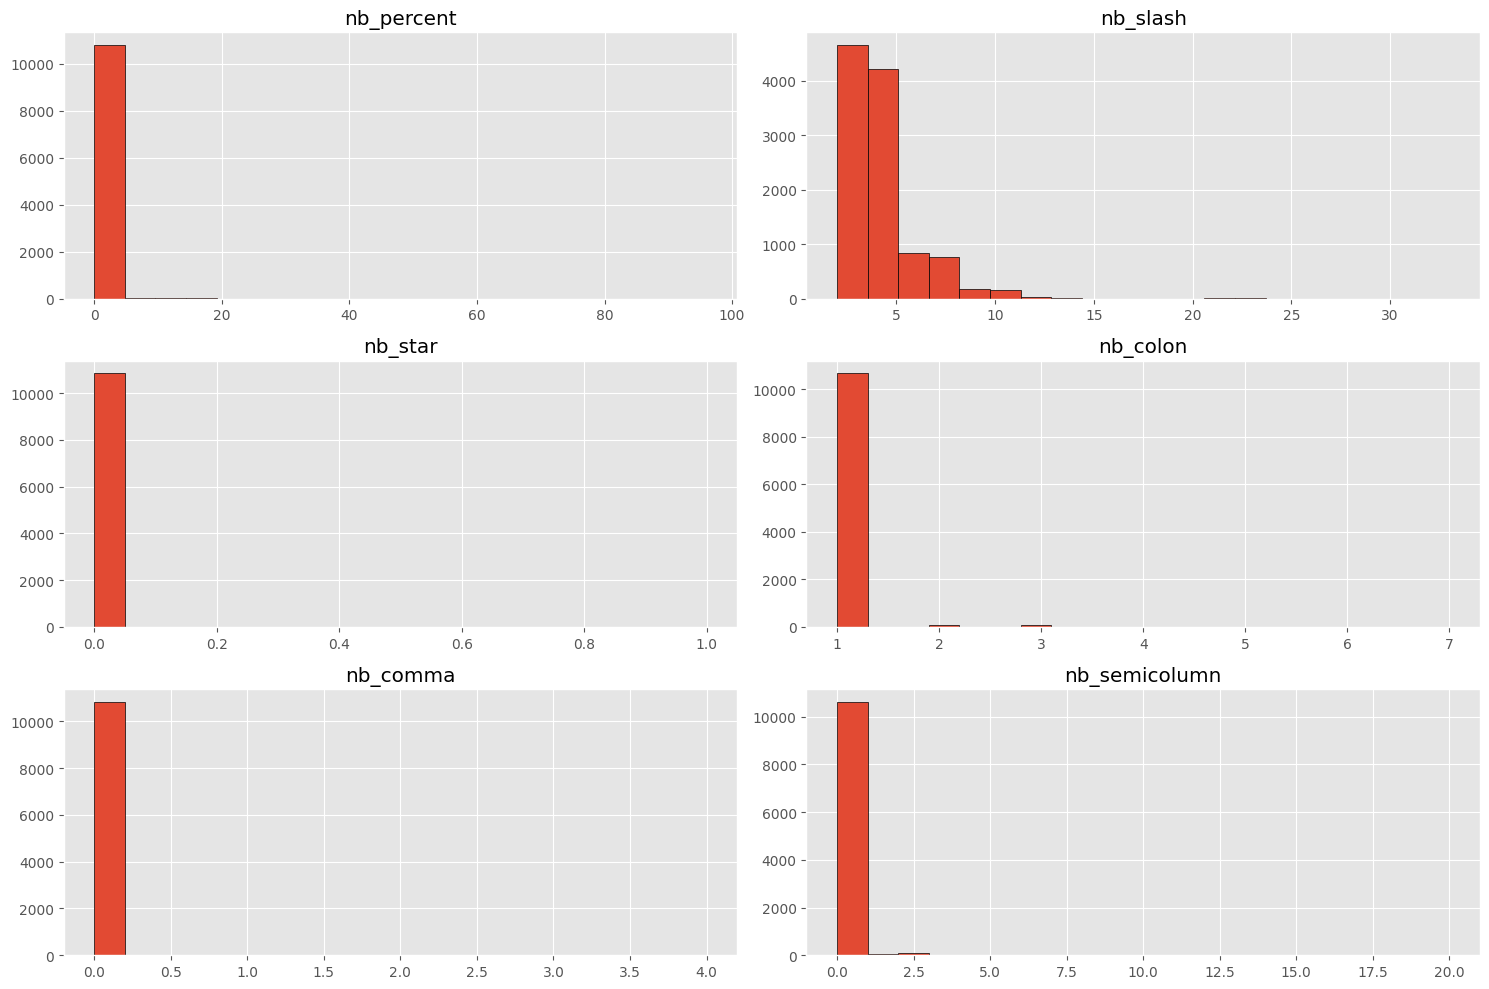


**Distribución de variables - Bloque 4**


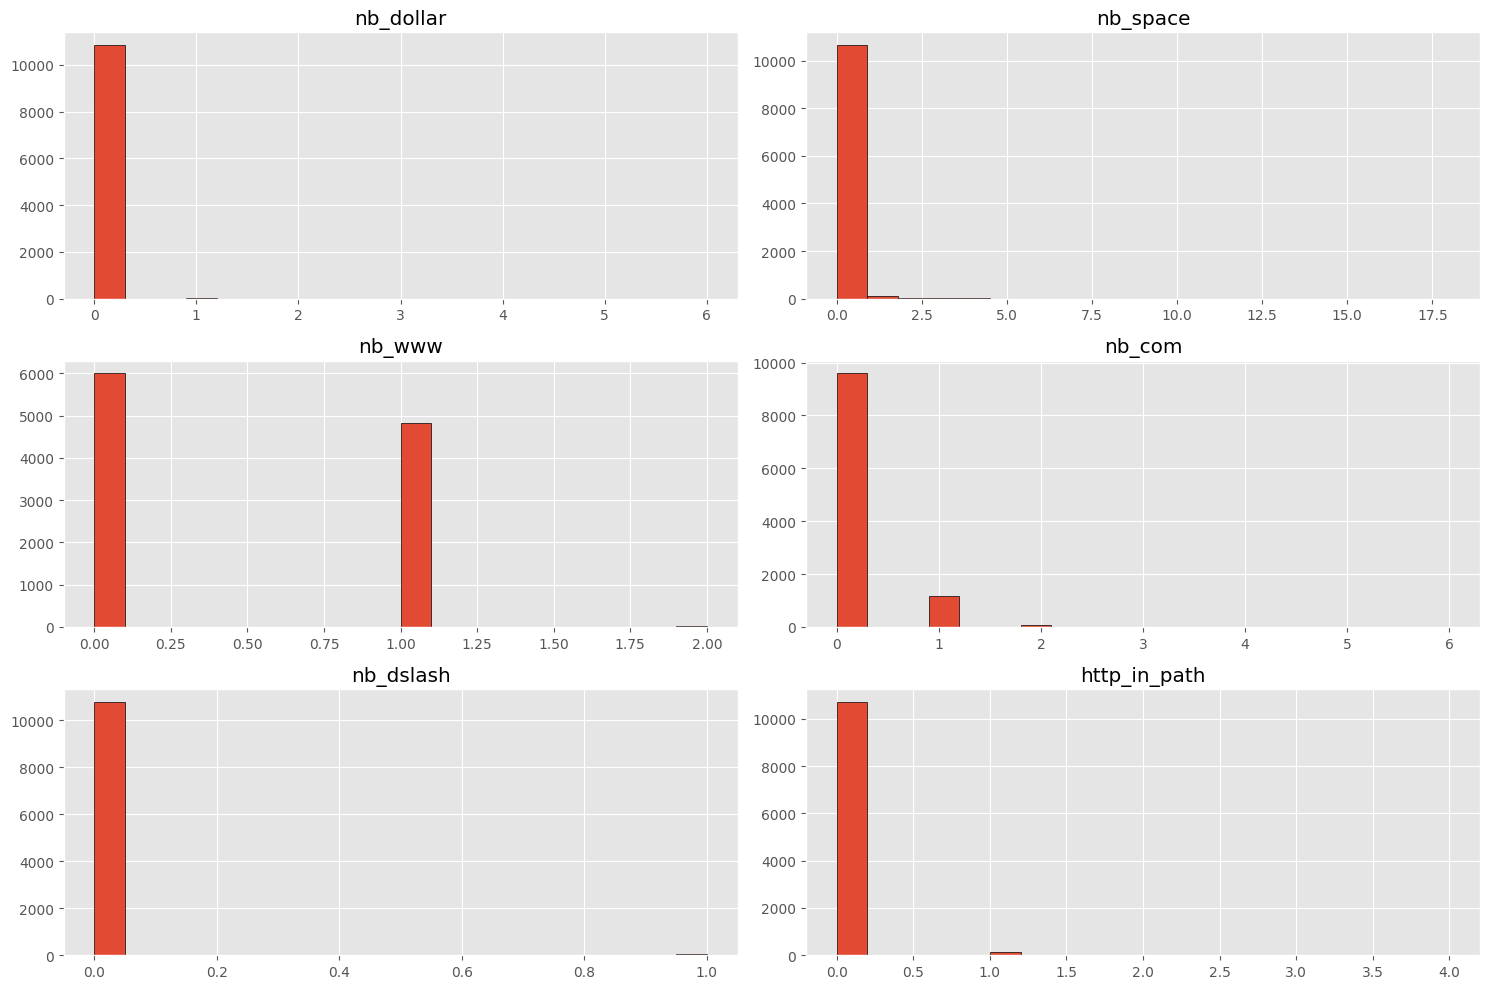


**Distribución de variables - Bloque 5**


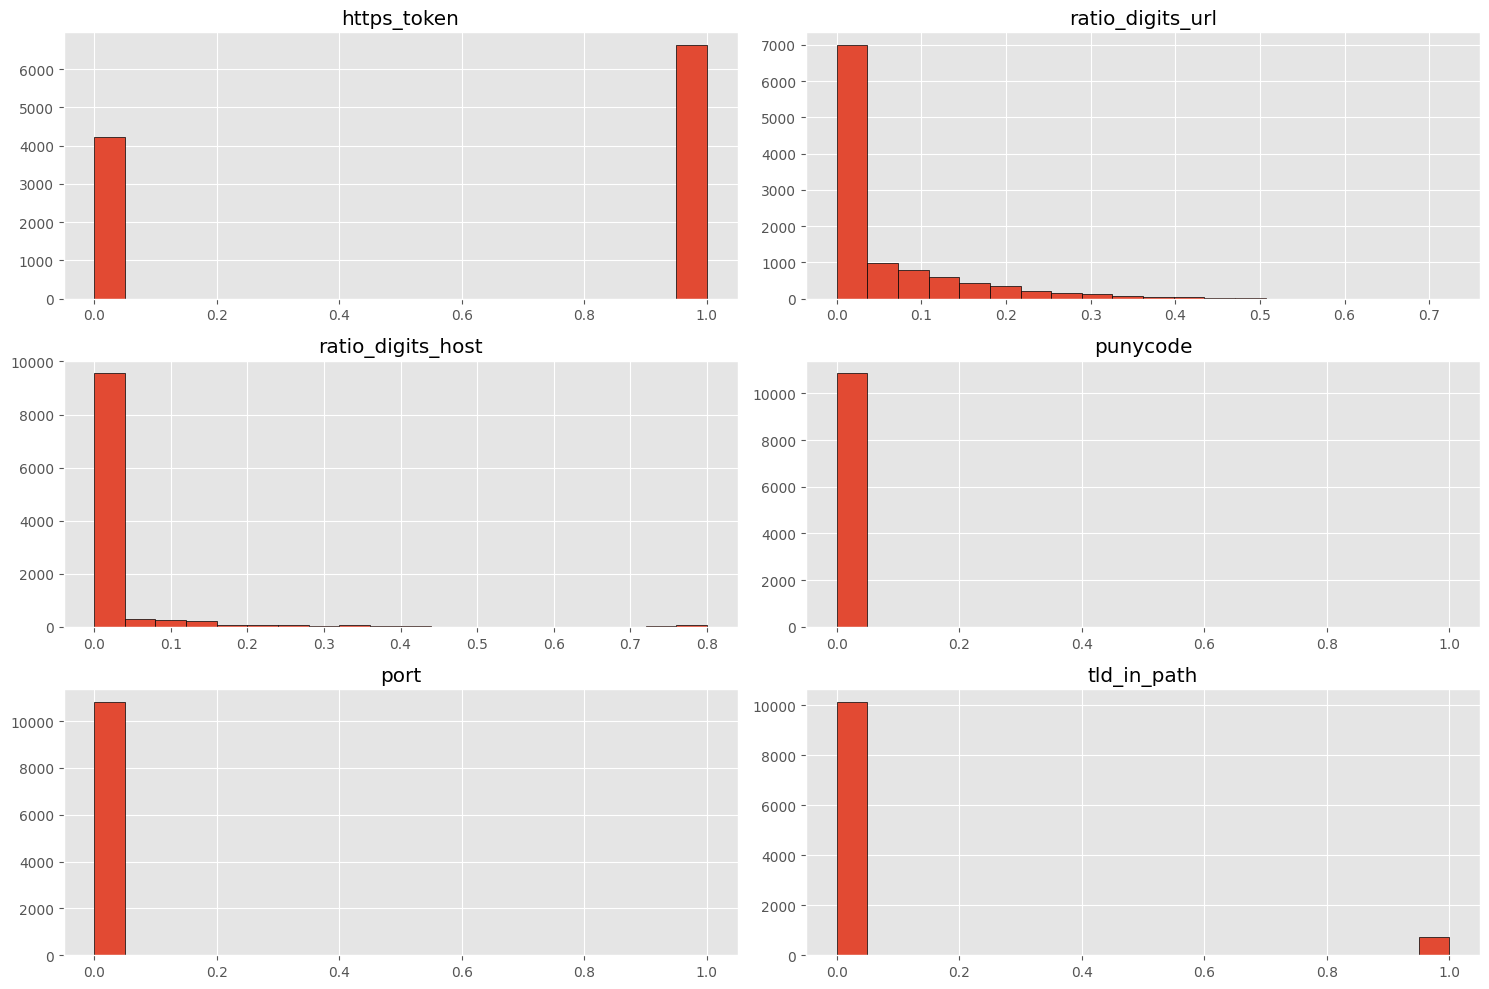


**Distribución de variables - Bloque 6**


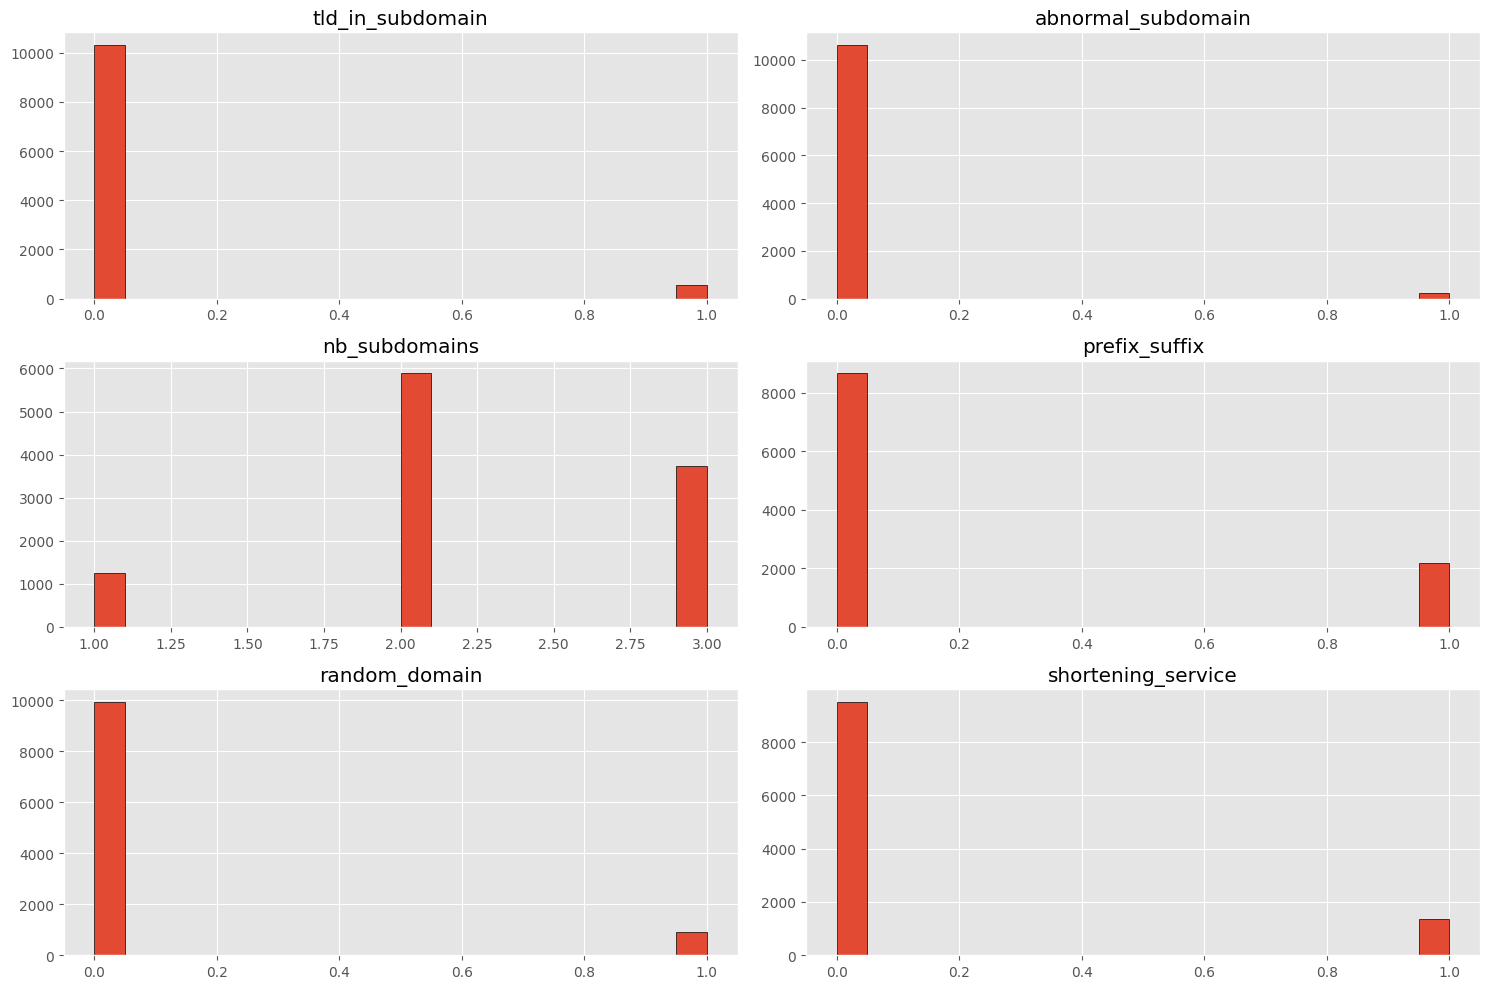


**Distribución de variables - Bloque 7**


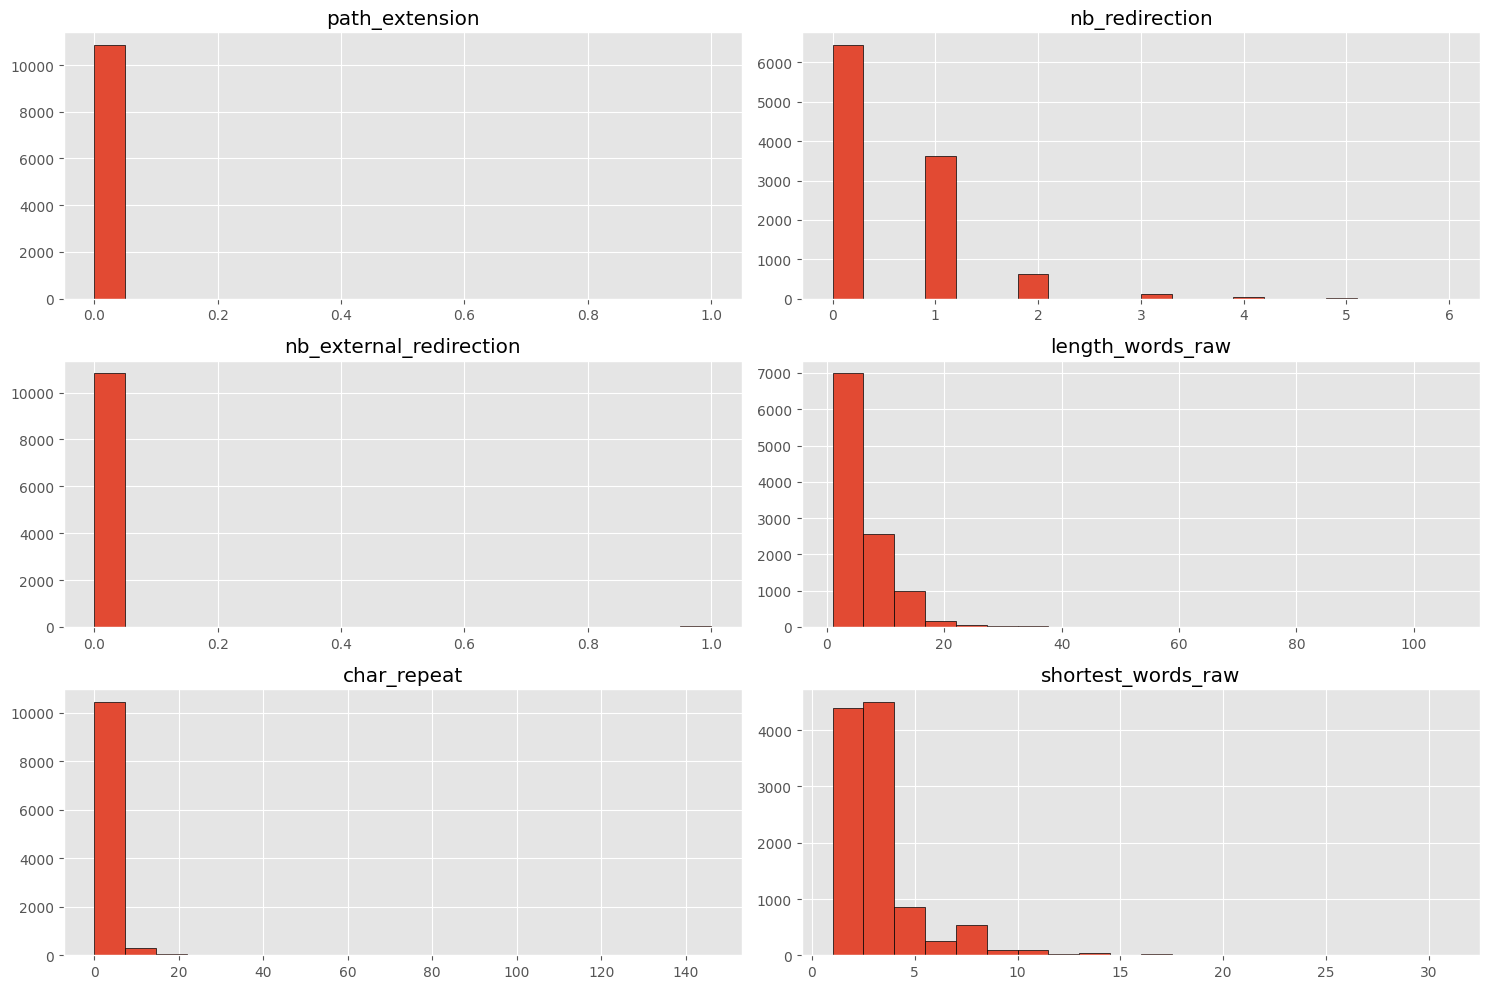


**Distribución de variables - Bloque 8**


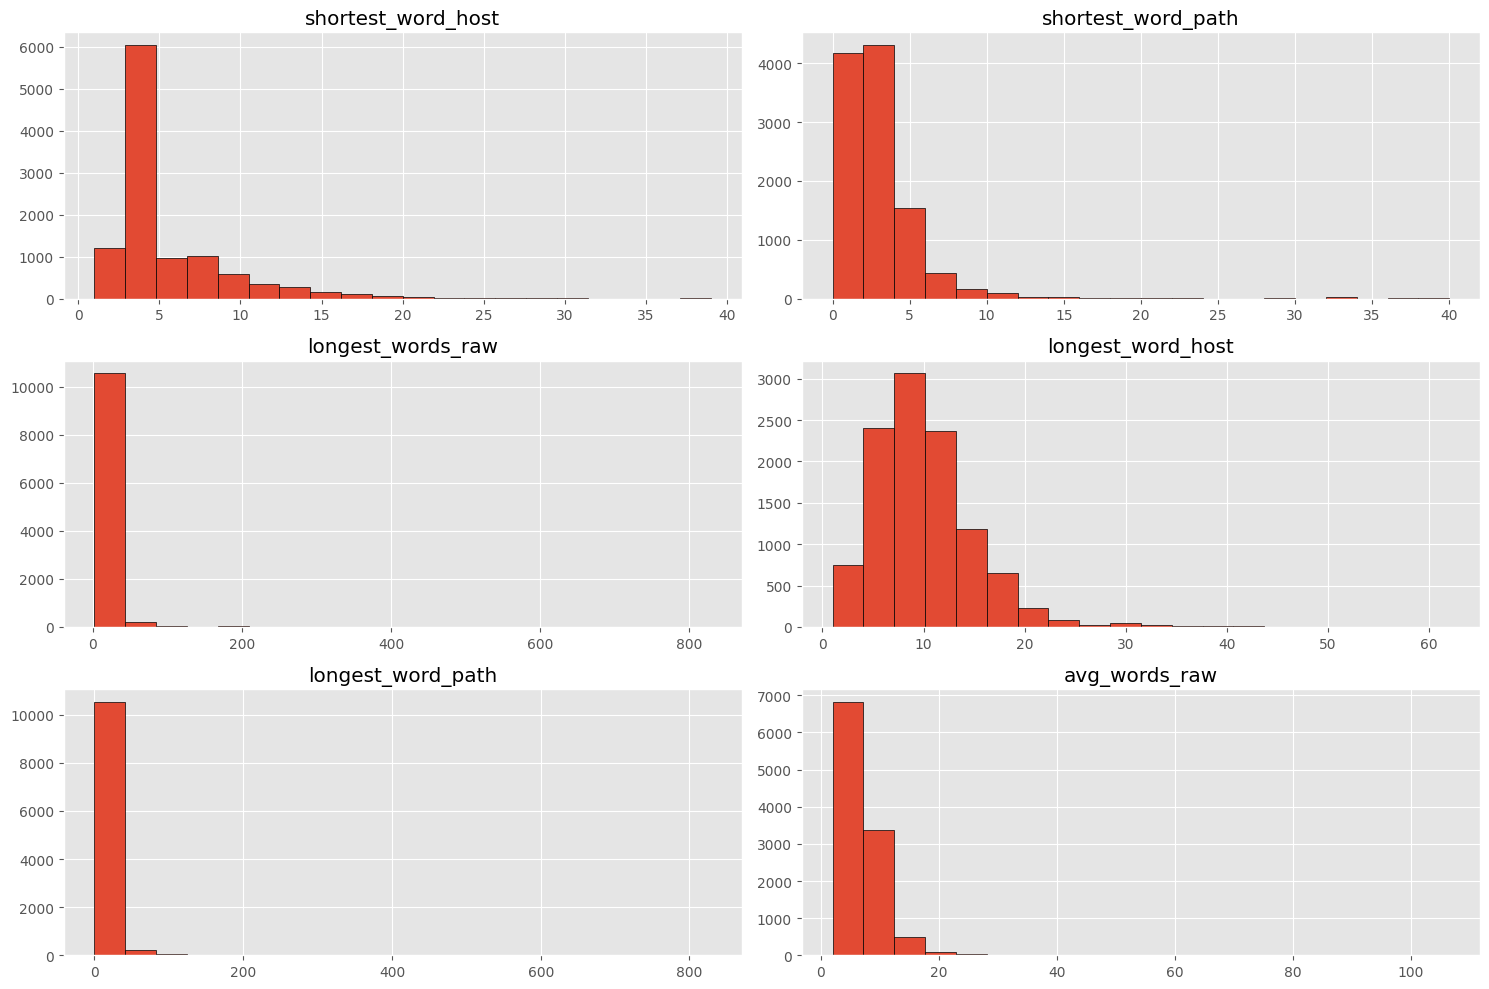


**Distribución de variables - Bloque 9**


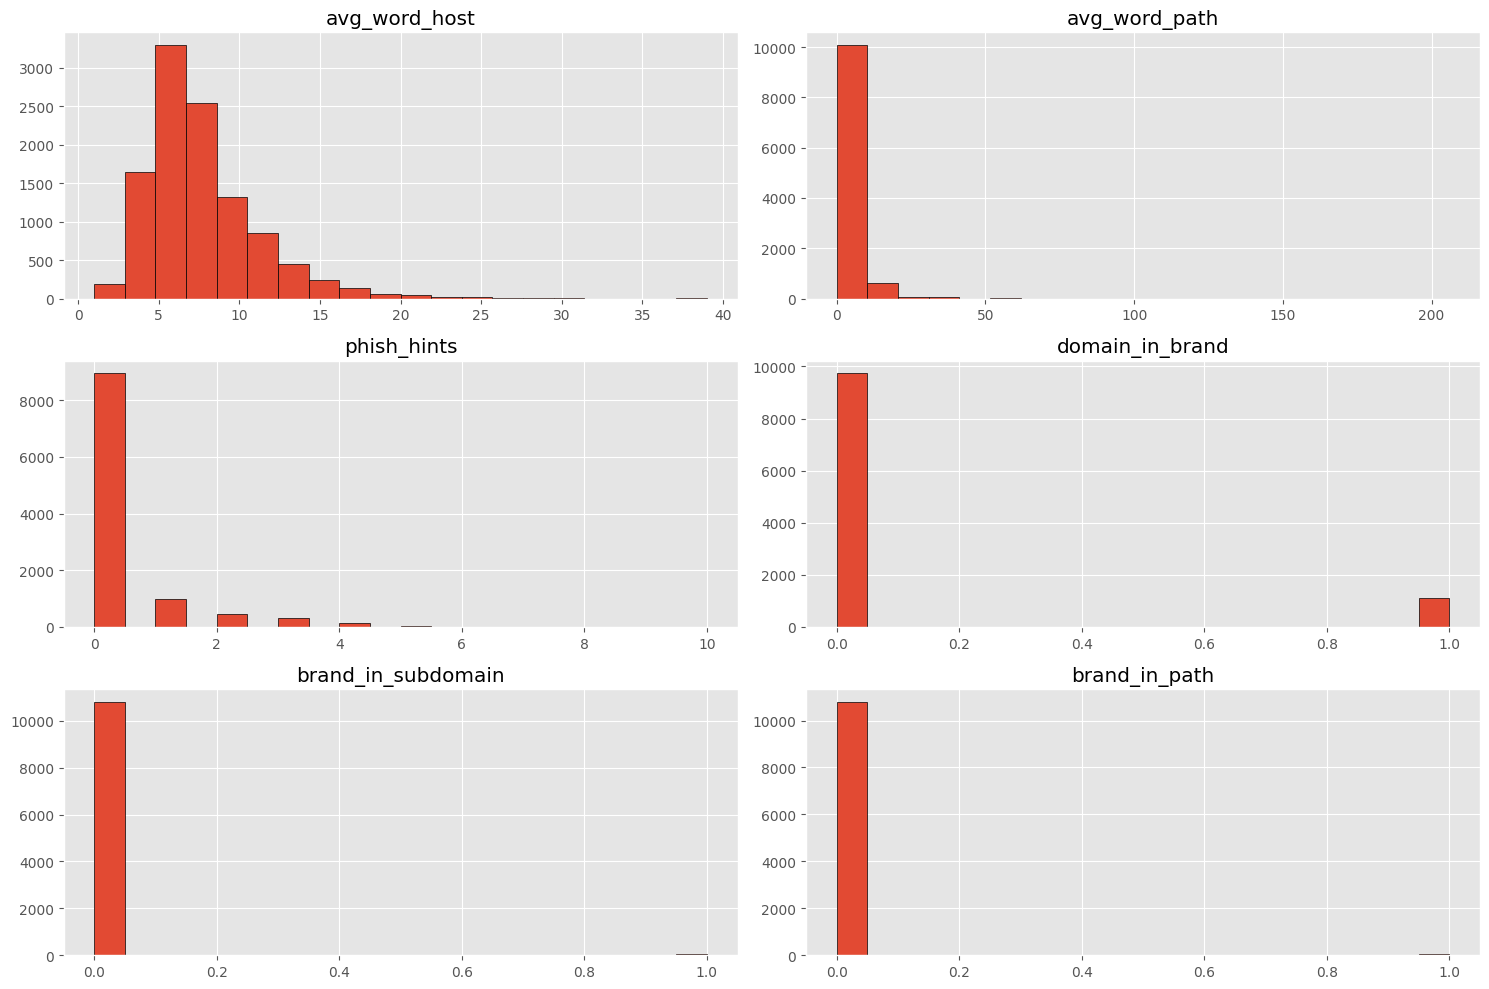


**Distribución de variables - Bloque 10**


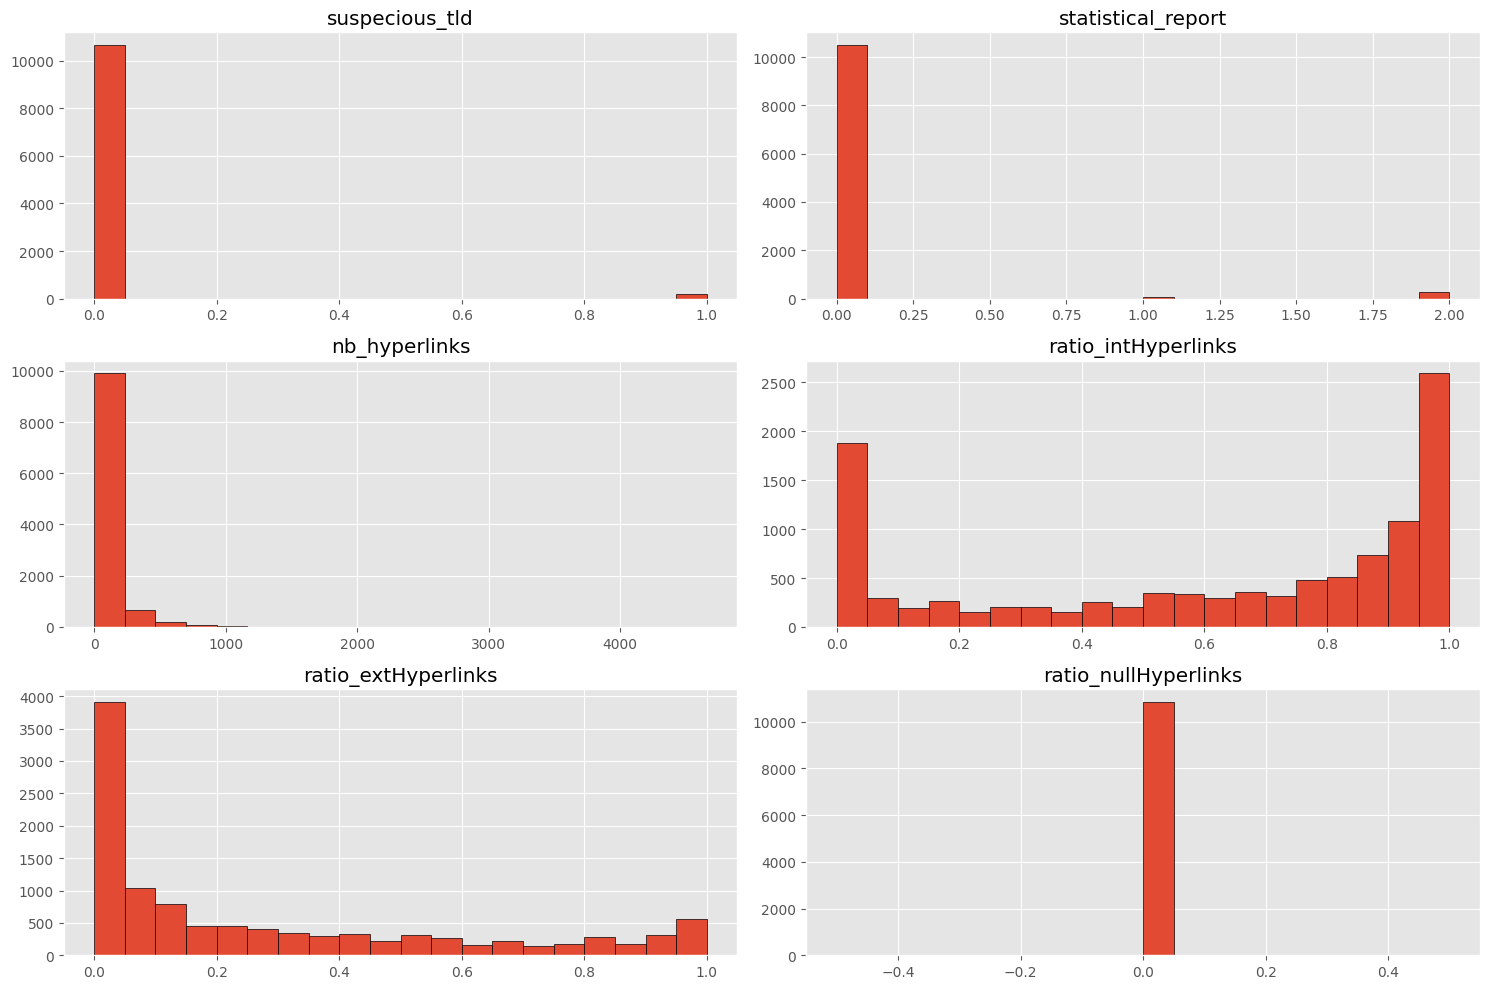


**Distribución de variables - Bloque 11**


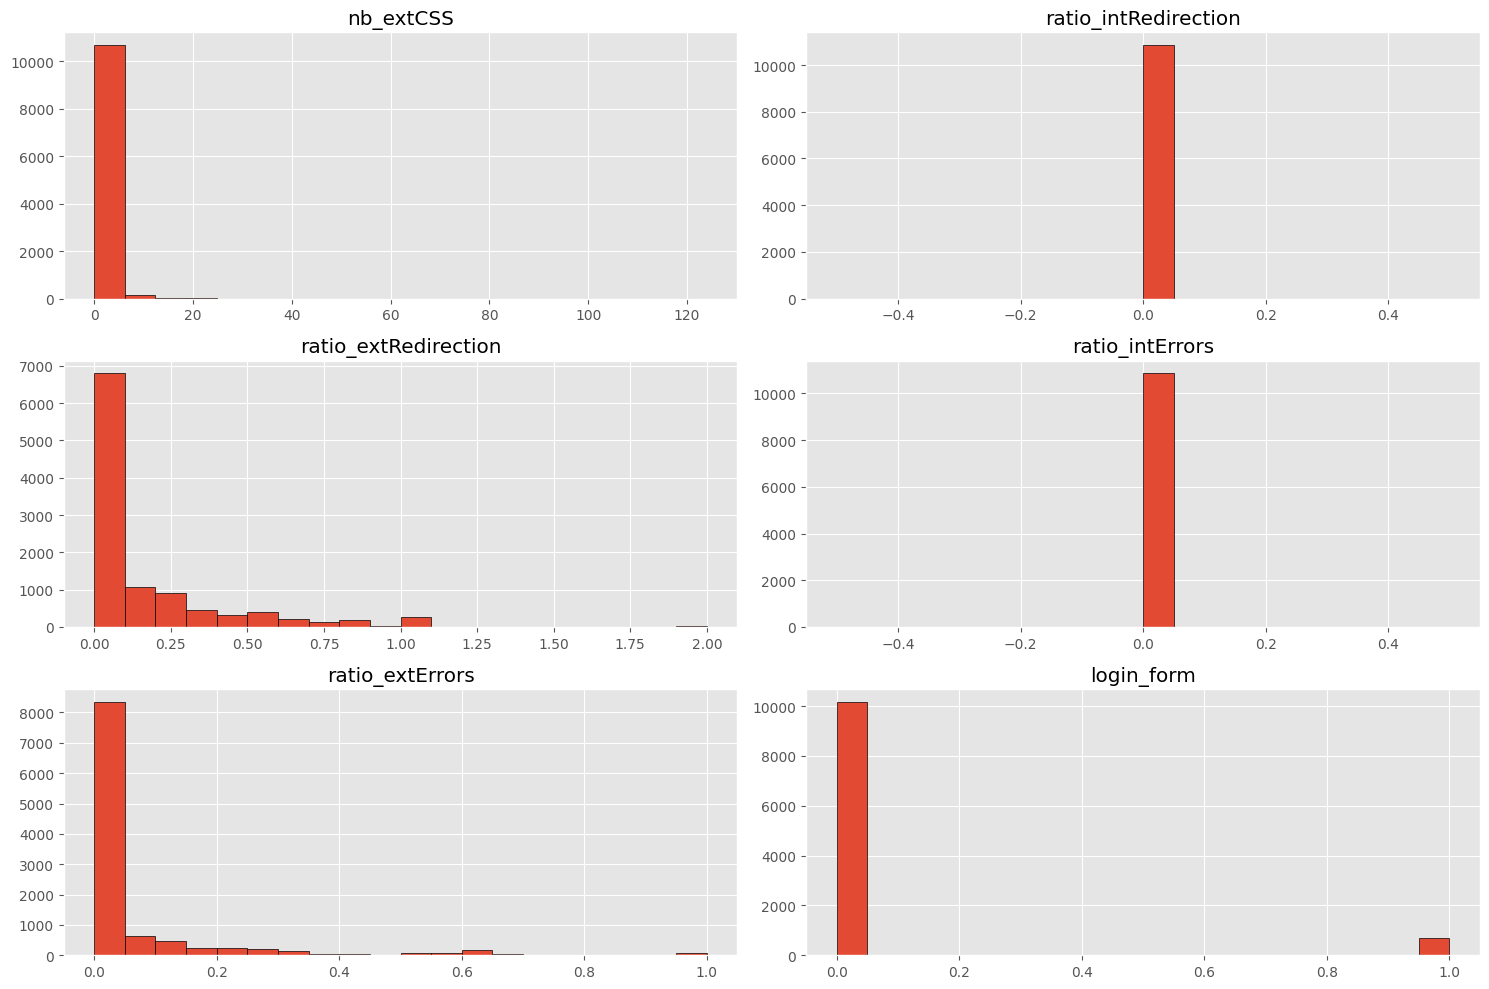


**Distribución de variables - Bloque 12**


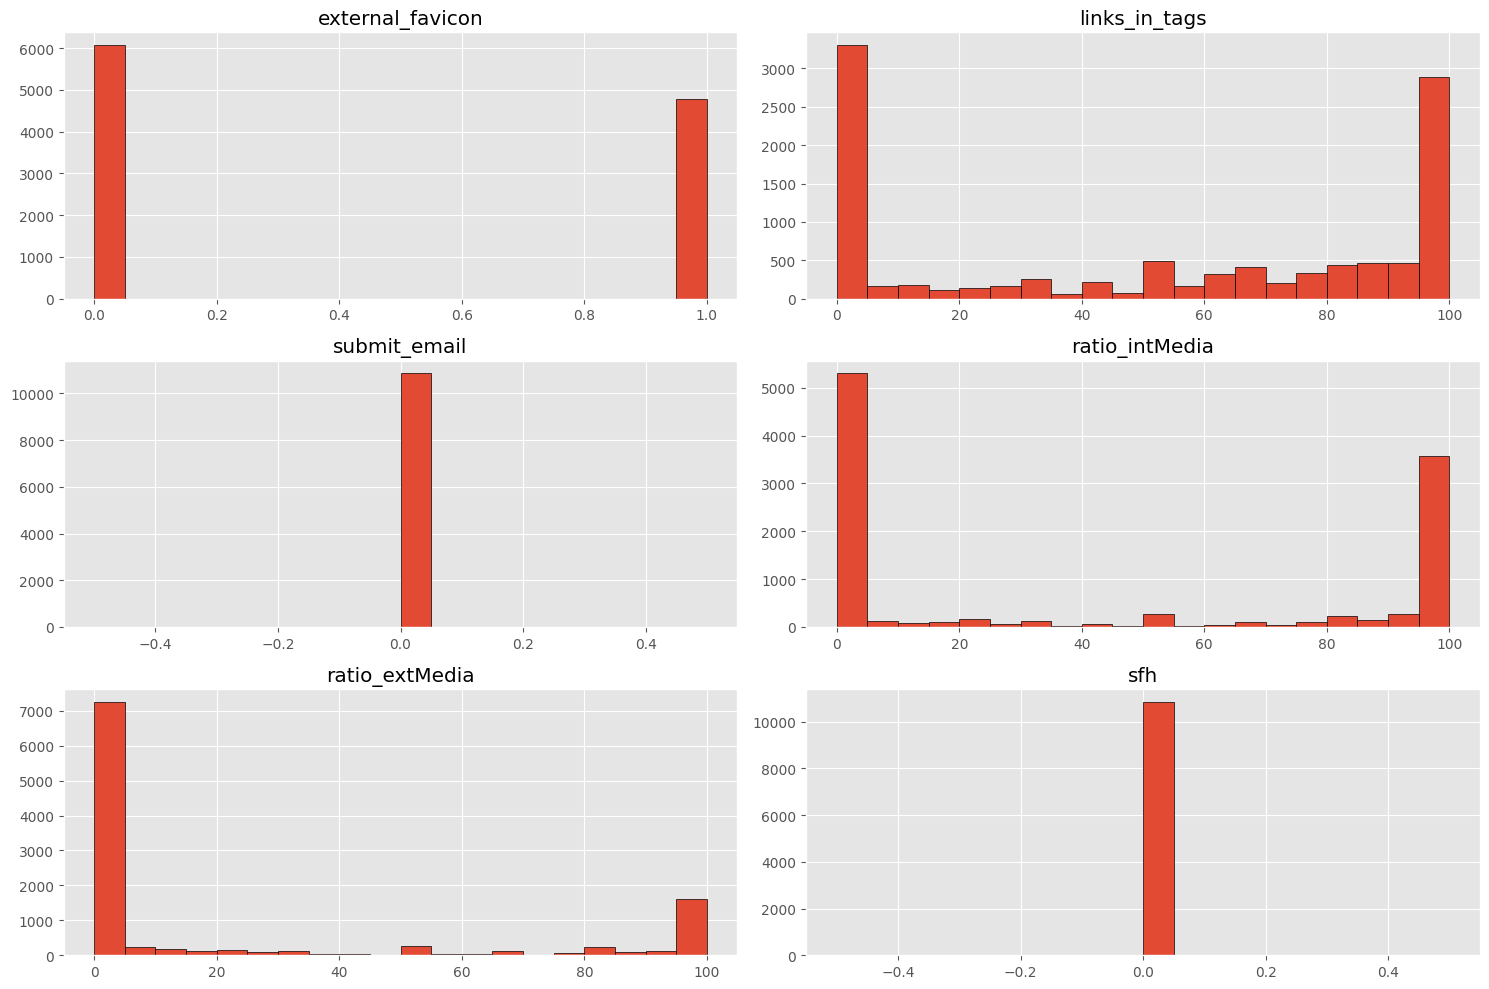


**Distribución de variables - Bloque 13**


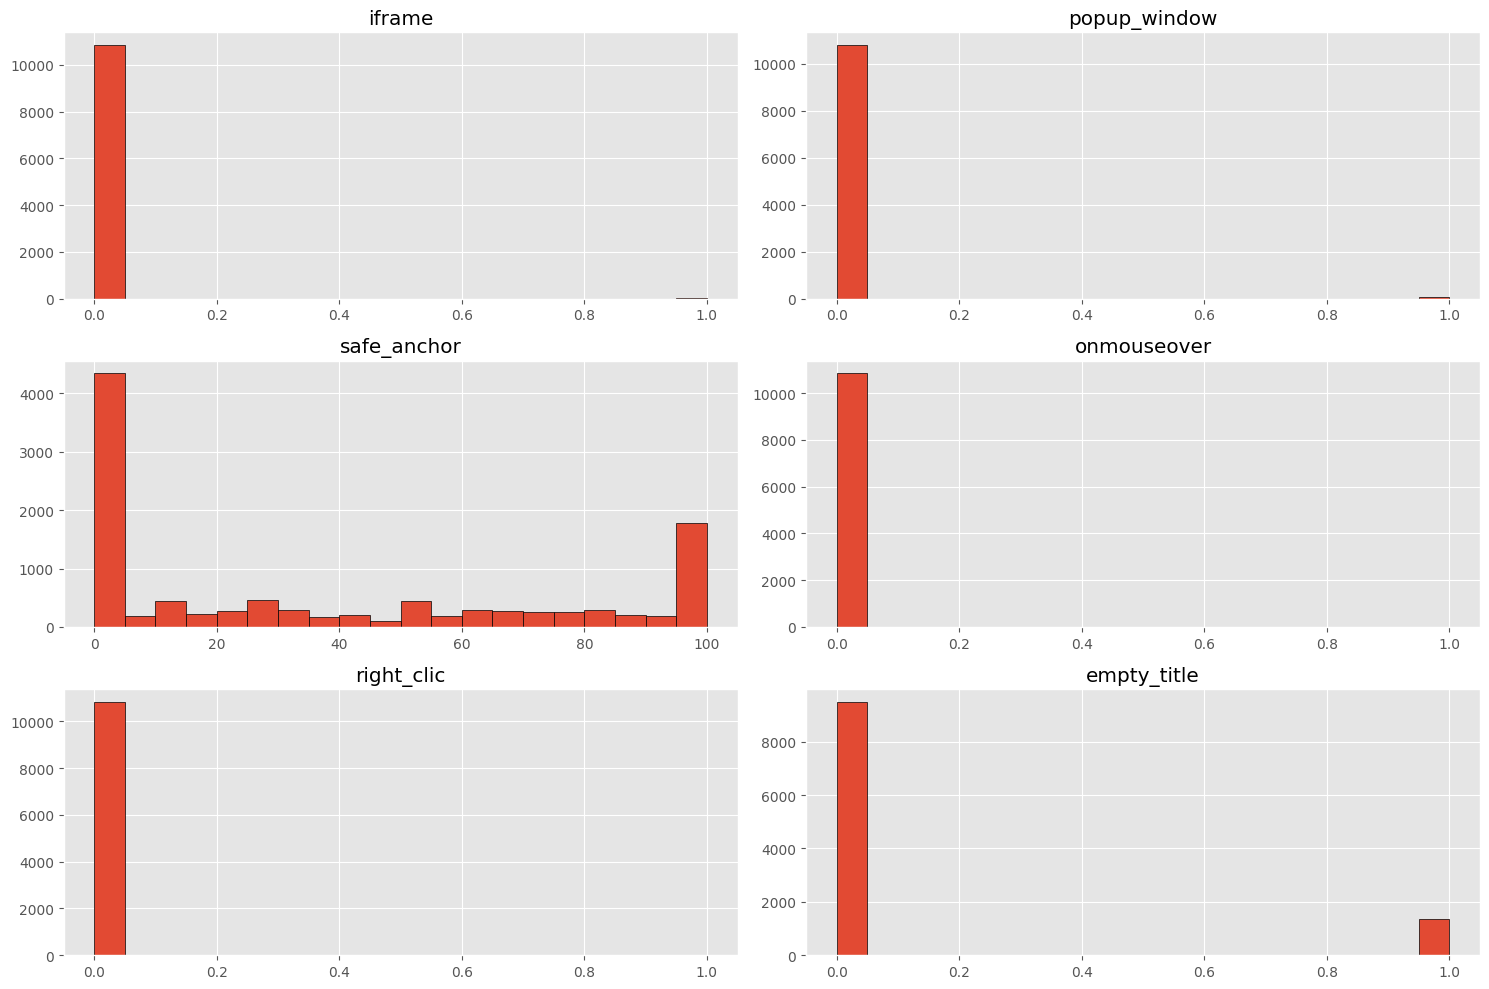


**Distribución de variables - Bloque 14**


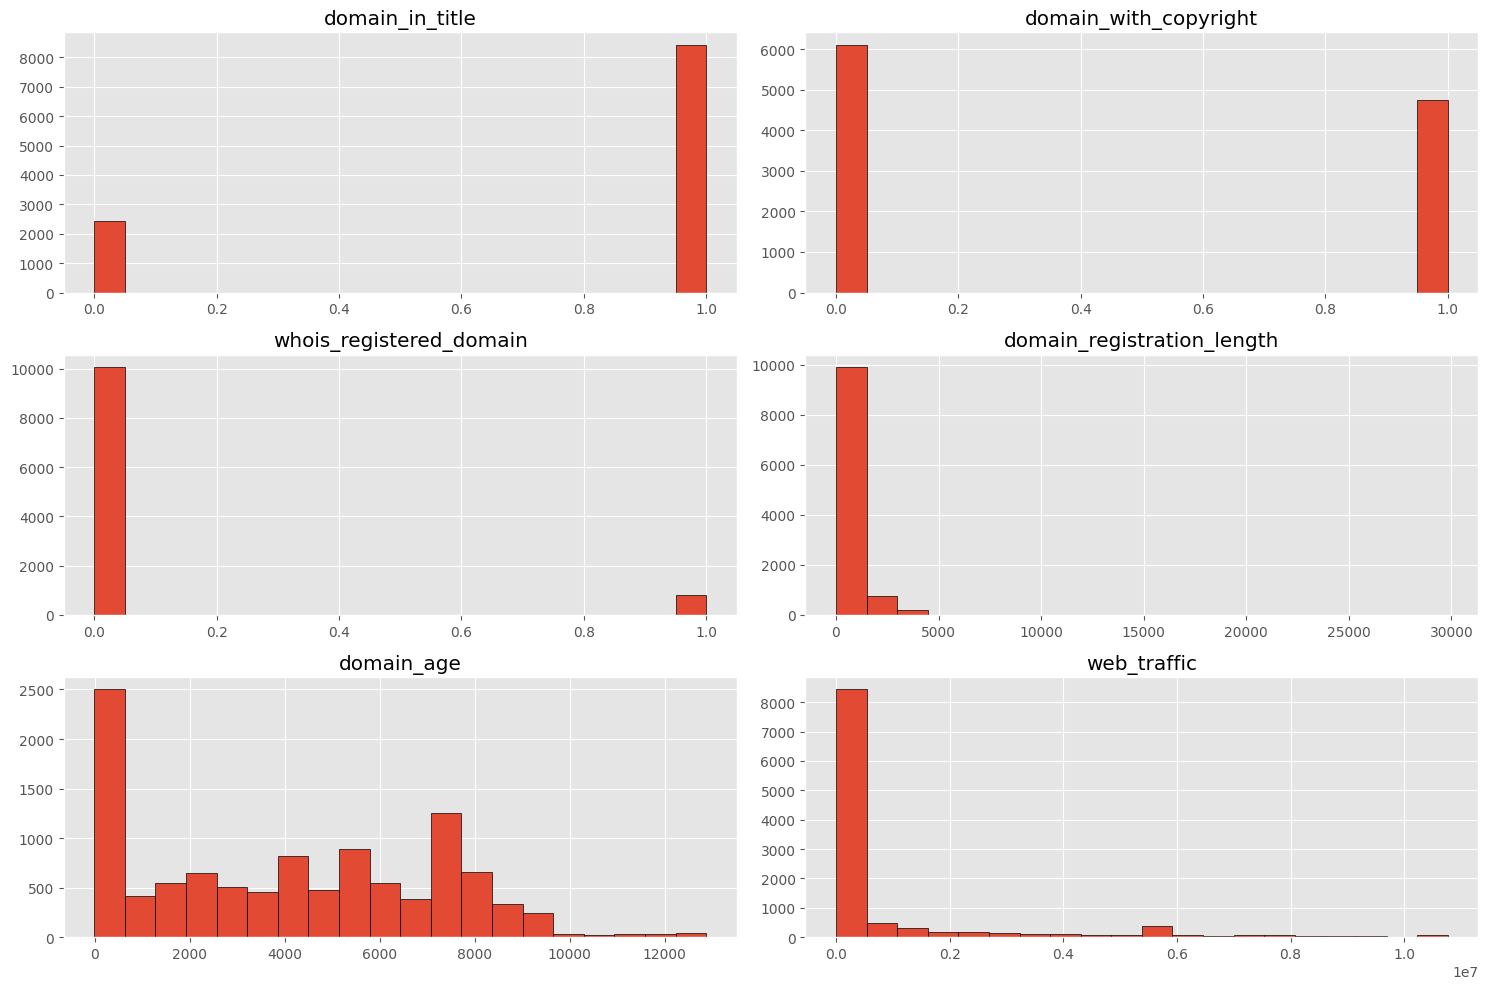


**Distribución de variables - Bloque 15**


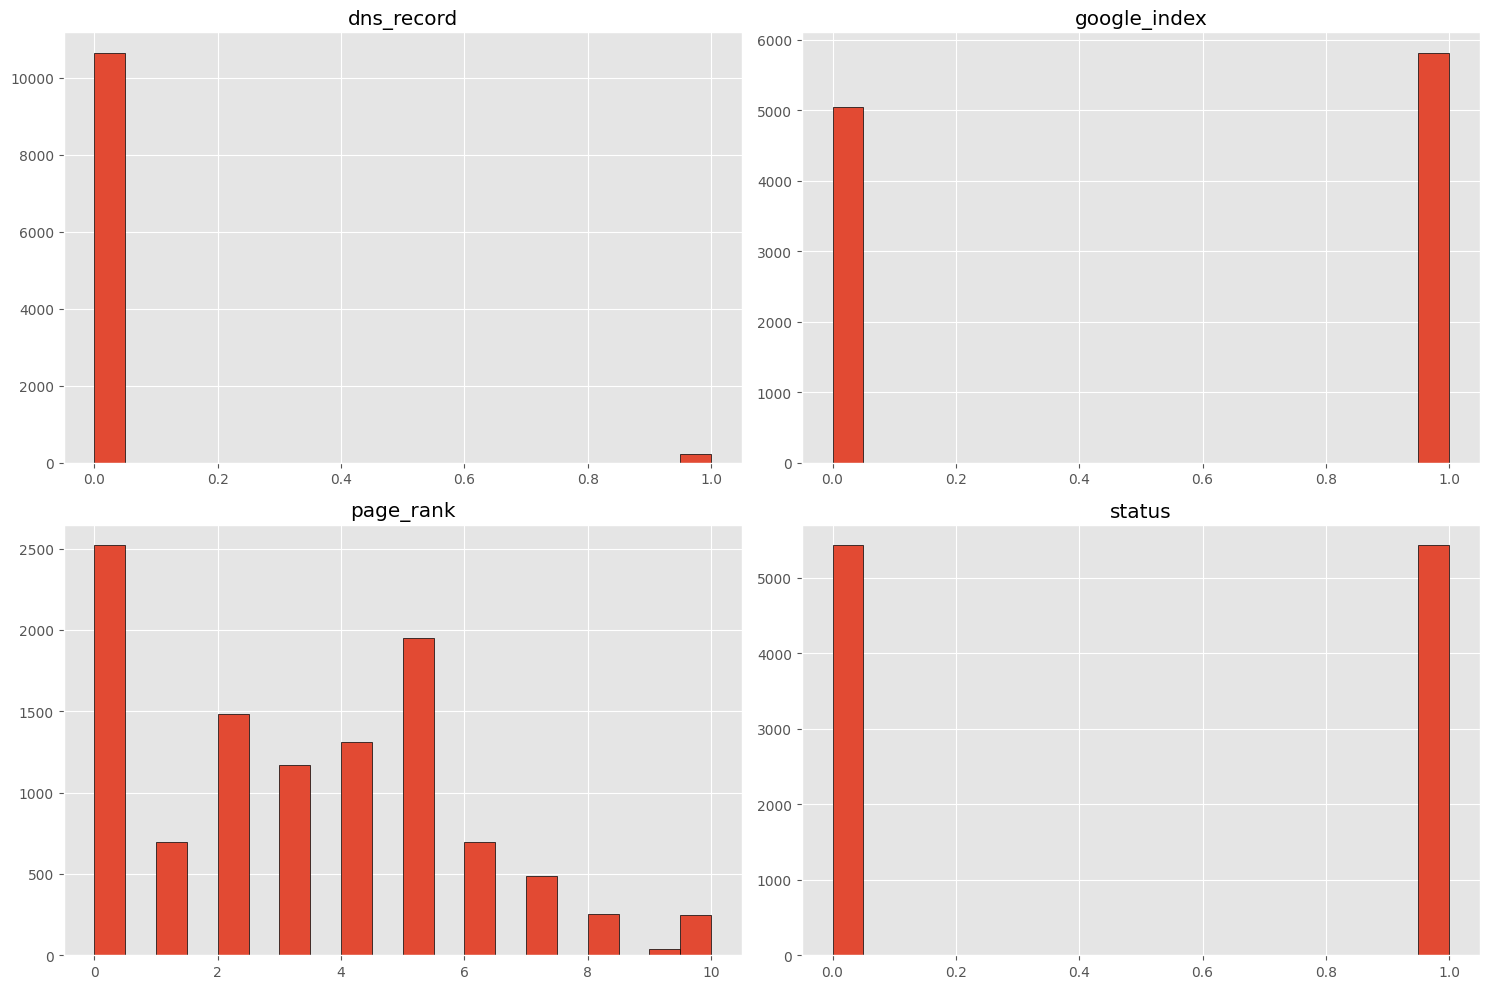

In [246]:
# **3.2. Distribución de las Variables (Por Bloques)**

# Dividir todas las columnas numéricas en bloques de tamaño manejable (6 columnas por bloque)
columnas_numericas = df_train.select_dtypes(include=['float64', 'int64']).columns
num_columnas_por_bloque = 6
bloques = [columnas_numericas[i:i + num_columnas_por_bloque] for i in range(0, len(columnas_numericas), num_columnas_por_bloque)]

# Visualizar las distribuciones por bloques
for idx, bloque in enumerate(bloques):
    print(f"\n**Distribución de variables - Bloque {idx + 1}**")
    df_train[bloque].hist(figsize=(15, 10), bins=20, edgecolor="black")
    plt.tight_layout()
    plt.show()


### Conclusiones sobre la distribución de las variables

1. **Presencia de valores atípicos:** Muchas variables muestran distribuciones sesgadas hacia valores bajos, con colas largas y valores extremos que podrían impactar el modelo si no se tratan, aunque como comentamos al principio, estos outliers son importantes ya que indican las diferencias entre url legítima o no. Por tanto los mantendremos y usaremos modulos robustos a outliers.

2. **Variables binarias:** Varias variables, como `ip`, `https_token` y `punycode`, son binarias y representan características de presencia o ausencia, siendo útiles como indicadores para el modelo.

3. **Variables discretas:** Algunas variables, como `nb_dots`, `nb_hyphens` y `nb_subdomains`, tienen rangos limitados, lo que indica que podrían ser analizadas como categorías discretas o intervalos.

4. **Rangos variados:** Existen variables con rangos amplios (`length_url` llega hasta 1641) frente a otras con rangos pequeños (0-1), lo que sugiere la necesidad de normalización o escalado para evitar desbalances en el modelo.

5. **Redundancia potencial:** Variables relacionadas estructuralmente (como `nb_dots`, `nb_hyphens` y `nb_slash`) podrían estar correlacionadas, requiriendo un análisis adicional para evitar redundancias.

6. **Variabilidad limitada:** Algunas variables, como `punycode` y `ratio_nullHyperlinks`, tienen valores dominantes que podrían reducir su valor predictivo salvo en casos muy específicos.

7. **Distribuciones uniformes:** Variables como `ratio_intHyperlinks` presentan distribuciones más balanceadas, que podrían ser útiles para distinguir patrones relevantes.

8. **Importancia de la ingeniería de características:** La variable `url` podría ser una fuente rica de información si se procesan adecuadamente sus componentes, como dominios, subdominios o extensiones.

9. **Análisis bivariado necesario:** Para entender mejor la relación entre estas variables y la variable objetivo (`status`), será crucial realizar análisis bivariados y de correlación.

10. **Implicaciones para preprocesamiento:** Será necesario tratar los valores atípicos, escalar las variables y eliminar características con baja variabilidad para optimizar el rendimiento del modelo.



## **3.3. Distribución de la variable objetivo `num`**

Las variables seleccionadas en esta etapa inicial (`length_url`, `nb_dots`, `nb_hyphens`, y `ratio_digits_url`) se eligieron con base en los siguientes criterios:

1. **Intuición del dominio**:
   - Estas variables están relacionadas con características de las URLs que podrían distinguir entre URLs legítimas y de phishing.
   - Por ejemplo:
     - **`length_url`**: Las URLs de phishing tienden a ser más largas para confundir al usuario.
     - **`nb_dots`**: Un número elevado de puntos en la URL puede ser una señal de una estructura anómala.
     - **`nb_hyphens`**: Los atacantes suelen usar guiones para manipular el dominio.
     - **`ratio_digits_url`**: Una proporción alta de dígitos puede indicar URLs generadas automáticamente o sospechosas.


## **4.1. Analisis de valores atípicos**

En este caso, los valores atípicos dan información muy util para predecir, por lo que los observaremos pero no vamos a realizar ningún tratamiento especial.




In [247]:
# Detectar y mostrar columnas con outliers
outliers_summary = detect_outliers_all_columns(df_train)

# Mostrar columnas con outliers
outliers_summary = outliers_summary.sort_values(by='Outlier_Count', ascending=False)
display(outliers_summary)


Variable  Outlier_Count
78             domain_in_title           2430
33               prefix_suffix           2198
64             ratio_extErrors           2035
83                 web_traffic           2028
50                 phish_hints           1906
70              ratio_extMedia           1899
2                           ip           1620
10               nb_underscore           1600
9                        nb_eq           1473
6                        nb_qm           1469
81  domain_registration_length           1449
26           ratio_digits_host           1435
41          shortest_words_raw           1364
77                 empty_title           1359
35          shortening_service           1344
4                   nb_hyphens           1296
21                      nb_com           1266
51             domain_in_brand           1124
42          shortest_word_host           1029
44           longest_words_raw            982
62        ratio_extRedirection            971
60                   nb_extCSS            955
34               random_domain            907
56               nb_hyperlinks            906
25            ratio_digits_url            887
46           longest_word_path            880
80     whois_registered_domain            794
1              length_hostname            733
29                 tld_in_path            724
7                       nb_and            712
47               avg_words_raw            681
65                  login_form            678
0                   length_url            584
30            tld_in_subdomain            543
3                      nb_dots            530
48               avg_word_host            528
43          shortest_word_path            406
13                    nb_slash            378
55          statistical_report            359
12                  nb_percent            342
40                 char_repeat            292
49               avg_word_path            270
39            length_words_raw            250
17               nb_semicolumn            233
31          abnormal_subdomain            230
5                        nb_at            230
84                  dns_record            217
45           longest_word_host            207
54              suspecious_tld            199
19                    nb_space            198
15                    nb_colon            189
37              nb_redirection            153
23                http_in_path            139
11                    nb_tilde             74
22                   nb_dslash             69
73                popup_window             67
53               brand_in_path             55
52          brand_in_subdomain             44
38     nb_external_redirection             36
28                        port             25
16                    nb_comma             24
76                  right_clic             16
72                      iframe             15
75                 onmouseover             13
18                   nb_dollar             10
14                     nb_star              8
27                    punycode              4
36              path_extension              2
74                 safe_anchor              0
79       domain_with_copyright              0
8                        nb_or              0
86                   page_rank              0
85                google_index              0
82                  domain_age              0
32               nb_subdomains              0
71                         sfh              0
69              ratio_intMedia              0
68                submit_email              0
67               links_in_tags              0
66            external_favicon              0
63             ratio_intErrors              0
61        ratio_intRedirection              0
59        ratio_nullHyperlinks              0
58         ratio_extHyperlinks              0
57         ratio_intHyperlinks              0
20                      nb_www              0
24                 h

In [248]:
from ydata_profiling import ProfileReport
import os
import webbrowser

# Nombre del archivo HTML generado previamente
report_file = "phishing_eda.html"

# Verificar si el informe ya existe
if os.path.exists(report_file):
    print(f"El informe ya existe: {report_file}")
    print("Abre el archivo manualmente en tu navegador para visualizarlo.")
else:
    # Generar el informe si no existe
    profile = ProfileReport(df_train, title="Informe de Análisis Exploratorio de Datos - Phishing", explorative=True)
    profile.to_file(report_file)
    print(f"Informe generado y guardado en: {report_file}")



# Abrir el informe en el navegador
webbrowser.open(report_file)



El informe ya existe: phishing_eda.html
Abre el archivo manualmente en tu navegador para visualizarlo.


True

# **Análisis de características**

## **Limpieza de características**

Tenemos bastantes caracteristicas (>80), muchas de ellas estan desbalanceadas o no aportan información. Vamos a analizar cada una de ellas para decidir que hacemos, si las mantenemos o no:

In [249]:
df_train_visual = df_train.copy()
df_train_visual['status'] = df_train_visual['status'].map({0: 'Legitimate', 1: 'Phishing'})

### **nb_hyphens**

Se refiere al número de guiones presentes en una URL. Es una característica que se utiliza a menudo en la detección de phishing porque las URL maliciosas a veces contienen un número inusualmente alto de guiones para intentar confundir a los usuarios y hacer que la URL parezca más larga y compleja, o para imitar subdominios.

### Relación con la variable objetivo

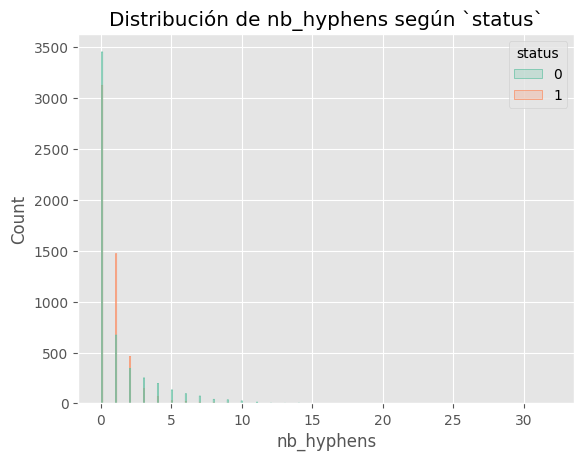

Matriz de Contingencia:


status         0     1
nb_hyphens            
0           3460  3132
1            677  1477
2            349   467
3            256   152
4            202    74
5            138    32
6            101    26
7             78    17
8             46    14
9             41     9

In [250]:
analisis_contingencia(df_train, 'nb_hyphens', 'status')


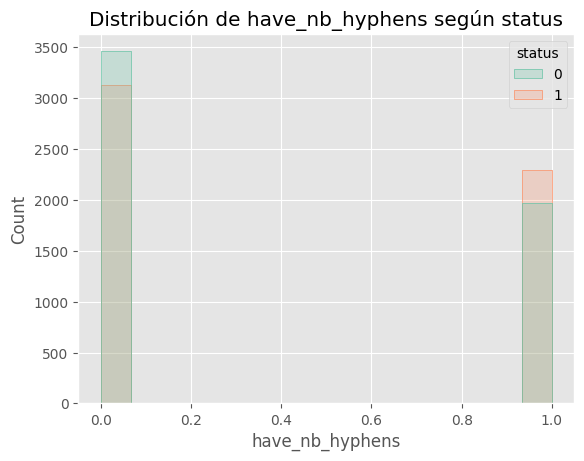

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: Cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status              0     1
have_nb_hyphens            
0                3460  3132
1                1969  2297

Coeficiente de Contingencia: 41.2864
p-value: 0.0000


In [251]:
binary_analysis(df_train, 'nb_hyphens', 'status', '!=', 0)

### Decisión

En principio la usaremos como predictora en su formato natural y decidiremos si eliminarla en el modelado

## **nb_at**

have_nb_at se refiere a la presencia del símbolo "@" (arroba) en una URL. Esta característica se utiliza porque, históricamente, el símbolo "@" se usaba en las URLs para especificar credenciales de usuario antes del nombre de dominio. Aunque este uso está en gran medida obsoleto por razones de seguridad, su presencia en una URL moderna a menudo es una señal de alerta y puede indicar un intento de phishing.

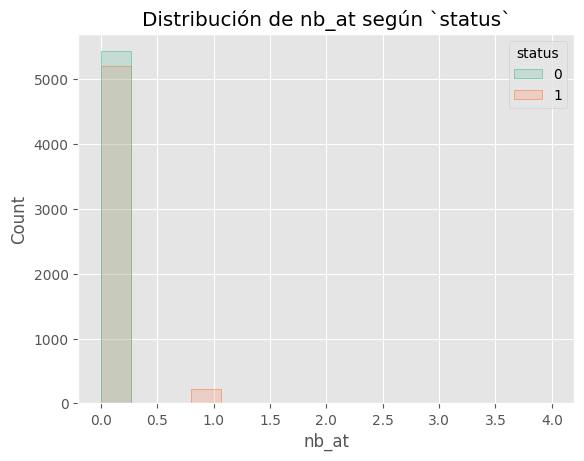

Matriz de Contingencia:


status     0     1
nb_at             
0       5429  5199
1          0   225
2          0     2
3          0     2
4          0     1

In [252]:
analisis_contingencia(df_train, 'nb_at', 'status')

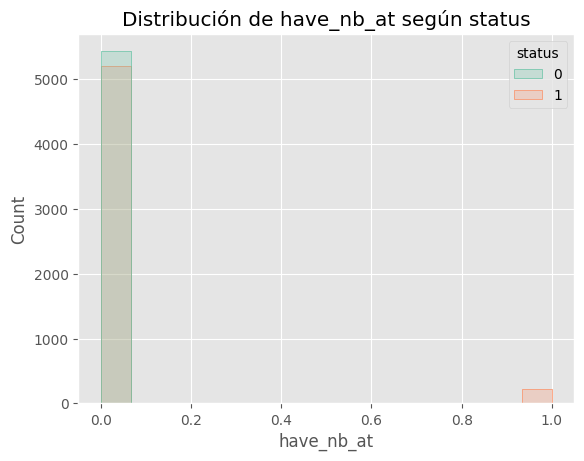

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status         0     1
have_nb_at            
0           5429  5199
1              0   230

Coeficiente de Contingencia: 232.9386
p-value: 0.0000


In [253]:
binary_analysis(df_train, 'nb_at', 'status', '!=', 0)

Aunque solo tenemos 230 registros con @, todos son phishing. Añadiremos la variable a is_weird para englobar los casos extraños, y evitar sobreajuste.

In [254]:
is_weird = []
is_weird.append('have_nb_at')

## **nb_qm**

En un dataset de phishing, nb_qm se refiere al número de signos de interrogación ("?") presentes en una URL. Al igual que otras características relacionadas con la estructura de la URL, nb_qm se utiliza como un indicador potencial de phishing.

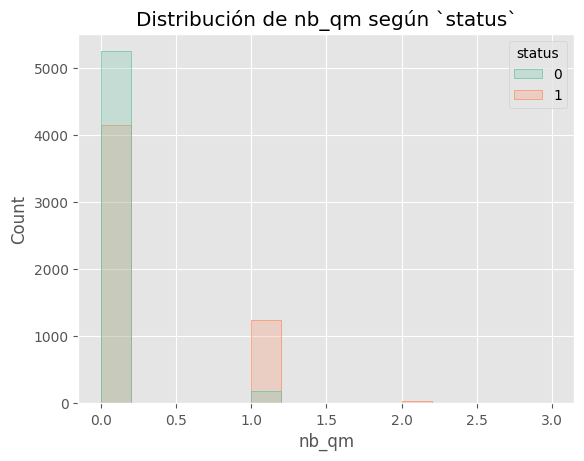

Matriz de Contingencia:


status     0     1
nb_qm             
0       5246  4143
1        182  1237
2          1    42
3          0     7

In [255]:
analisis_contingencia(df_train, 'nb_qm', 'status')

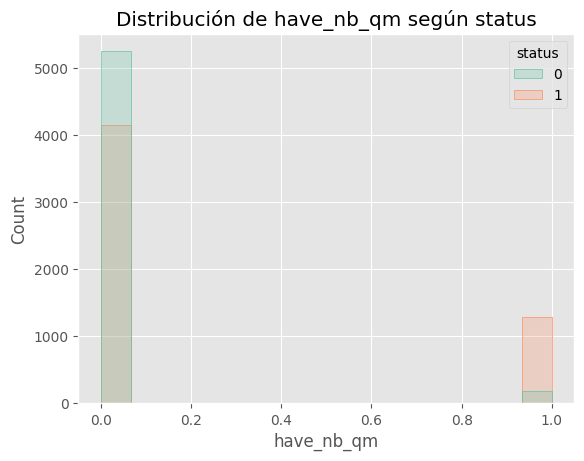

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status         0     1
have_nb_qm            
0           5246  4143
1            183  1286

Coeficiente de Contingencia: 956.0308
p-value: 0.0000


In [256]:
binary_analysis(df_train, 'nb_qm', 'status', '!=', 0)

La añadimos a is weird

In [257]:
is_weird.append('have_nb_qm')

### **nb_and**

nb_and se refiere al número de símbolos "&" (ampersand) presentes en una URL. El ampersand se utiliza en las URLs para separar los pares clave-valor en la cadena de consulta (query string).

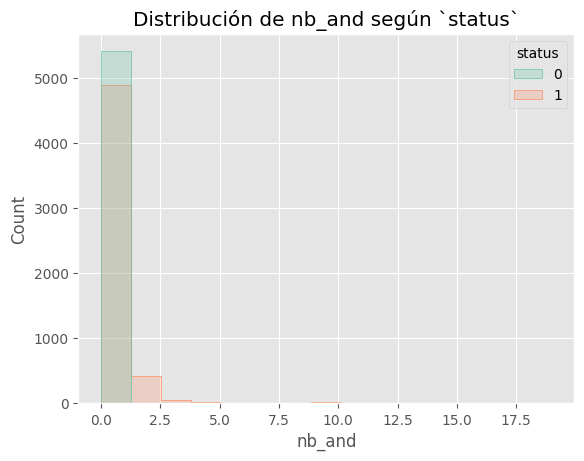

Matriz de Contingencia:


status     0     1
nb_and            
0       5385  4761
1         26   132
2          7   419
3          4    47
4          0    15
5          2     9
6          0    12
7          0     3
8          0     5
9          4    11

In [258]:
analisis_contingencia(df_train, 'nb_and', 'status')


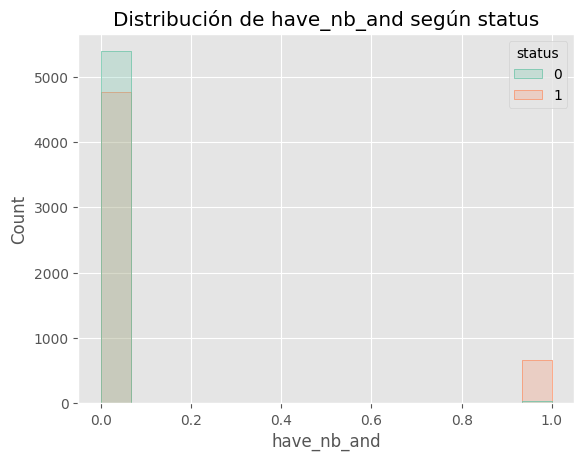

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status          0     1
have_nb_and            
0            5385  4761
1              44   668

Coeficiente de Contingencia: 583.3794
p-value: 0.0000


In [259]:
binary_analysis(df_train, 'nb_and', 'status', '!=', 0)

Convertiremos la variable en binaria y la guardaremos en is_weird

In [260]:
is_weird.append('have_nb_and')

### **nb_or**

En un dataset de phishing, nb_or se refiere al número de veces que aparece la cadena "or" (o, en español) dentro de la URL. 

Esta caracteristica la borraremos ya que todas son 0

In [261]:
df_train = df_train.drop(columns=['nb_or'], axis=1)

### **nb_eq**


En un dataset de phishing, nb_eq se refiere al número de símbolos "=" (signo igual) presentes en una URL. El signo igual se utiliza en las URLs para asignar valores a los parámetros en la cadena de consulta (query string). Al igual que nb_qm (número de signos de interrogación) y nb_and (número de ampersands), nb_eq se utiliza como un posible indicador de phishing, aunque su valor predictivo por sí solo es limitado y debe considerarse en conjunto con otras características.

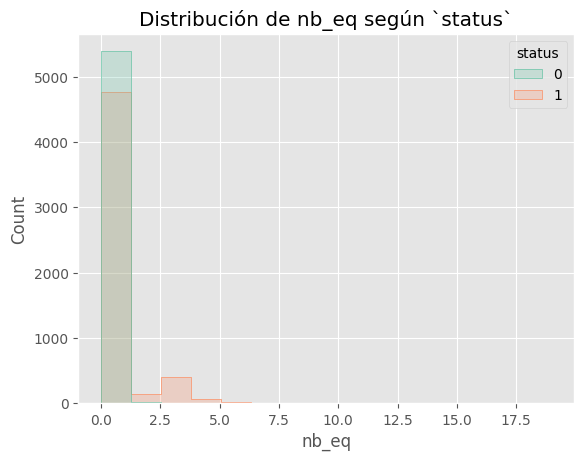

Matriz de Contingencia:


status     0     1
nb_eq             
0       5220  4165
1        167   599
2         24   141
3          8   400
4          3    47
5          1    25
6          1    18
7          0    10
8          0     3
9          0     5

In [262]:
analisis_contingencia(df_train, 'nb_eq', 'status')

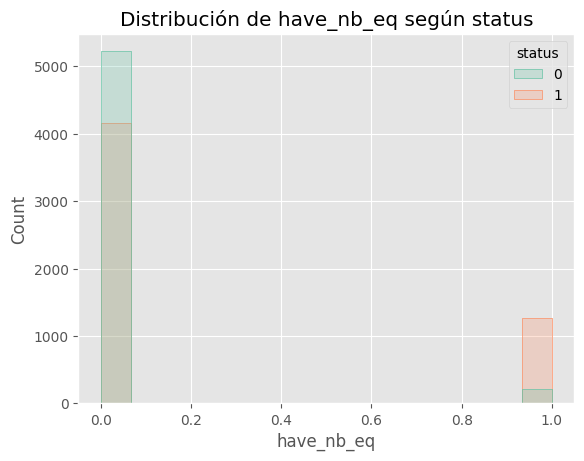

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status         0     1
have_nb_eq            
0           5220  4165
1            209  1264

Coeficiente de Contingencia: 872.5575
p-value: 0.0000


In [263]:
binary_analysis(df_train, 'nb_eq', 'status', '!=', 0)

Se observa una clara relación, por lo que la convertiremos en binaria y la añadiremos a is_weird

In [264]:
is_weird.append('have_nb_eq')

### **nb_underscore**

En un dataset de phishing, nb_underscore se refiere al número de guiones bajos ("_") presentes en una URL. Al igual que otras características que cuentan caracteres específicos en las URLs, nb_underscore se utiliza como un posible indicador de phishing, aunque su valor predictivo suele ser limitado y debe interpretarse en conjunto con otras características.

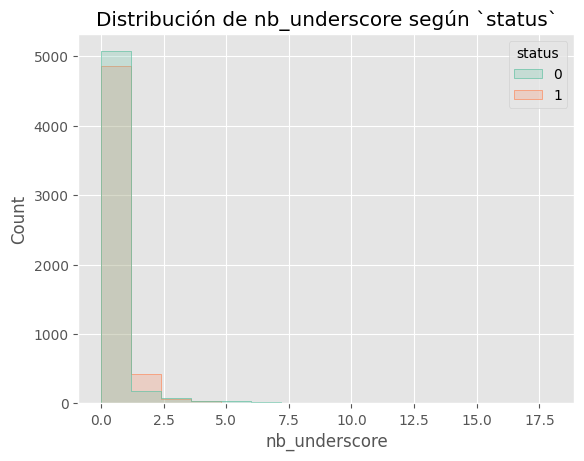

Matriz de Contingencia:


status            0     1
nb_underscore            
0              4778  4480
1               291   377
2               174   425
3                77    65
4                35    41
5                33    13
6                12     5
7                10     4
8                 9     3
9                 1     1

In [265]:
analisis_contingencia(df_train, 'nb_underscore', 'status')

La relación es debil, en principio la descartaremos

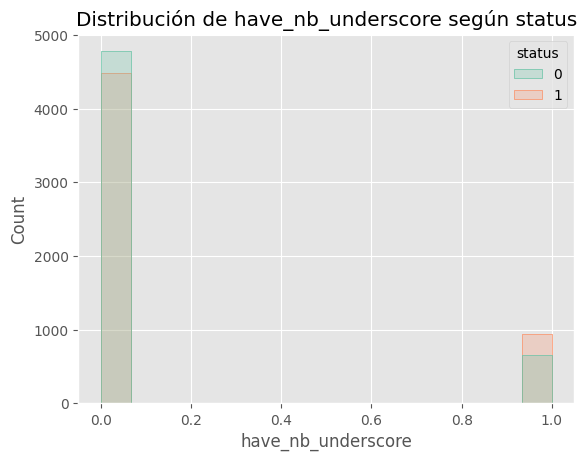

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                 0     1
have_nb_underscore            
0                   4778  4480
1                    651   949

Coeficiente de Contingencia: 64.6585
p-value: 0.0000


In [266]:
binary_analysis(df_train, 'nb_underscore', 'status', '!=', 0)

la relación es leve, en principio lo descartaremos

In [267]:
df_train = df_train.drop(columns=['nb_underscore'], axis=1)
df_train = df_train.drop(columns=['have_nb_underscore'], axis=1)

### **nb_tilde**

En un dataset de phishing, nb_tilde se refiere al número de virgulillas ("~") presentes en una URL. La virgulilla es un carácter especial que, aunque tiene algunos usos técnicos en URLs (como representar el directorio "home" de un usuario en algunos servidores Unix), es relativamente poco común en URLs de sitios web convencionales. Por lo tanto, su presencia, especialmente en cantidades elevadas, puede ser una señal de alerta en la detección de phishing.

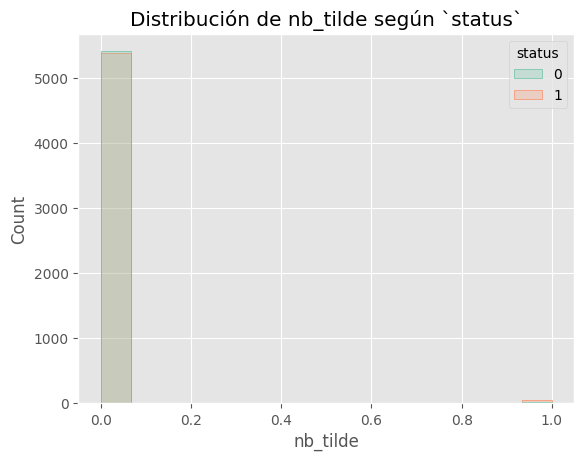

Matriz de Contingencia:


status       0     1
nb_tilde            
0         5407  5377
1           22    52

In [268]:
analisis_contingencia(df_train, 'nb_tilde', 'status')

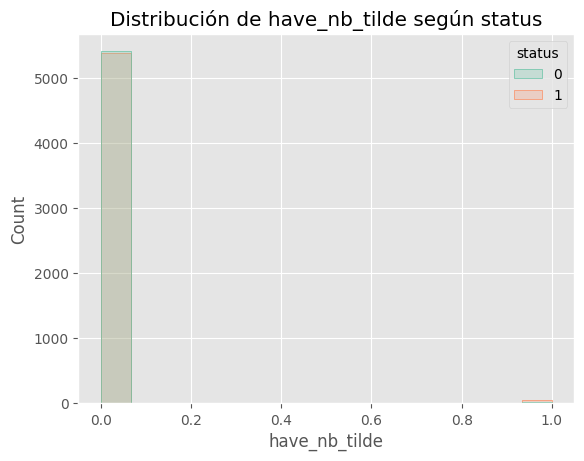

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0005)
Matriz de Contingencia:


status            0     1
have_nb_tilde            
0              5407  5377
1                22    52

Coeficiente de Contingencia: 11.4429
p-value: 0.0007


In [269]:
binary_analysis(df_train, 'nb_tilde', 'status', '!=', 0)

La relación es muy debil, marcada para eliminar

In [270]:
df_train = df_train.drop(columns=['nb_tilde'], axis=1)
df_train = df_train.drop(columns=['have_nb_tilde'], axis=1)

### **nb_percent**

En un dataset de phishing, nb_percent se refiere al número de símbolos de porcentaje ("%") presentes en una URL. El símbolo de porcentaje en una URL se utiliza principalmente para la codificación de caracteres especiales (URL encoding o percent-encoding).

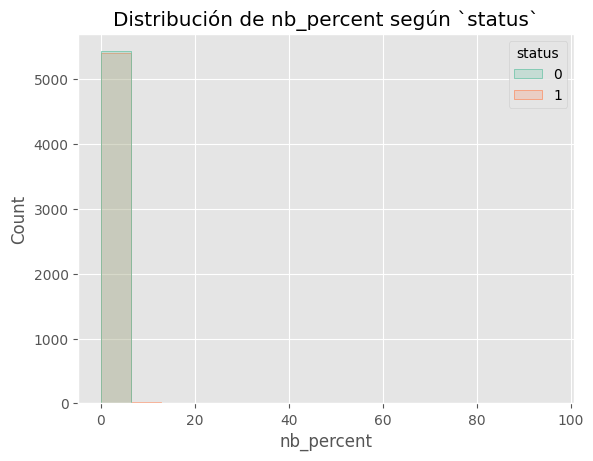

Matriz de Contingencia:


status         0     1
nb_percent            
0           5292  5224
1             60    95
2             19    31
3             14    12
4             22    19
5             10     7
6              5     8
7              2     6
8              0     4
10             0     2

In [271]:
analisis_contingencia(df_train, 'nb_percent', 'status')



parece que hay mas phishing a partir de 8, pero menos de 8 es normal tenerlos

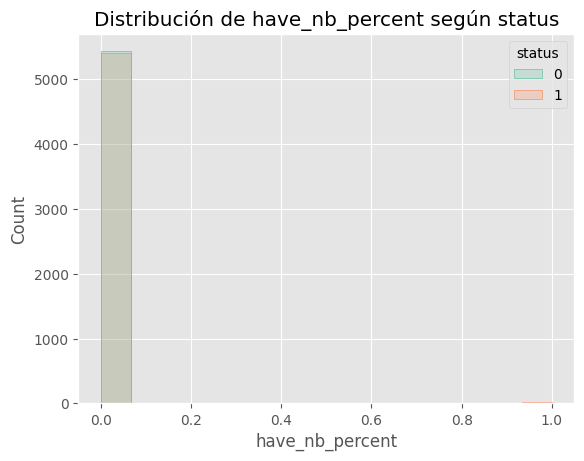

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0001)
Matriz de Contingencia:


status              0     1
have_nb_percent            
0                5424  5402
1                   5    27

Coeficiente de Contingencia: 13.8220
p-value: 0.0002


In [272]:
binary_analysis(df_train, 'nb_percent', 'status', '>', 7)

Tenemos muy pocos registros, y aunque existe una relacion debil, en principio la marcamos para descartarla

In [273]:
df_train = df_train.drop(columns=['nb_percent'], axis=1)
df_train = df_train.drop(columns=['have_nb_percent'], axis=1)

### **nb_star**

nb_star se refiere al número de asteriscos ("*") presentes en una URL. El asterisco tiene varios significados en informática, pero su uso directo en URLs convencionales es poco común. 

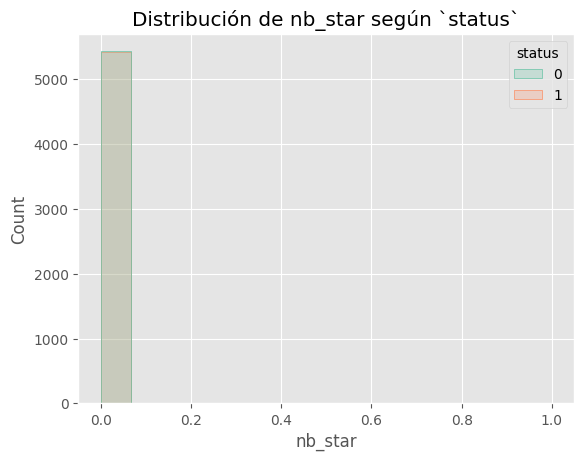

Matriz de Contingencia:


status      0     1
nb_star            
0        5429  5421
1           0     8

In [274]:
analisis_contingencia(df_train, 'nb_star', 'status')

Los datos que tenemos indican una clara relación, aunque debemos tener en cuenta que tenemos muy pocos registros. La mantendremos para añadirla a is_weird

In [275]:
is_weird.append('have_nb_star')

### **nb_colon**

nb_colon se refiere al número de dos puntos (":") presentes en una URL. Los dos puntos tienen un uso específico en la sintaxis de las URLs:

Separación del protocolo y el resto de la URL: http://, https://, ftp://, etc.
Especificación del puerto (menos común): http://www.ejemplo.com:8080/ (donde 8080 es el número de puerto).
Si bien su uso es fundamental en la estructura de una URL, un número inusualmente alto de dos puntos, fuera de su uso estándar, podría ser una señal de alerta en la detección de phishing.

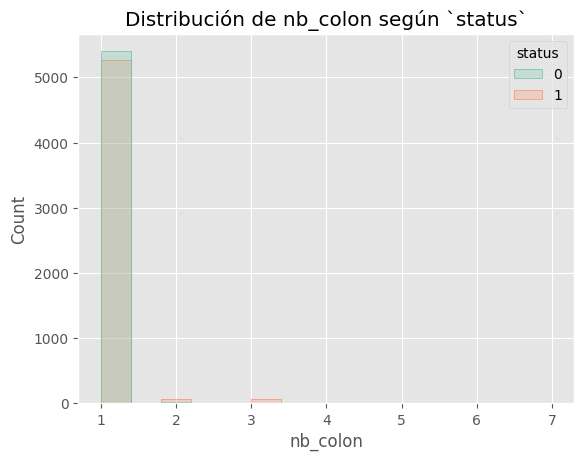

Matriz de Contingencia:


status       0     1
nb_colon            
1         5399  5270
2           29    73
3            1    70
4            0     6
5            0     8
7            0     2

In [276]:
analisis_contingencia(df_train, 'nb_colon', 'status')

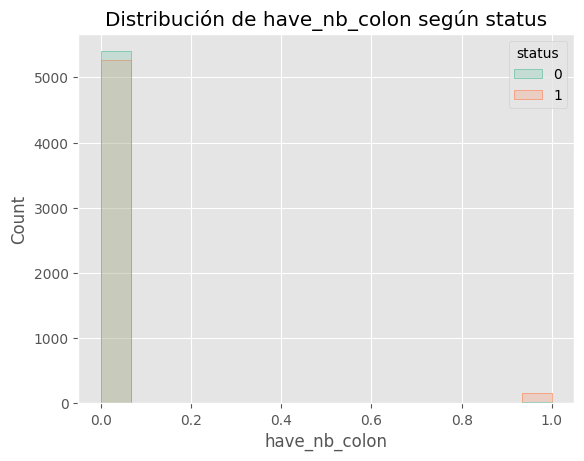

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status            0     1
have_nb_colon            
0              5399  5270
1                30   159

Coeficiente de Contingencia: 88.2235
p-value: 0.0000


In [277]:
binary_analysis(df_train, 'nb_colon', 'status', '>', 1)

Tiene un coeficiente de contingencia moderado, se transforma en binaria y se añade a is_weird

In [278]:
is_weird.append('have_nb_colon')

### **nb_comma**

nb_comma se refiere al número de comas (",") presentes en una URL. La coma no tiene un uso estándar ni un significado especial dentro de la sintaxis de las URLs. Por lo tanto, su presencia en una URL es altamente inusual y puede ser una fuerte señal de alerta en la detección de phishing.

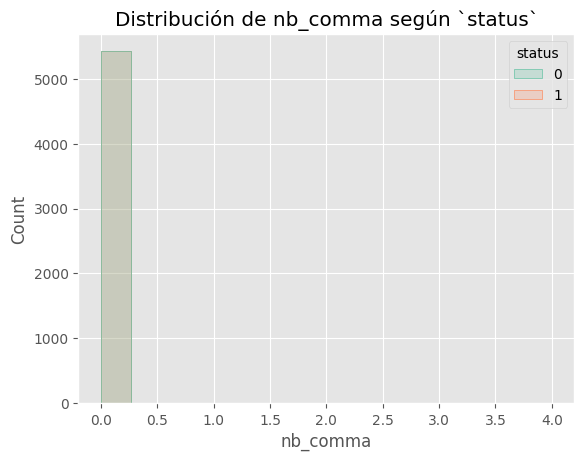

Matriz de Contingencia:


status       0     1
nb_comma            
0         5417  5417
1            9     4
2            2     3
3            1     0
4            0     5

In [279]:
analisis_contingencia(df_train, 'nb_comma', 'status')

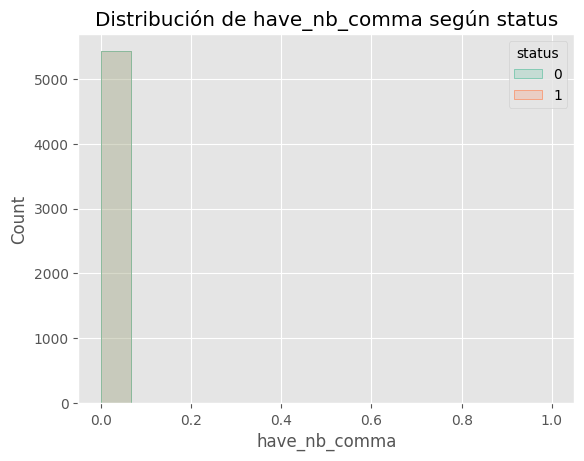

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: No hay relación significativa (p-value = 1.0000)
Matriz de Contingencia:


status            0     1
have_nb_comma            
0              5417  5417
1                12    12

Coeficiente de Contingencia: 0.0000
p-value: 1.0000


In [280]:
binary_analysis(df_train, 'nb_comma', 'status', '!=', 0)

No hay relación. La marcamos para descartarla

In [281]:
df_train = df_train.drop(columns=['nb_comma'], axis=1)
df_train = df_train.drop(columns=['have_nb_comma'], axis=1)

### **nb_semicolumn**

nb_semicolumn se refiere al número de puntos y comas (";") presentes en una URL. El punto y coma se utiliza en las URLs principalmente como separador de parámetros en la cadena de consulta (query string).

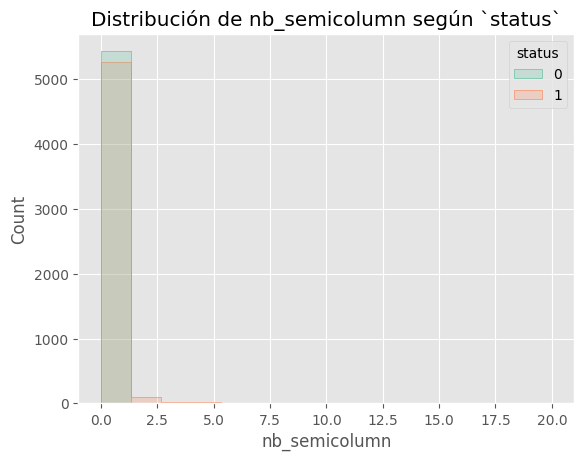

Matriz de Contingencia:


status            0     1
nb_semicolumn            
0              5428  5197
1                 1    72
2                 0    95
3                 0    17
4                 0    14
5                 0     3
6                 0     8
7                 0     2
8                 0     3
9                 0     7

In [282]:
analisis_contingencia(df_train, 'nb_semicolumn', 'status')

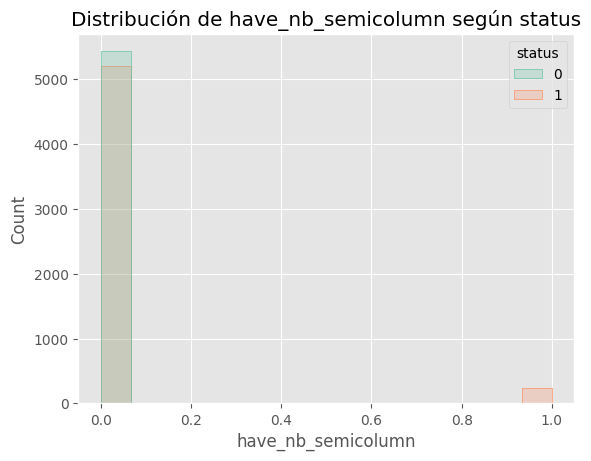

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                 0     1
have_nb_semicolumn            
0                   5428  5197
1                      1   232

Coeficiente de Contingencia: 232.0175
p-value: 0.0000


In [283]:
binary_analysis(df_train, 'nb_semicolumn', 'status', '!=', 0)

Tiene relación y fuerza. La convertiremos en binaria y añadimos a is_weird

In [284]:
is_weird.append('have_nb_semicolumn')

### **nb_dollar**

nb_dollar se refiere al número de símbolos de dólar ("$") presentes en una URL. El símbolo de dólar no tiene un uso estándar en la sintaxis básica de las URLs. Por lo tanto, su presencia es altamente inusual y puede ser una señal de alerta en la detección de phishing.

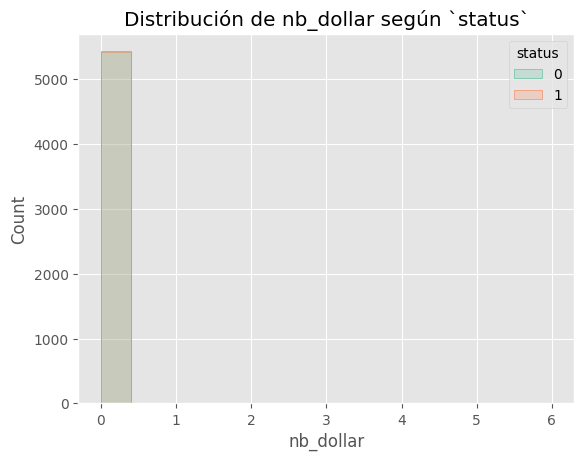

Matriz de Contingencia:


status        0     1
nb_dollar            
0          5429  5419
1             0     6
2             0     1
3             0     2
6             0     1

In [285]:
analisis_contingencia(df_train, 'nb_dollar', 'status')

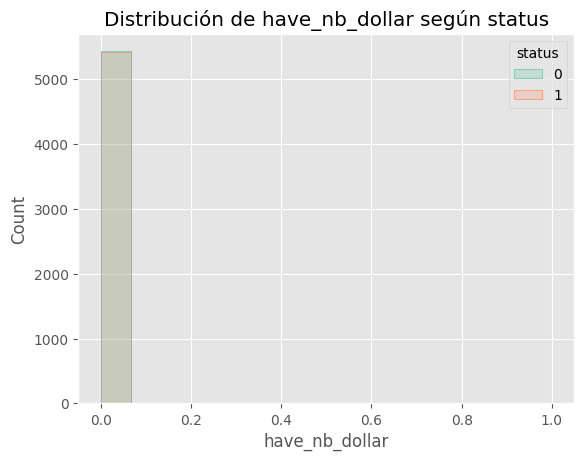

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0016)
Matriz de Contingencia:


status             0     1
have_nb_dollar            
0               5429  5419
1                  0    10

Coeficiente de Contingencia: 8.1075
p-value: 0.0044


In [286]:
binary_analysis(df_train, 'nb_dollar', 'status', '!=', 0)

A pesar de existir la relación, tenemos muy pocos registros, lo añadimos a is_weird

In [287]:
is_weird.append('have_nb_dollar')

### **nb_space**

nb_space se refiere al número de espacios en blanco presentes en una URL. Los espacios en blanco no están permitidos en las URLs según las especificaciones RFC (Request for Comments) que las definen. Por lo tanto, su presencia en una URL es una fuerte señal de que algo anda mal y puede ser un indicador útil en la detección de phishing.

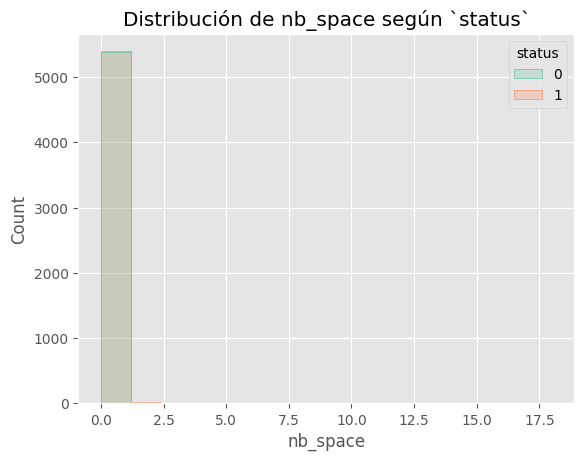

Matriz de Contingencia:


status       0     1
nb_space            
0         5338  5322
1           55    72
2           14    22
3           10     7
4            2     3
5            4     0
6            3     1
7            2     1
18           1     1

In [288]:
analisis_contingencia(df_train, 'nb_space', 'status')

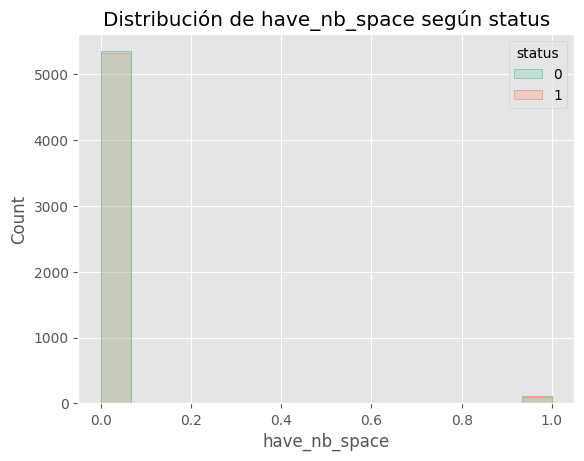

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: Cumple
Prueba de Kruskal-Wallis: No hay relación significativa (p-value = 0.2512)
Matriz de Contingencia:


status            0     1
have_nb_space            
0              5338  5322
1                91   107

Coeficiente de Contingencia: 1.1575
p-value: 0.2820


In [289]:
binary_analysis(df_train, 'nb_space', 'status', '!=', 0)

No hay relación significativa, por lo que marcamos la variable para descartarla

In [290]:
df_train = df_train.drop(columns=['nb_space'], axis=1)
df_train = df_train.drop(columns=['have_nb_space'], axis=1)

### **nb_www**

nb_www se refiere al número de veces que aparece la cadena "www" en una URL. Aunque "www" se ha utilizado tradicionalmente como prefijo para indicar un subdominio de un sitio web, su uso ya no es obligatorio ni tan común. Por lo tanto, un número inusual de apariciones de "www" en una URL puede ser una señal de alerta en la detección de phishing.

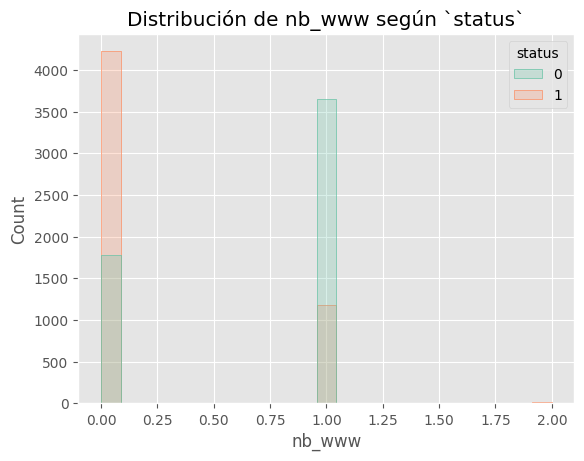

Matriz de Contingencia:


status     0     1
nb_www            
0       1778  4222
1       3648  1185
2          3    22

In [291]:
analisis_contingencia(df_train, 'nb_www', 'status')

Lo normal es tener 1, en casos sin www, hay muchas url validas,  en el caso de 2 www casi todos los casos son phishing, lo cual es lo normal. Ya que es común usar url sin www, pero no es normal que tengan mas de una. Podriamos categorizarla en 0, 1, mas de 1, pero esto actualmente no cambiaría la distribución, asi que lo mantendremos en las 3 categorías. Tendremos que codificarla.

En este caso, convertir la variable a binaria nos puede hacer perder información, ya que sabemos que mas de 1 es potencialmente phishing, pero menos que 1, es un indicio pero no una regla. Mantenemos la variable ya que tiene una relación fuerte

### **nb_com**

En un dataset de phishing, nb_com se refiere al número de veces que aparece la cadena ".com" en una URL. ".com" es un dominio de nivel superior (TLD) genérico que se utiliza ampliamente para sitios web comerciales. Si bien su presencia es normal en muchas URLs, un número inusual de apariciones de ".com" puede ser una señal de alerta en la detección de phishing.

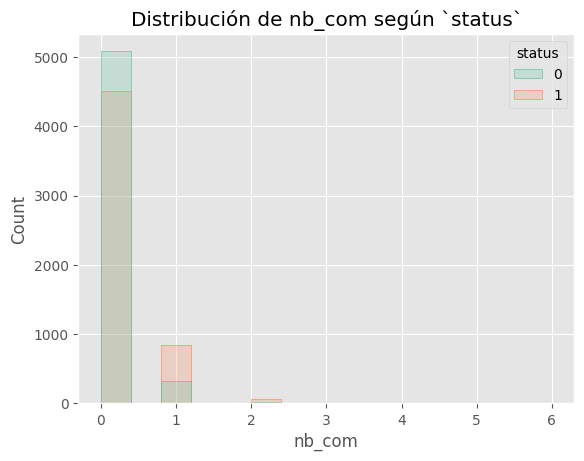

Matriz de Contingencia:


status     0     1
nb_com            
0       5078  4514
1        323   842
2         25    59
3          3     8
4          0     3
5          0     1
6          0     2

In [292]:
analisis_contingencia(df_train, 'nb_com', 'status')

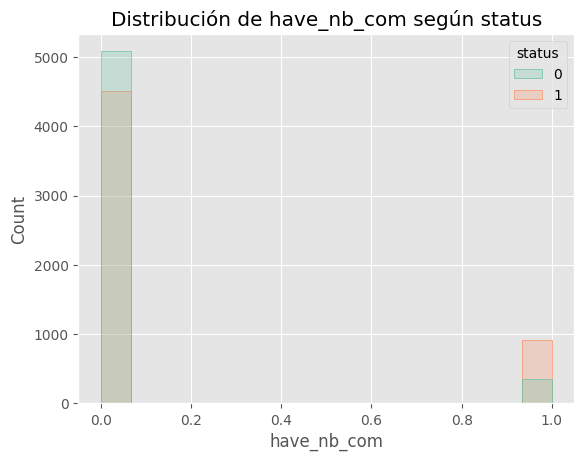

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status          0     1
have_nb_com            
0            5078  4514
1             351   915

Coeficiente de Contingencia: 283.4156
p-value: 0.0000


In [293]:

binary_analysis(df_train, 'nb_com', 'status', '!=', 0)

La relación es alta, en principio la mantendremos en el pipeline como binaria y la añadimos a is_weird

In [294]:
is_weird.append('have_nb_com')

### **nb_dslash**

En un dataset de phishing, nb_dslash se refiere al número de barras dobles ("//") presentes en una URL. La presencia de barras dobles es crucial en la sintaxis de una URL, ya que separan el protocolo (como "http://" o "https://") del resto de la URL. Sin embargo, un número inusual de barras dobles, especialmente en lugares distintos al inicio de la URL después del protocolo, puede ser una señal de alerta en la detección de phishing.

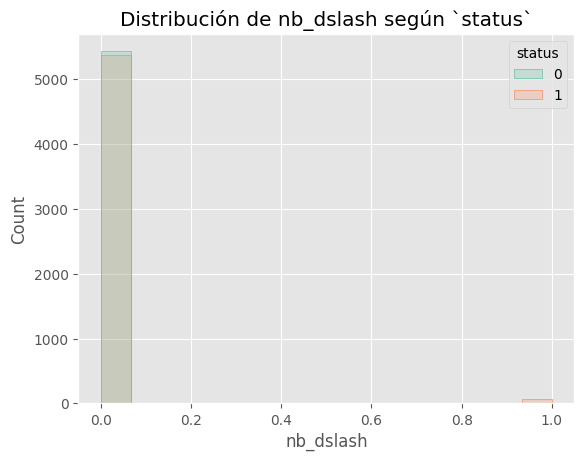

Matriz de Contingencia:


status        0     1
nb_dslash            
0          5425  5364
1             4    65

In [295]:
analisis_contingencia(df_train, 'nb_dslash', 'status')

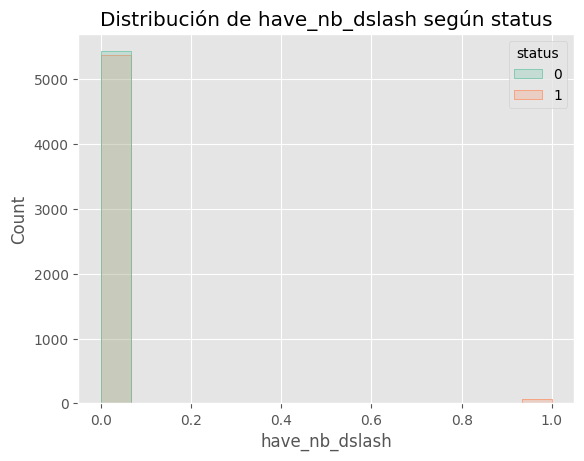

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status             0     1
have_nb_dslash            
0               5425  5364
1                  4    65

Coeficiente de Contingencia: 52.5076
p-value: 0.0000


In [296]:
binary_analysis(df_train, 'nb_dslash', 'status', '!=', 0)

Aunque hay pocos registros, lo mantenemos y añadimos a is_weird

In [297]:
is_weird.append('have_nb_dslash')

### **http_in_path**

En un dataset de phishing, http_in_path se refiere a la presencia de la cadena "http" dentro de la parte de la ruta de la URL, es decir, después del nombre de dominio. No se refiere a la parte del protocolo (como "http://" o "https://").

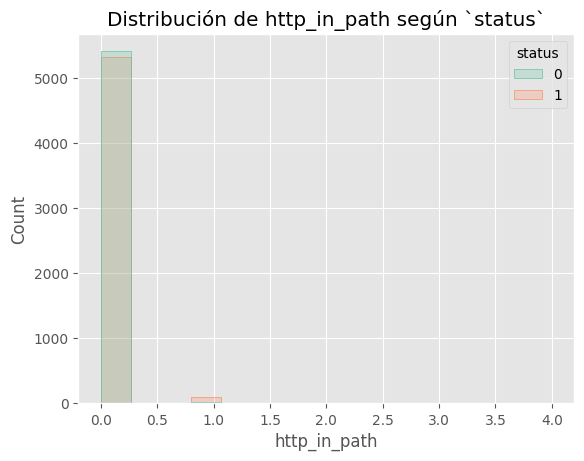

Matriz de Contingencia:


status           0     1
http_in_path            
0             5404  5315
1               24    95
2                1     8
3                0     2
4                0     9

In [298]:
analisis_contingencia(df_train, 'http_in_path', 'status')

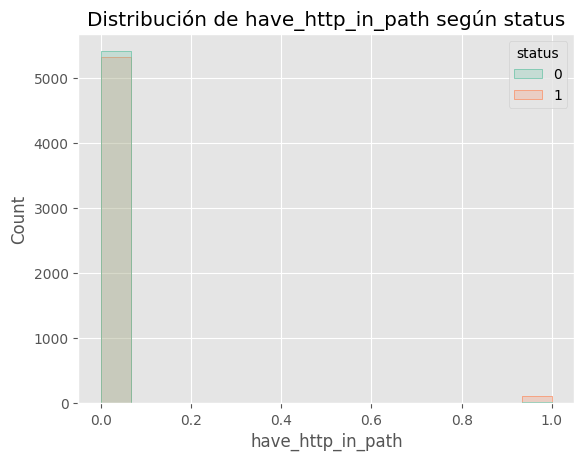

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                0     1
have_http_in_path            
0                  5404  5315
1                    25   114

Coeficiente de Contingencia: 56.4347
p-value: 0.0000


In [299]:
binary_analysis(df_train, 'http_in_path', 'status', '!=', 0)

La añadimos a is_weird

In [300]:
is_weird.append('have_http_in_path')

### **https_token**

https_token se refiere a la presencia de la cadena "https" (o variantes como "HTTPS", "HttpS", etc.) dentro del nombre de dominio o la ruta de la URL, pero no como parte del protocolo inicial ("https://"). Es decir, se busca la presencia de "https" en cualquier lugar de la URL después de las dos barras iniciales "//".

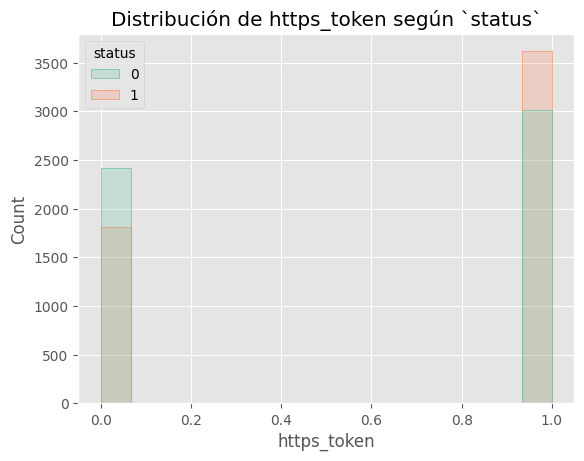

Matriz de Contingencia:


status          0     1
https_token            
0            2416  1815
1            3013  3614

In [301]:
analisis_contingencia(df_train, 'https_token', 'status')


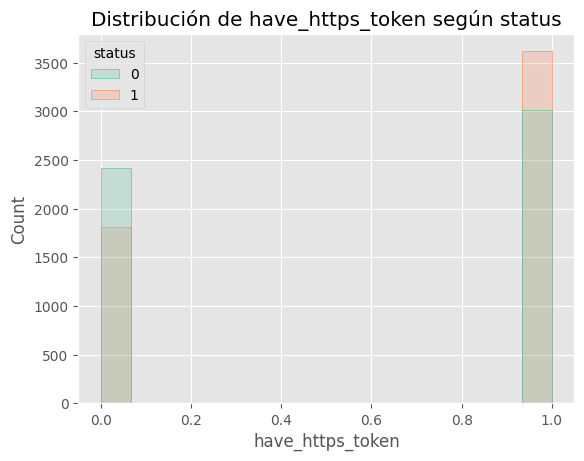

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status               0     1
have_https_token            
0                 2416  1815
1                 3013  3614

Coeficiente de Contingencia: 139.4095
p-value: 0.0000


In [302]:
binary_analysis(df_train, 'https_token', 'status', '!=', 0)

El token https indica:

para 0: Usa https
para 1: no usa https

El nombre de la variable no refleja realmente el contenido

Una vez entendido, tiene sentido, ya que aquellas webs que usan https suelen ser menos dadas a phishing, aunque la relacion es moderada

La mantendremos en principio

### **ratio_digits_url**

ratio_digits_url se refiere a la proporción de dígitos (números del 0 al 9) presentes en la URL. Esta característica se utiliza porque las URLs de phishing a veces contienen una cantidad inusualmente alta de dígitos, a menudo como parte de intentos de ofuscación, generación automática de URLs o para dificultar la memorización de la URL.

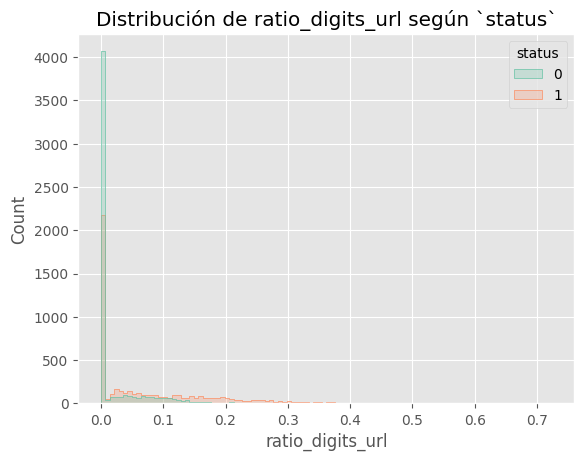

Matriz de Contingencia:


status               0     1
ratio_digits_url            
0.000             4062  2175
0.006                0     1
0.006                1     0
0.007                0     1
0.007                0     2
0.008                1     0
0.008                0     1
0.008                0     1
0.008                1     0
0.008                0     1

In [303]:
analisis_contingencia(df_train, 'ratio_digits_url', 'status')

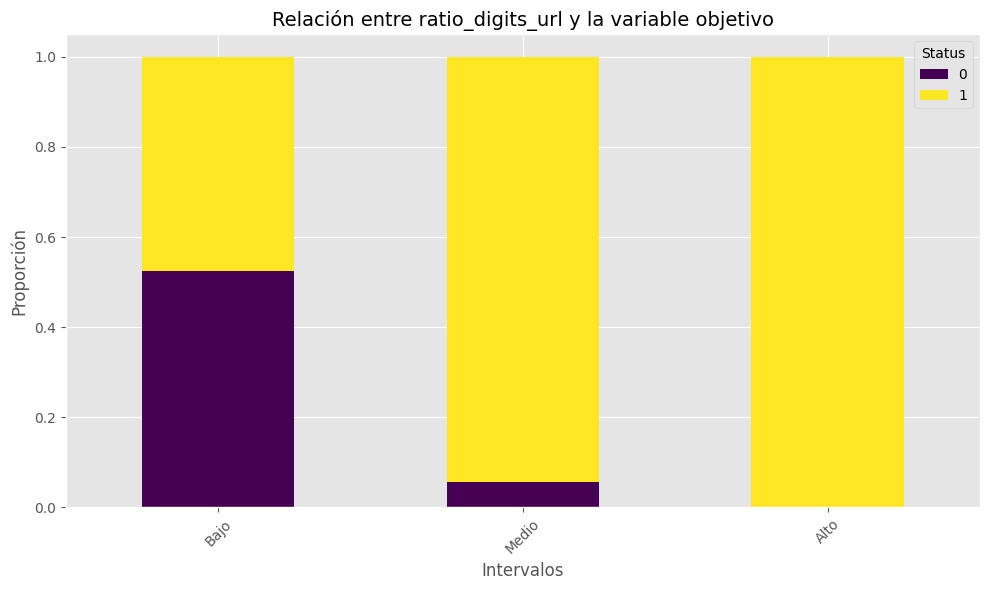

In [304]:
# Aplicar la función con 3 intervalos
resultado = categorize_and_analyze(
    df_train, 
    column='ratio_digits_url', 
    target='status', 
    bins=3, 
    labels=['Bajo', 'Medio', 'Alto']
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("ratio_digits_url_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre ratio_digits_url y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


Dividiendo a partir de 0.12 la relación con phishing es muy alta. La variable correlaciona: A mas digitos mas probabilidad de ser phishing.

Probaremos la variable binaria y la variable continua por si aporta información.

### **ratio_digits_host**

 ratio_digits_host se refiere a la proporción de dígitos (números del 0 al 9) presentes en el nombre del host (o dominio) de la URL. El nombre del host es la parte de la URL que identifica el servidor que aloja el sitio web, por ejemplo, www.google.com (el host es google.com

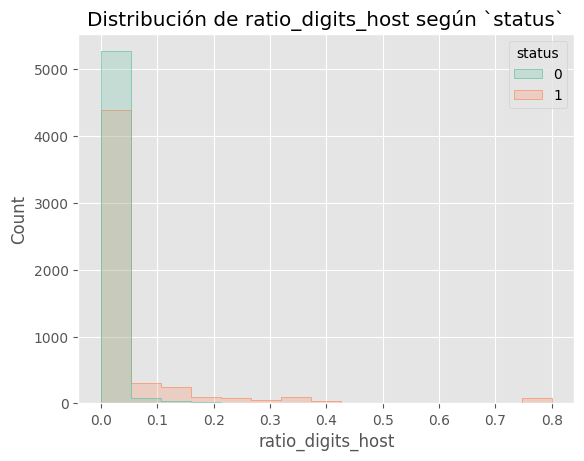

Matriz de Contingencia:


status                0     1
ratio_digits_host            
0.000              5229  4194
0.017                 0     2
0.017                 0     1
0.018                 0     1
0.023                 0     1
0.023                 0     1
0.024                 0     6
0.025                 0     1
0.026                 0     3
0.026                 0     6

In [305]:
analisis_contingencia(df_train, 'ratio_digits_host', 'status')

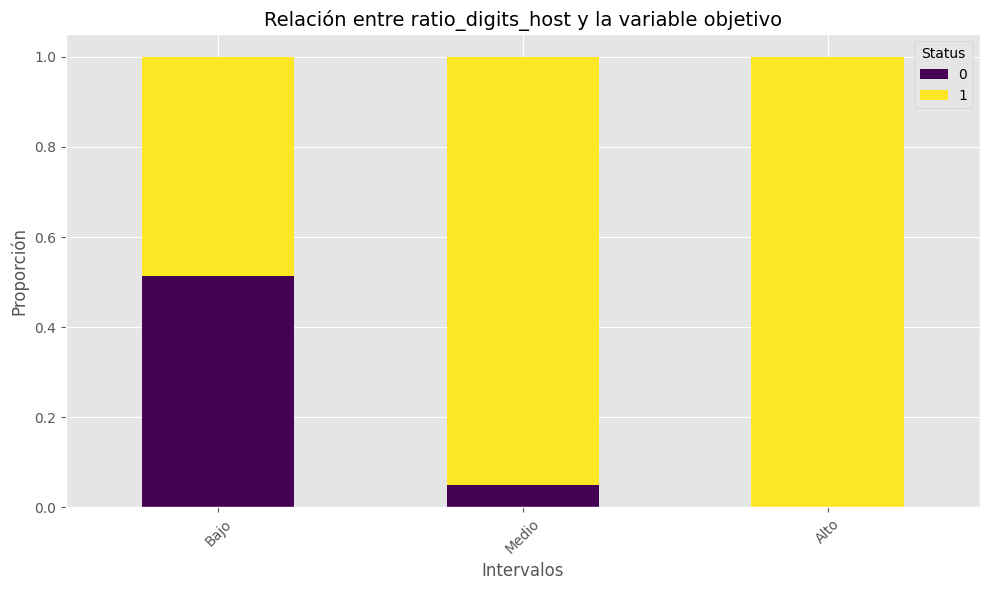

In [306]:
resultado = categorize_and_analyze(
    df_train, 
    column='ratio_digits_host', 
    target='status', 
    bins=3, 
    labels=['Bajo', 'Medio', 'Alto']
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("ratio_digits_host_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre ratio_digits_host y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

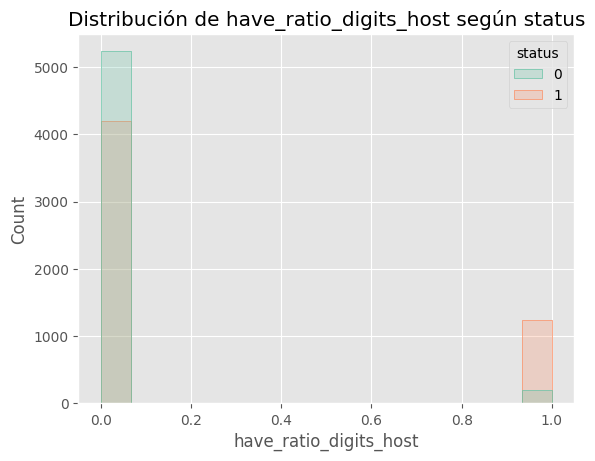

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                     0     1
have_ratio_digits_host            
0                       5229  4194
1                        200  1235

Coeficiente de Contingencia: 858.5188
p-value: 0.0000


In [307]:
binary_analysis(df_train, 'ratio_digits_host', 'status', '!=', 0)

### **punycode**

punycode se refiere a un esquema de codificación utilizado para representar caracteres Unicode en nombres de dominio. Debido a que los nombres de dominio originalmente solo permitían caracteres ASCII (letras del alfabeto inglés, números y algunos símbolos), se desarrolló Punycode para permitir el uso de otros caracteres, como letras con acentos, caracteres cirílicos, árabes, chinos,

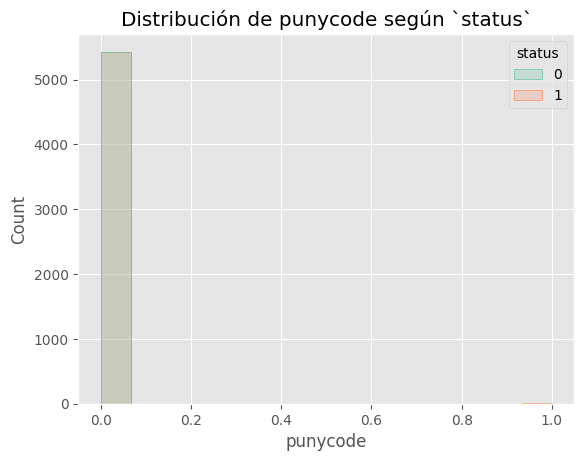

Matriz de Contingencia:


status       0     1
punycode            
0         5429  5425
1            0     4

In [308]:
analisis_contingencia(df_train, 'punycode', 'status')

Tiene muy pocos registros, lo descartaremos aunque añadiremos su informacion a la variable is_weird

In [309]:
is_weird.append('have_punycode')

### **port**

el concepto de port (puerto) se refiere al número de puerto TCP/IP que se utiliza para establecer una conexión con un servidor. Aunque generalmente no se muestra explícitamente en las URLs comunes.

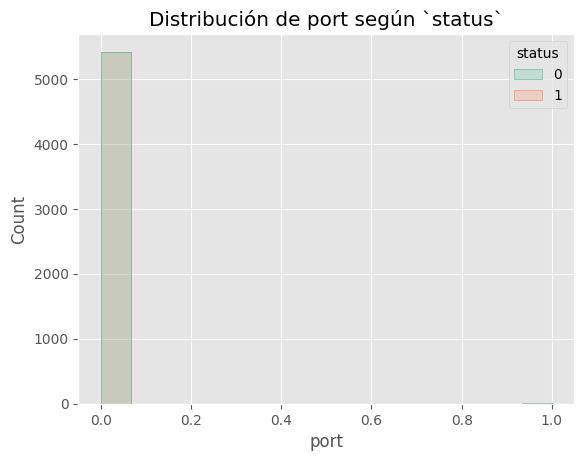

Matriz de Contingencia:


status     0     1
port              
0       5418  5415
1         11    14

In [310]:
analisis_contingencia(df_train, 'port', 'status')

No se aprecian diferencias significativas. Descartar

In [311]:
df_train = df_train.drop(columns=['port'], axis=1)

### **tld_in_path**

En el contexto de la detección de phishing, tld_in_path se refiere a la presencia de un Dominio de Nivel Superior (TLD, por sus siglas en inglés, Top-Level Domain) dentro de la ruta (path) de la URL.

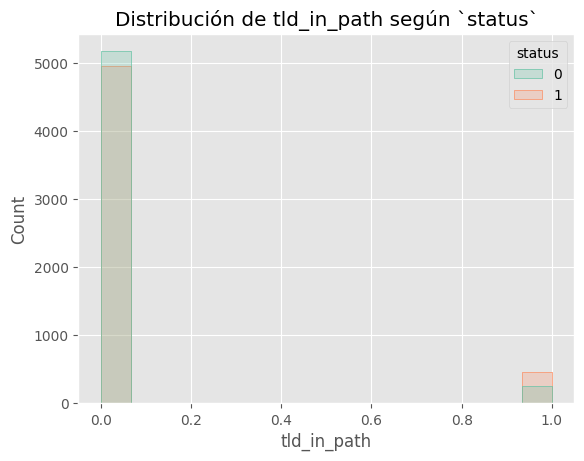

Matriz de Contingencia:


status          0     1
tld_in_path            
0            5174  4960
1             255   469

In [312]:
analisis_contingencia(df_train, 'tld_in_path', 'status')

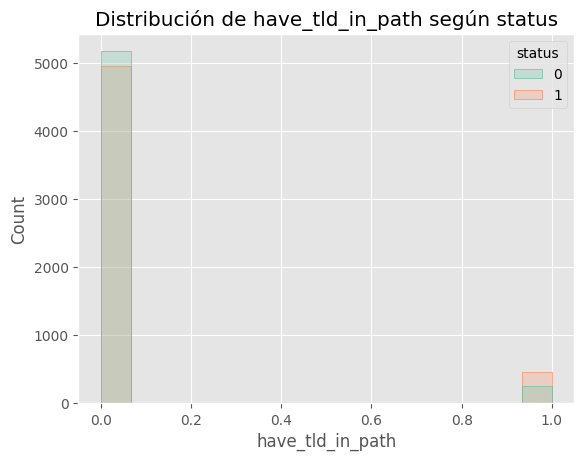

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status               0     1
have_tld_in_path            
0                 5174  4960
1                  255   469

Coeficiente de Contingencia: 67.1413
p-value: 0.0000


In [313]:
binary_analysis(df_train, 'tld_in_path', 'status', '!=', 0)

Existe relación, aunque su fuerza es leve. En principio descartar.

In [314]:
df_train = df_train.drop(columns=['tld_in_path'], axis=1)

### **tld_in_subdomain**


tld_in_subdomain se refiere a la presencia de un Dominio de Nivel Superior (TLD) dentro de la parte del subdominio de una UR

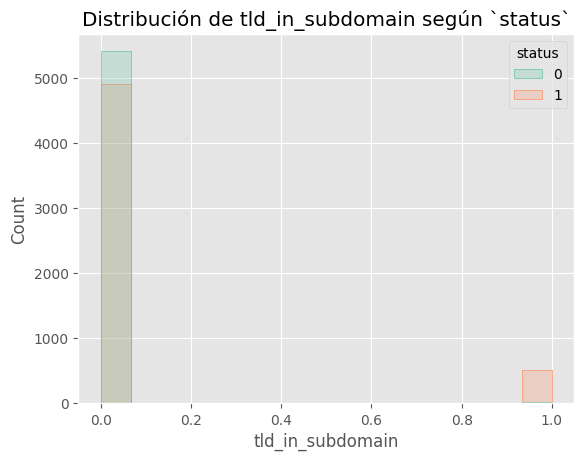

Matriz de Contingencia:


status               0     1
tld_in_subdomain            
0                 5406  4909
1                   23   520

In [315]:
analisis_contingencia(df_train, 'tld_in_subdomain', 'status')

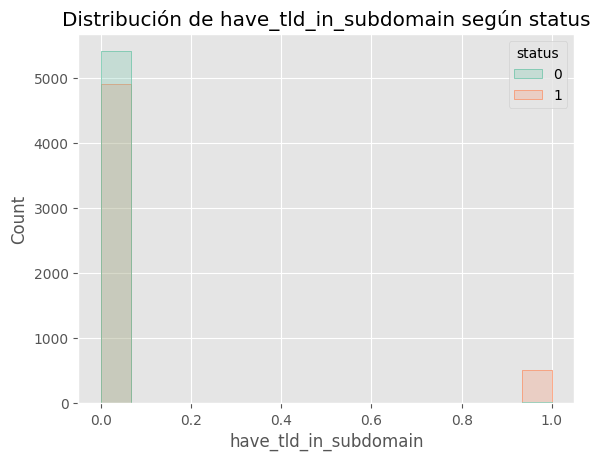

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                    0     1
have_tld_in_subdomain            
0                      5406  4909
1                        23   520

Coeficiente de Contingencia: 476.9185
p-value: 0.0000


In [316]:
binary_analysis(df_train, 'tld_in_subdomain', 'status', '!=', 0)    

La añadimos a is_weird

In [317]:
is_weird.append('have_tld_in_subdomain')

### **Abnormal_subdomain**

Abnormal_subdomain se refiere a la presencia de características inusuales o anómalas en la parte del subdominio de una URL que sugieren un intento de engaño. No existe una definición única y universalmente aceptada de "subdominio anormal", pero generalmente se refiere a patrones que se desvían de las convenciones comunes y que podrían indicar una URL maliciosa.

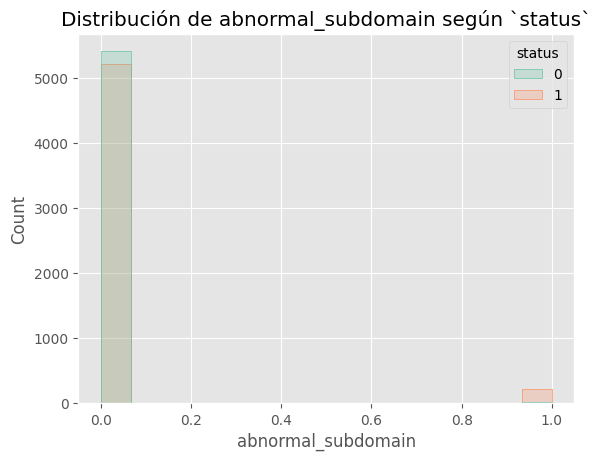

Matriz de Contingencia:


status                 0     1
abnormal_subdomain            
0                   5414  5214
1                     15   215

In [318]:
analisis_contingencia(df_train, 'abnormal_subdomain', 'status')

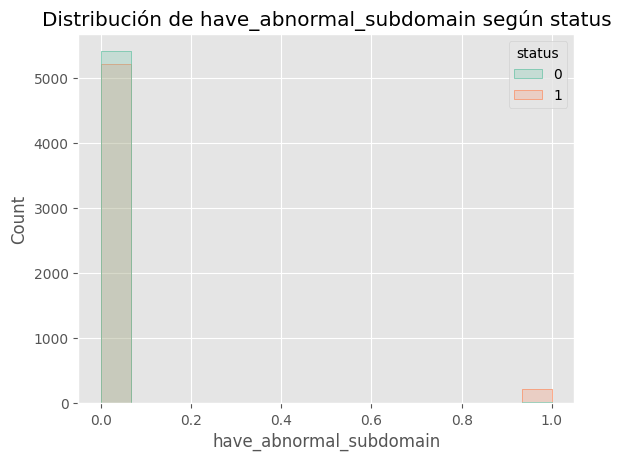

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                      0     1
have_abnormal_subdomain            
0                        5414  5214
1                          15   215

Coeficiente de Contingencia: 175.9044
p-value: 0.0000


In [319]:
binary_analysis(df_train, 'abnormal_subdomain', 'status', '!=', 0)

La añadimos a is_weird

In [320]:
is_weird.append('have_abnormal_subdomain')

### **nb_subdomains**

 nb_subdomains se refiere al número de subdominios presentes en una URL. Un subdominio es una parte del nombre de dominio que se ubica a la izquierda del dominio de segundo nivel,

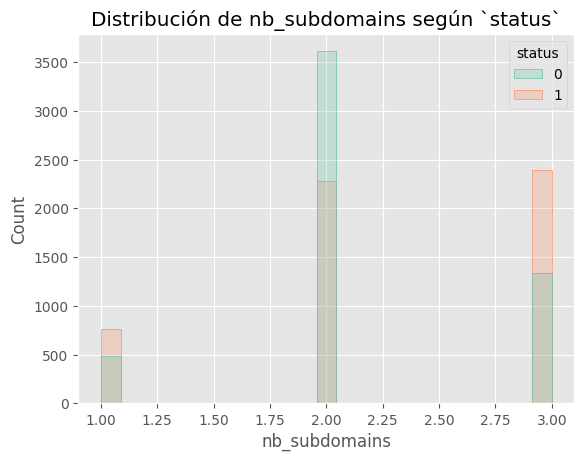

Matriz de Contingencia:


status            0     1
nb_subdomains            
1               482   762
2              3608  2278
3              1339  2389

In [321]:
analisis_contingencia (df_train, 'nb_subdomains', 'status')

La mantenemos en 3 grupos

### **prefix_suffix**

prefix_suffix generalmente se refiere a la presencia de un guion (-) en el dominio o la URL de una página web. Los ciberdelincuentes suelen usar guiones en las URLs de phishing como una táctica para parecer legítimos o para incluir palabras clave adicionales que engañen al usuario.

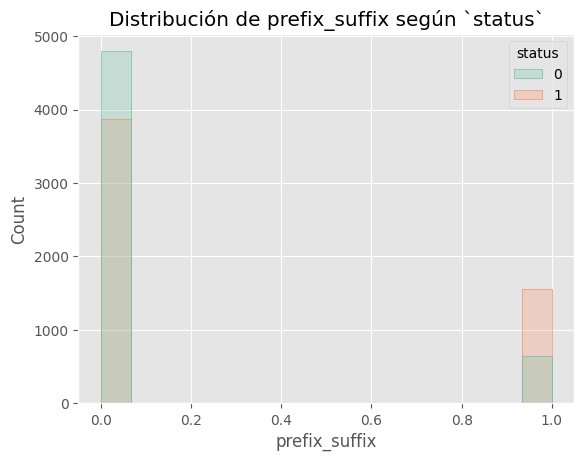

Matriz de Contingencia:


status            0     1
prefix_suffix            
0              4790  3870
1               639  1559

In [322]:
analisis_contingencia(df_train, 'prefix_suffix', 'status')

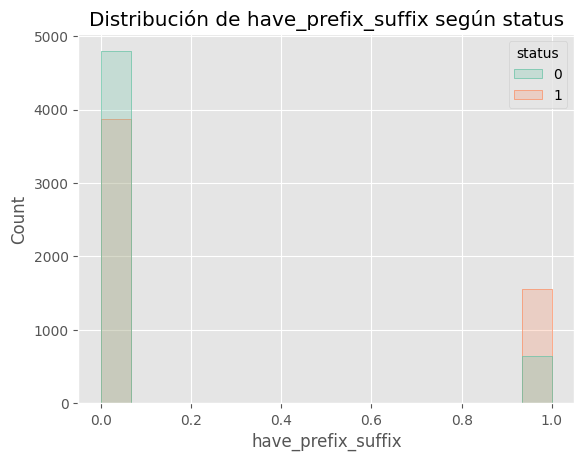

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                 0     1
have_prefix_suffix            
0                   4790  3870
1                    639  1559

Coeficiente de Contingencia: 481.7650
p-value: 0.0000


In [323]:
binary_analysis(df_train, 'prefix_suffix', 'status', '!=', 0)

Añadiremos a is_weird

In [324]:
is_weird.append('have_prefix_suffix')

### **random_domain**

random_domain probablemente se refiere a si el dominio parece aleatorio o está compuesto por caracteres sin un patrón claro, lo que suele ser una señal de phishing.

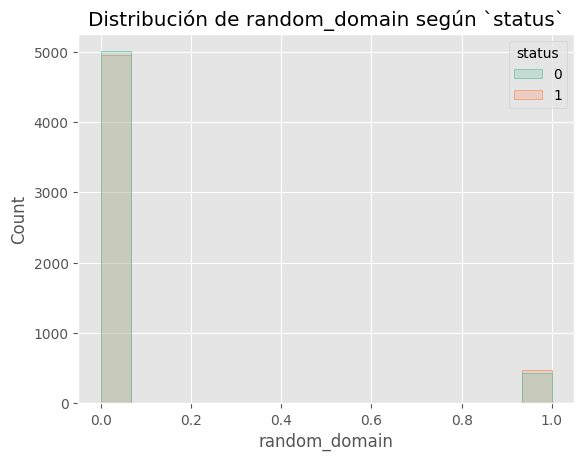

Matriz de Contingencia:


status            0     1
random_domain            
0              5001  4950
1               428   479

In [325]:
analisis_contingencia(df_train, 'random_domain', 'status')

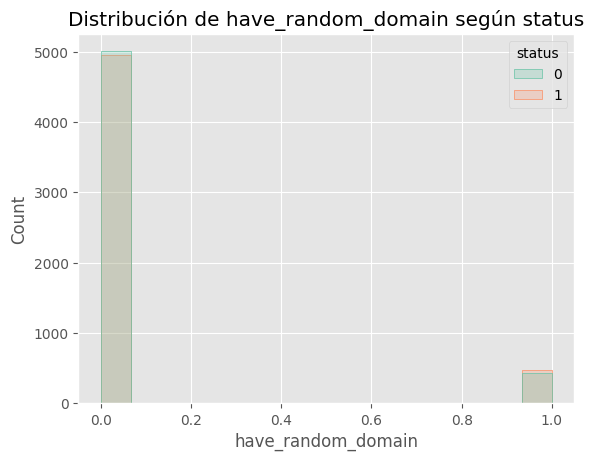

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: Cumple
Prueba de Kruskal-Wallis: No hay relación significativa (p-value = 0.0769)
Matriz de Contingencia:


status                 0     1
have_random_domain            
0                   5001  4950
1                    428   479

Coeficiente de Contingencia: 3.0076
p-value: 0.0829


In [326]:
binary_analysis(df_train, 'random_domain', 'status', '!=', 0)

No hay relación significativa, la descartamos

In [327]:
df_train = df_train.drop(columns=['random_domain'], axis=1)

### **shortening_service**

shortening_service probablemente se refiere a si la URL utiliza un servicio de acortamiento de URLs. Los servicios de este tipo son frecuentemente utilizados en campañas de phishing para ocultar la verdadera URL maliciosa detrás de un enlace más corto y menos sospechoso.

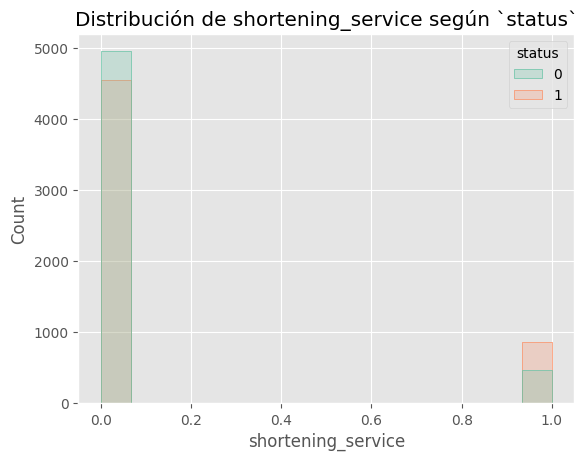

Matriz de Contingencia:


status                 0     1
shortening_service            
0                   4955  4559
1                    474   870

In [328]:
analisis_contingencia(df_train, 'shortening_service', 'status')

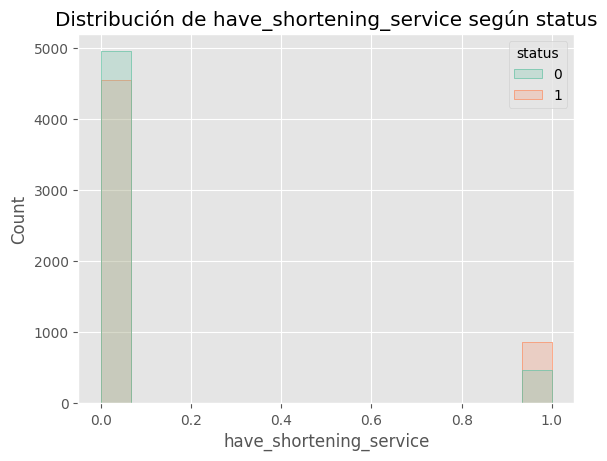

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                      0     1
have_shortening_service            
0                        4955  4559
1                         474   870

Coeficiente de Contingencia: 132.4895
p-value: 0.0000


In [329]:
binary_analysis(df_train, 'shortening_service', 'status', '!=', 0)

De momento la descartamos

### **path_extension**

path_extension podría referirse a la extensión o estructura del path (ruta) dentro de la URL, es decir, la parte de la URL que sigue al dominio principal. Esta sección puede contener información sobre páginas, archivos, o parámetros y a menudo es un indicador clave en los intentos de phishing.



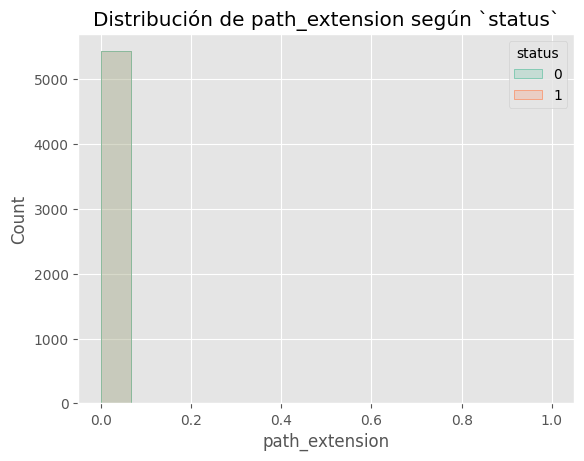

Matriz de Contingencia:


status             0     1
path_extension            
0               5428  5428
1                  1     1

In [330]:
analisis_contingencia(df_train, 'path_extension', 'status')

Descartar

In [331]:
df_train = df_train.drop(columns=['path_extension'], axis=1)

### **nb_redirection**

nb_redirection probablemente se refiere al número de redirecciones que ocurren cuando se accede a una URL. Esta variable indica cuántas veces el navegador es redirigido desde la URL original a otra(s) antes de cargar el contenido final.

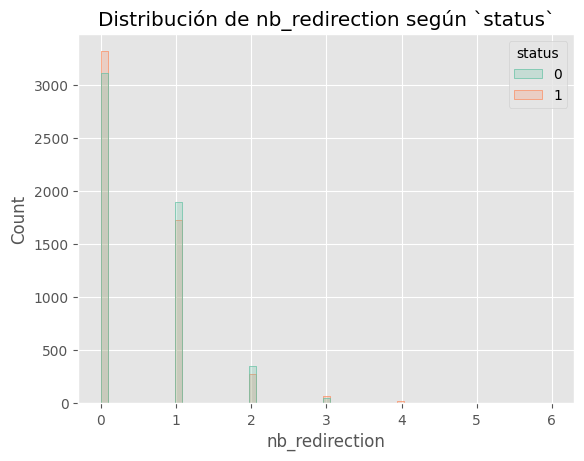

Matriz de Contingencia:


status             0     1
nb_redirection            
0               3121  3321
1               1898  1734
2                349   282
3                 49    68
4                  8    21
5                  4     2
6                  0     1

In [332]:
analisis_contingencia(df_train, 'nb_redirection', 'status')

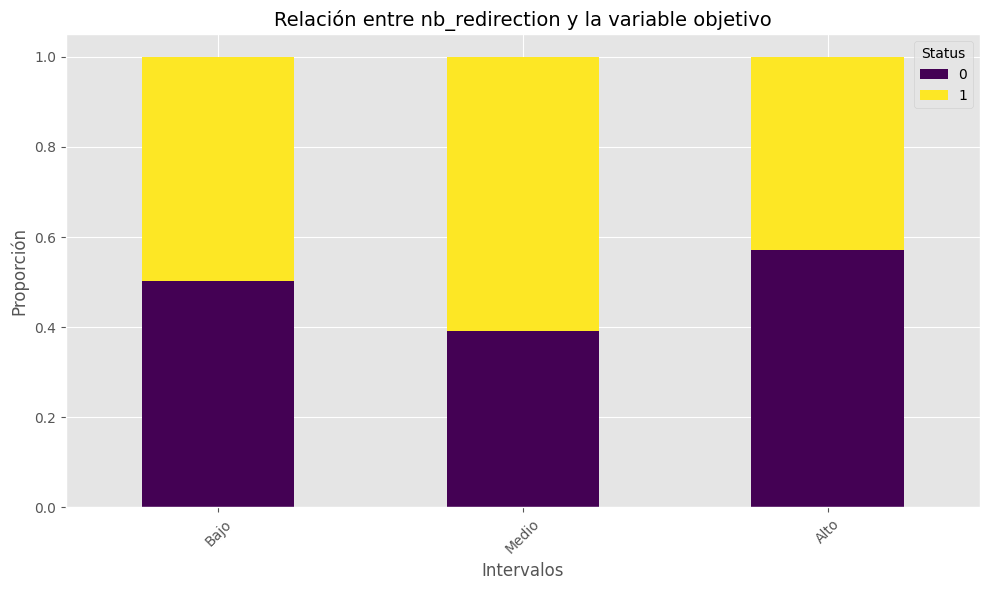

In [333]:
resultado = categorize_and_analyze(
    df_train, 
    column='nb_redirection', 
    target='status', 
    bins=3, 
    labels=['Bajo', 'Medio', 'Alto']
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("nb_redirection_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre nb_redirection y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

Relacion debil, muy repartidas. La descartamos

In [334]:
df_train = df_train.drop(columns=['nb_redirection'], axis=1)

### **nb_external_redirection**

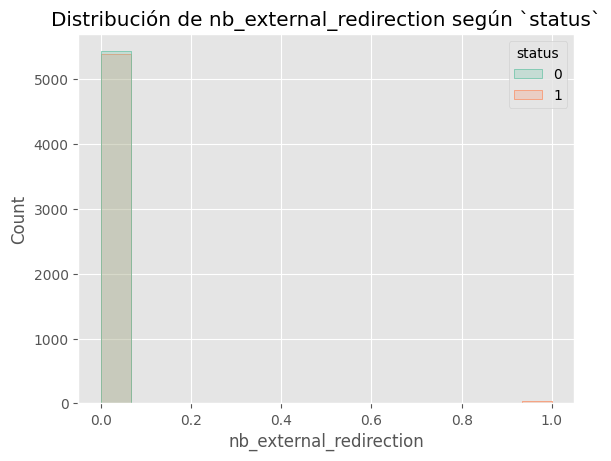

Matriz de Contingencia:


status                      0     1
nb_external_redirection            
0                        5429  5393
1                           0    36

In [335]:
analisis_contingencia(df_train, 'nb_external_redirection', 'status')

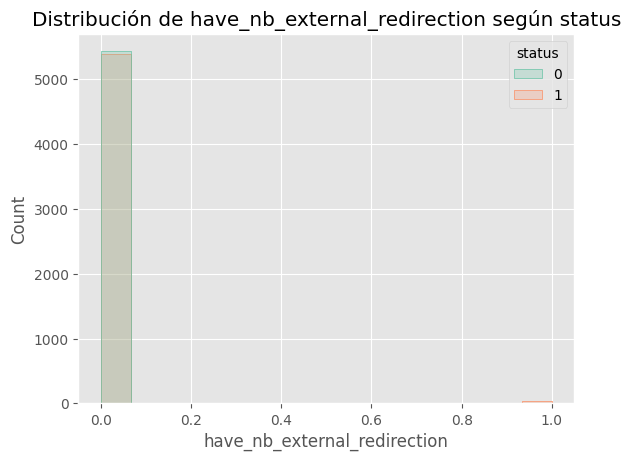

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                           0     1
have_nb_external_redirection            
0                             5429  5393
1                                0    36

Coeficiente de Contingencia: 34.1410
p-value: 0.0000


In [336]:
binary_analysis(df_train, 'nb_external_redirection', 'status', '!=', 0)

La añadimos a is_weird

In [337]:
is_weird.append('have_nb_external_redirection')

### **length_words_raw**

length_words_raw probablemente se refiere a la longitud total en palabras crudas del path (ruta) de la URL. Esto implica contar el número total de palabras que aparecen en el path de la URL, considerando que estas palabras están separadas por caracteres como /, -, _, o cualquier delimitador utilizado en la construcción de la URL.

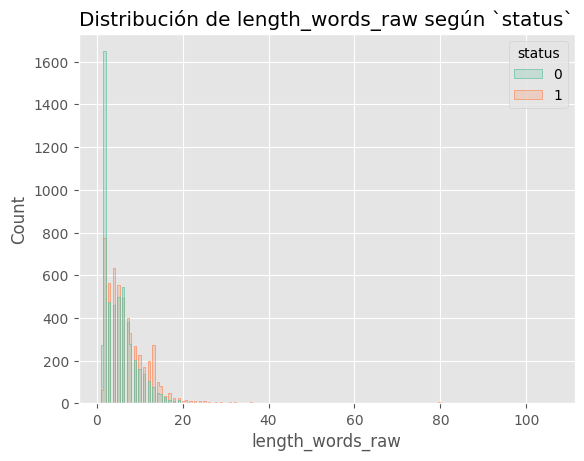

Matriz de Contingencia:


status               0    1
length_words_raw           
1                  276   64
2                 1648  775
3                  475  563
4                  461  636
5                  500  553
6                  543  495
7                  381  400
8                  279  330
9                  205  269
10                 160  228

In [338]:
analisis_contingencia(df_train, 'length_words_raw', 'status')

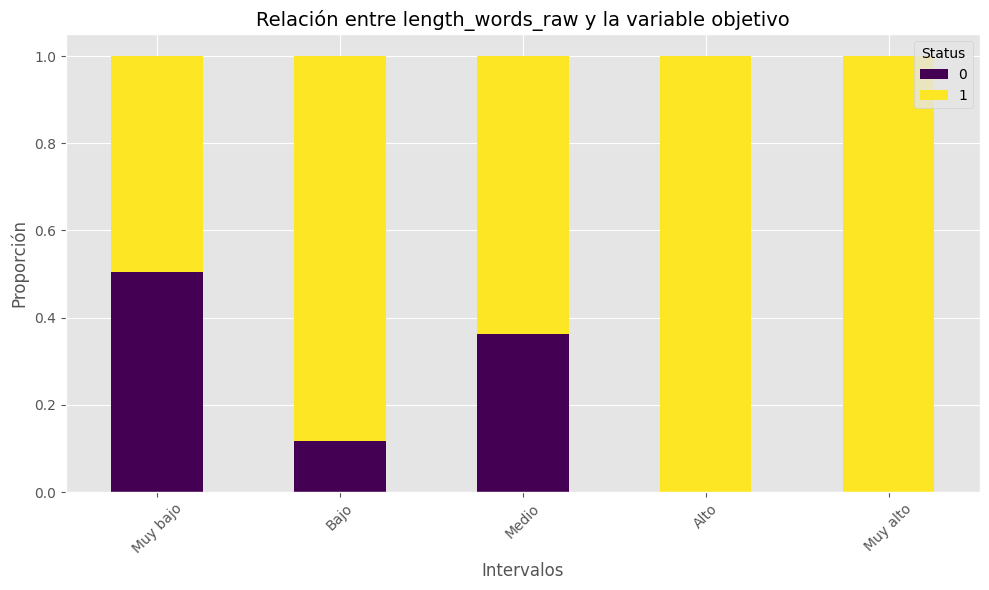

In [339]:
resultado = categorize_and_analyze(
    df_train, 
    column='length_words_raw', 
    target='status', 
    bins=5, 
    labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("length_words_raw_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre length_words_raw y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

la mantenemos dividida en 5, y además añadiremos aquellas altas o muy altas en is_weird

In [340]:
is_weird.append('have_length_words_raw')

### **char_repeat**

 la variable char_repeat probablemente se refiere al número de caracteres repetidos consecutivamente en una URL. Este tipo de característica es útil porque los ciberdelincuentes a menudo utilizan caracteres repetidos en URLs maliciosas como una técnica para evadir detección o imitar nombres legítimos.

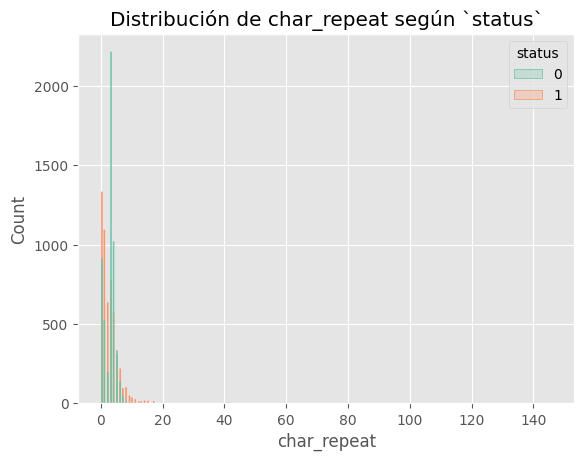

Matriz de Contingencia:


status          0     1
char_repeat            
0             913  1334
1             524  1094
2             197   636
3            2215   781
4            1021   575
5             336   312
6             140   221
7              51    98
8              14   104
9               6    51

In [341]:
analisis_contingencia(df_train, 'char_repeat', 'status')

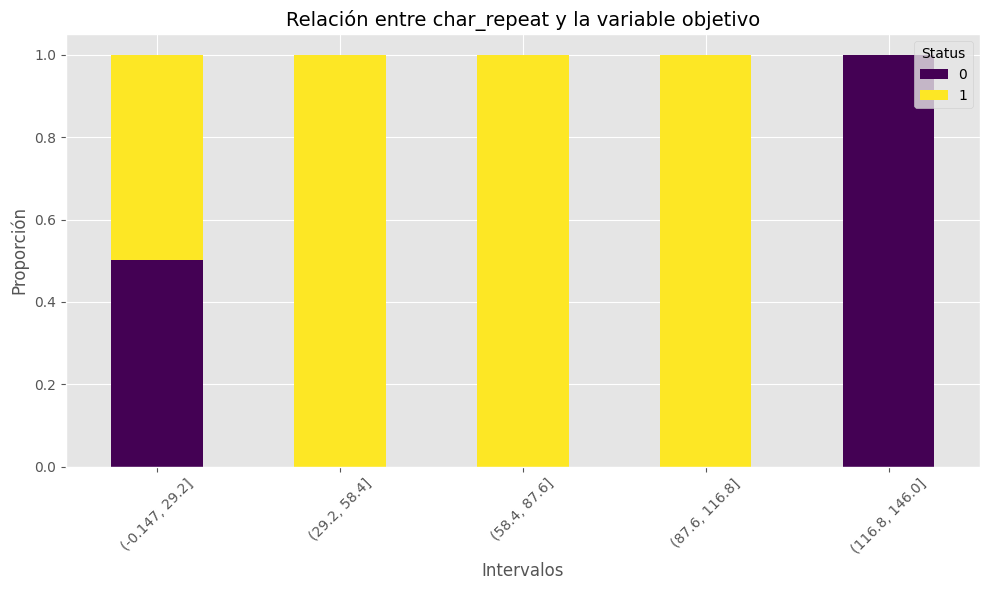

In [342]:
resultado = categorize_and_analyze(
    df_train, 
    column='char_repeat', 
    target='status', 
    bins=5
    #labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("char_repeat_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre char_repeat y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

Mantenemos en 5 grupos y añadimos char_Repeat entre 29.2 y 116.8 a is weird

In [343]:
is_weird.append('char_repeat')

### **shortest_words_raw**

shortest_words_raw probablemente se refiere a la longitud de la palabra más corta dentro del path de la URL. Esto indica el número mínimo de caracteres en las palabras que componen la ruta de la URL.

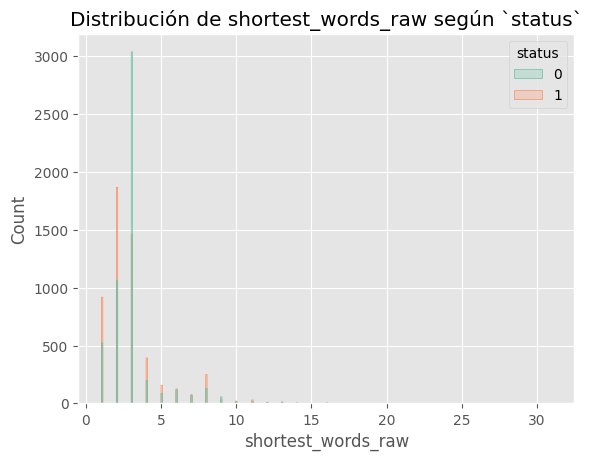

Matriz de Contingencia:


status                 0     1
shortest_words_raw            
1                    528   923
2                   1065  1873
3                   3043  1464
4                    201   397
5                     92   162
6                    120   130
7                     73    80
8                    134   254
9                     61    36
10                    19    25

In [344]:
analisis_contingencia(df_train, 'shortest_words_raw', 'status')

In [345]:
# Ver correlacion de shortest_words_raw

df_train['shortest_words_raw'].corr(df_train['status'])

-0.03655465817176888

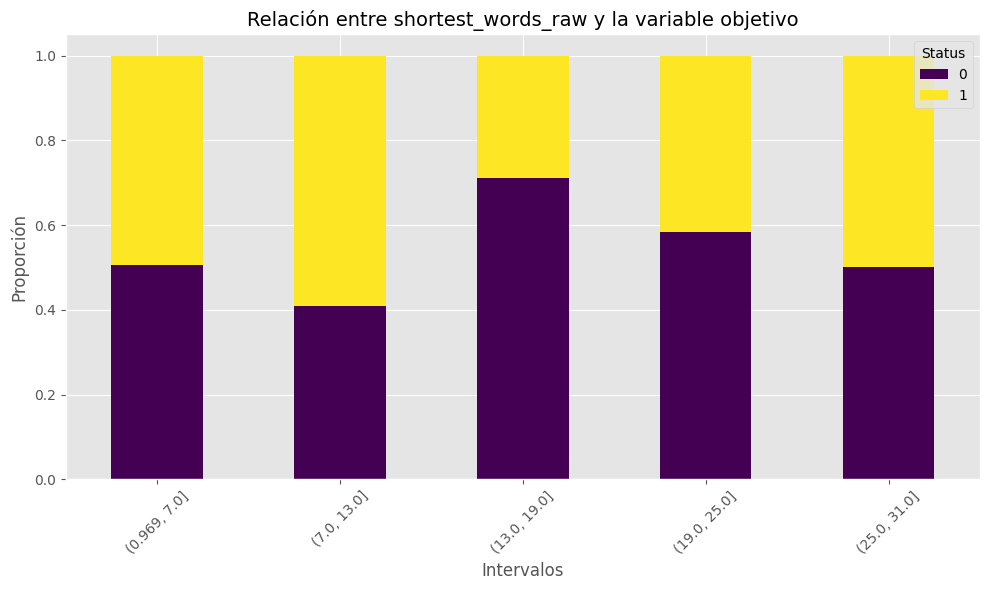

In [346]:
resultado = categorize_and_analyze(
    df_train, 
    column='shortest_words_raw', 
    target='status', 
    bins=5
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("shortest_words_raw_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre shortest_words_raw y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

In [347]:
analizar_relacion(df_train, 'shortest_words_raw', 'status')

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)


'Las variables están relacionadas según Kruskal-Wallis, pero los supuestos de ANOVA no se cumplieron.'

Observamos que hay phishing en valores bajos de la variable, por lo que lo añadiremos en el modelado manual

In [348]:
df_train = df_train.drop(columns=['shortest_words_raw'], axis=1)

### **shortest_word_host**

shortest_word_host probablemente se refiere a la longitud de la palabra más corta en el host de la URL. Esto mide cuántos caracteres tiene la palabra más corta dentro del dominio principal o subdominio de la URL.

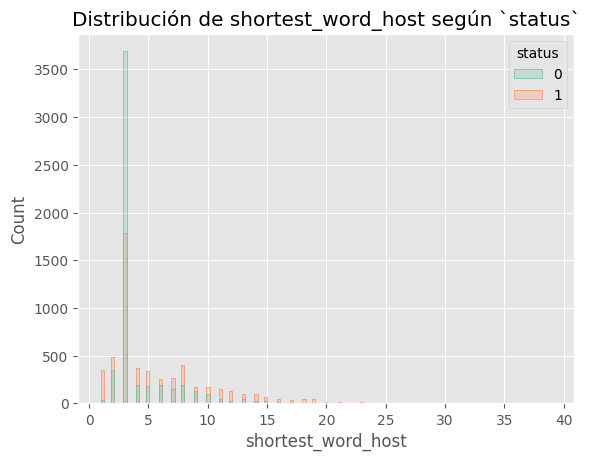

Matriz de Contingencia:


status                 0     1
shortest_word_host            
1                     38   347
2                    348   485
3                   3689  1786
4                    193   376
5                    180   341
6                    189   260
7                    147   269
8                    193   407
9                    133   176
10                    95   177

In [349]:
analisis_contingencia(df_train, 'shortest_word_host', 'status')

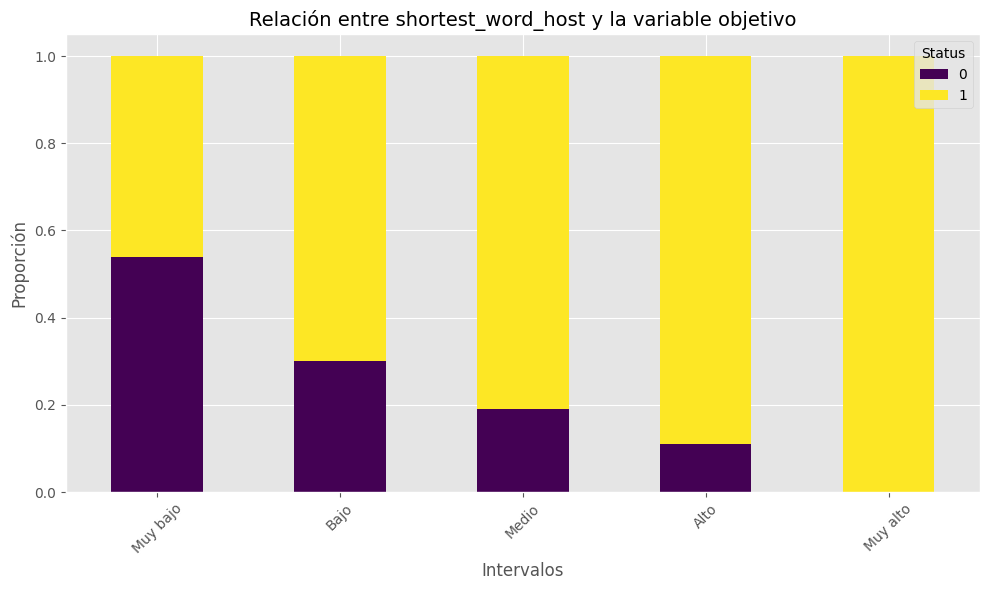

In [350]:
resultado = categorize_and_analyze(
    df_train, 
    column='shortest_word_host', 
    target='status', 
    bins=5,
    labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("shortest_word_host_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre shortest_word_host y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

Mantenemos la variable, y añadimos Muy alto a is_weird

In [351]:
is_weird.append('shortest_word_host')

### **shortest_word_path**

shortest_word_host probablemente se refiere a la longitud de la palabra más corta en el host de la URL. Esto mide cuántos caracteres tiene la palabra más corta dentro del dominio principal o subdominio de la URL.

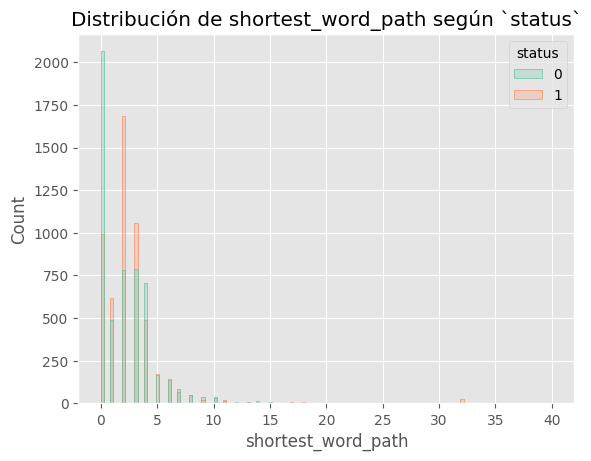

Matriz de Contingencia:


status                 0     1
shortest_word_path            
0                   2063   993
1                    492   618
2                    780  1685
3                    787  1057
4                    707   492
5                    169   172
6                    145   139
7                     86    67
8                     51    50
9                     39    21

In [352]:
analisis_contingencia(df_train, 'shortest_word_path', 'status')

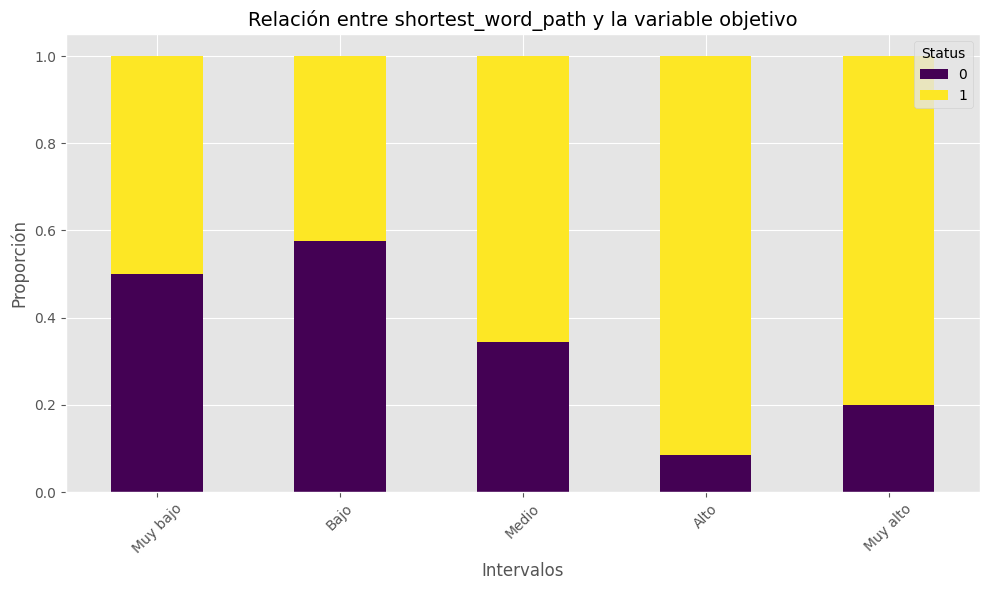

In [353]:
resultado = categorize_and_analyze(
    df_train, 
    column='shortest_word_path', 
    target='status', 
    bins=5,
    labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("shortest_word_path_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre shortest_word_path y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

Mantenemos la variable

### **longest_words_raw**

longest_words_raw se refiere a la longitud de la palabra más larga en el path (ruta) de la URL. Esto mide el número de caracteres de la palabra más extensa encontrada en el path.

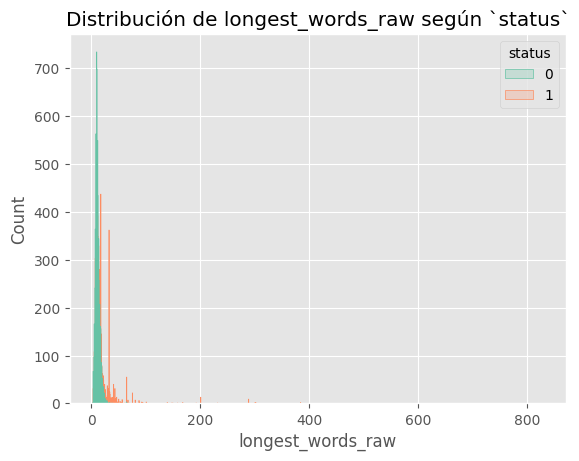

Matriz de Contingencia:


status               0    1
longest_words_raw          
2                    3    2
3                   68   32
4                   98   33
5                  167  109
6                  242  157
7                  365  304
8                  564  345
9                  735  374
10                 699  372
11                 550  393

In [354]:
analisis_contingencia(df_train, 'longest_words_raw', 'status')

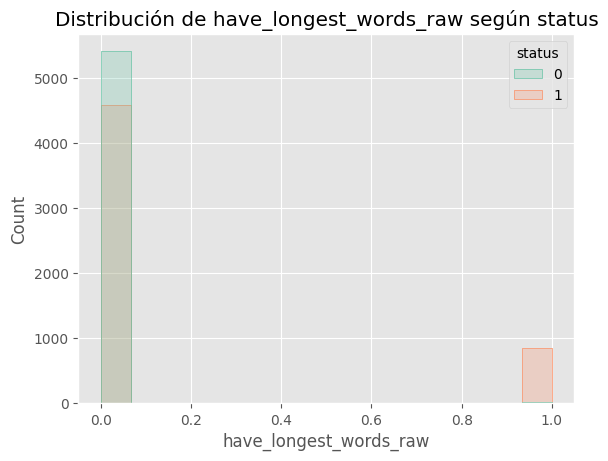

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                     0     1
have_longest_words_raw            
0                       5410  4582
1                         19   847

Coeficiente de Contingencia: 858.2040
p-value: 0.0000


In [355]:
binary_analysis(df_train, 'longest_words_raw', 'status', '>', 30)

palabras mayor a 30 caracteres se consideran inusuales, y vemos que existe esta relacion. Mantenemos como binaria y añadimos == 1 a is_weird

## **Length_url**

La variable length_url se refiere a la longitud total de la URL en caracteres. Es una métrica común en análisis de phishing porque las URLs maliciosas tienden a ser más largas que las legítimas.

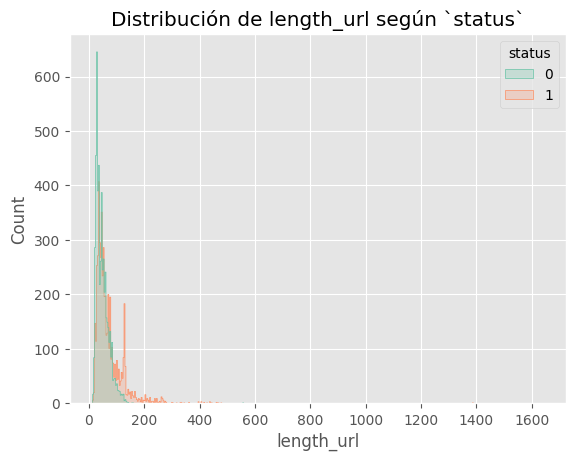

Matriz de Contingencia:


status       0   1
length_url        
12           1   0
13           4   0
14           2   0
15          11   7
16          15   4
17          31   5
18          39  12
19          48  32
20          54  29
21          81  46

In [356]:
analisis_contingencia(df_train, 'length_url', 'status')


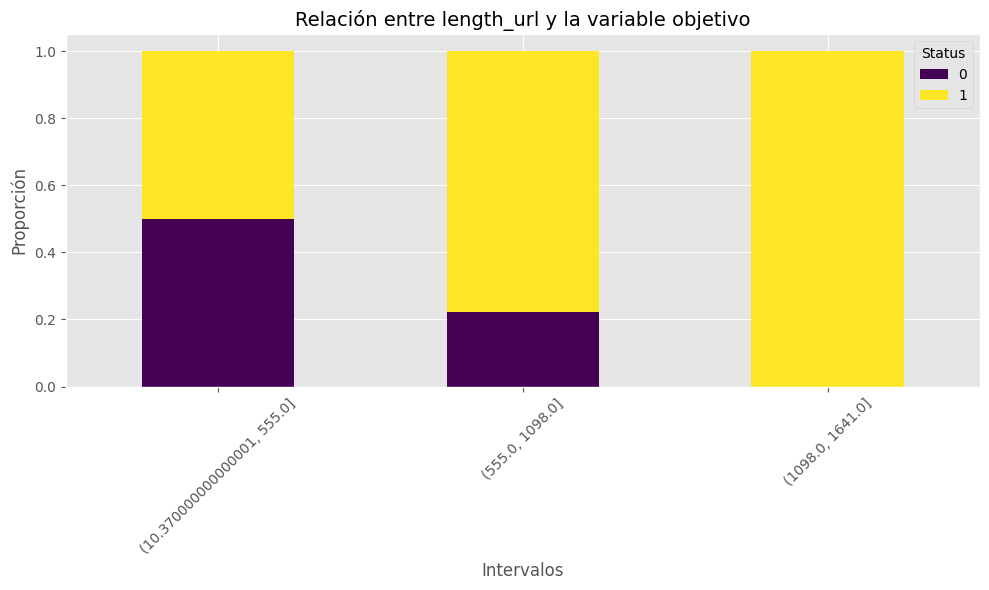

In [357]:
resultado = categorize_and_analyze(
    df_train, 
    column='length_url', 
    target='status', 
    bins=3
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("length_url_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre length_url y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

Añadimos length superior a 1098 a is_weird

In [358]:
is_weird.append('length_url')

### **Length_hostname**

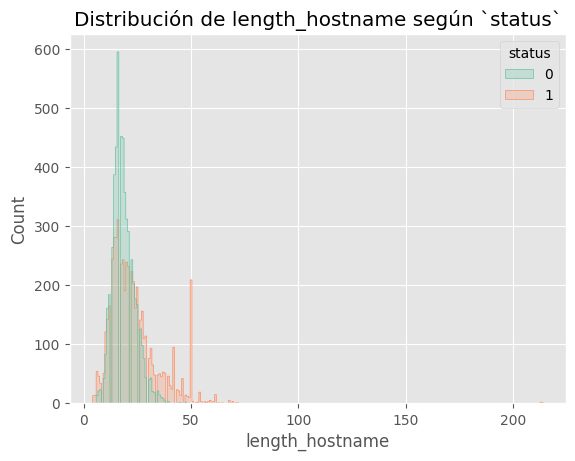

Matriz de Contingencia:


status             0    1
length_hostname          
4                  0   14
5                  1   14
6                 14   55
7                 22   47
8                 24   35
9                 43   52
10                84  122
11               162  143
12               185  166
13               265  245

In [359]:
analisis_contingencia(df_train, 'length_hostname', 'status')

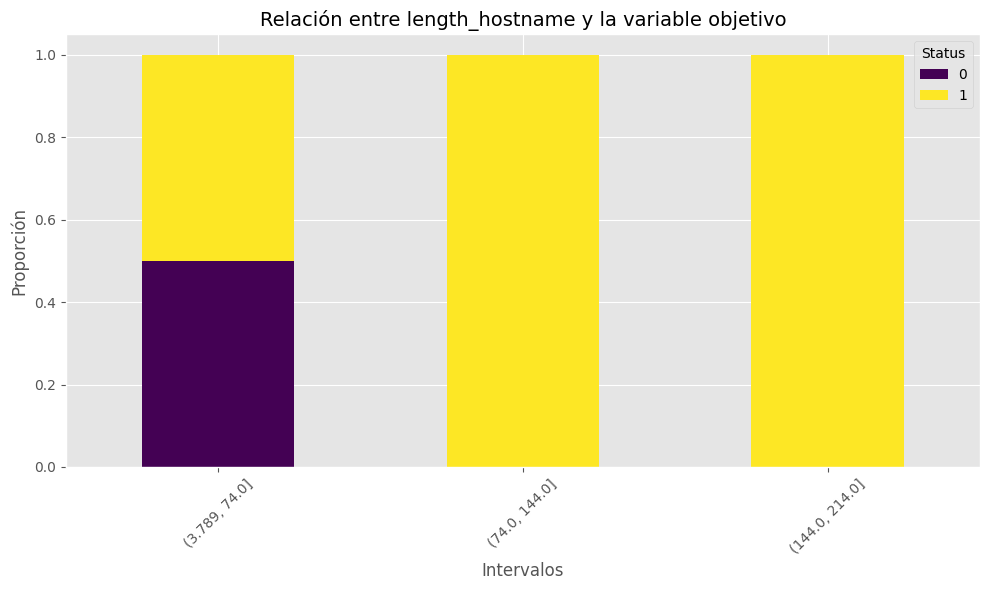

In [360]:
resultado = categorize_and_analyze(
    df_train, 
    column='length_hostname', 
    target='status', 
    bins=3
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("length_hostname_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre length_hostname y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

Añadimos length_hostname superior a 74 a is_weird

In [361]:
is_weird.append('length_hostname')

### **ip**

Se refiere a si el path contiene una IP

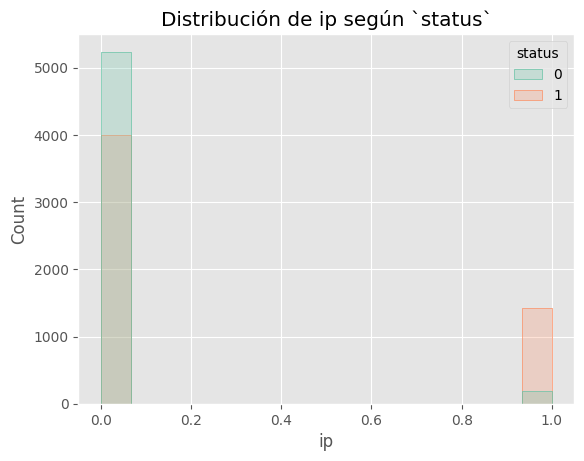

Matriz de Contingencia:


status     0     1
ip                
0       5237  4001
1        192  1428

In [362]:
analisis_contingencia(df_train, 'ip', 'status')

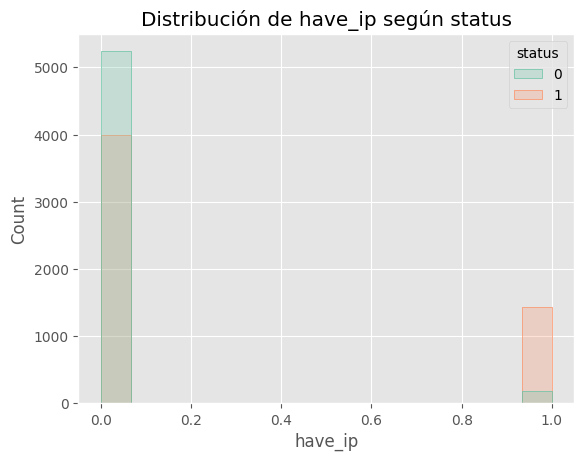

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status      0     1
have_ip            
0        5237  4001
1         192  1428

Coeficiente de Contingencia: 1106.6003
p-value: 0.0000


In [363]:
binary_analysis(df_train, 'ip', 'status', '!=', 0)

Mantener, mucha fuerza, añadimos have_ip == 1 a is_weird

In [364]:
is_weird.append('have_ip')

### **nb_dots**

En un dataset de phishing, la variable nb_dots se refiere al número de puntos (.) presentes en la URL. Es una métrica relevante porque las URLs maliciosas suelen tener más puntos que las legítimas debido al uso de múltiples subdominios o estructuras complejas para enmascarar la URL real.

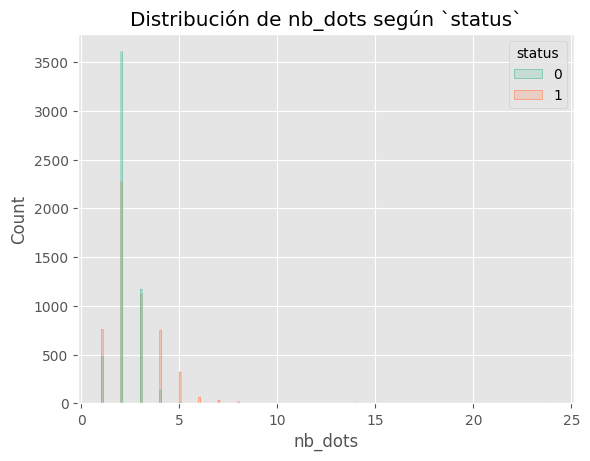

Matriz de Contingencia:


status      0     1
nb_dots            
1         482   762
2        3608  2278
3        1176  1126
4         140   756
5          15   326
6           3    70
7           5    38
8           0    21
9           0     7
10          0     5

In [365]:
analisis_contingencia(df_train, 'nb_dots', 'status')

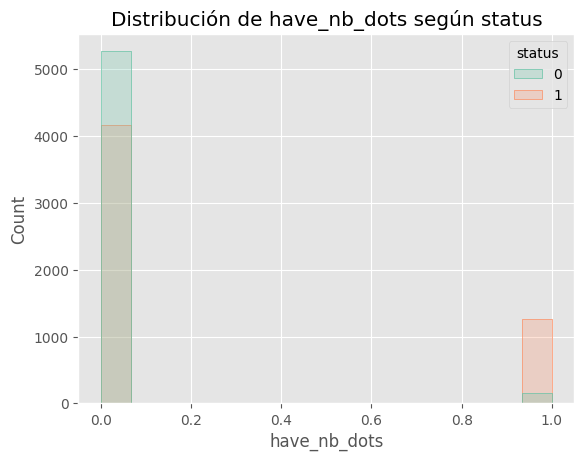

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status           0     1
have_nb_dots            
0             5266  4166
1              163  1263

Coeficiente de Contingencia: 975.0388
p-value: 0.0000


In [366]:
binary_analysis(df_train, 'nb_dots', 'status', '>', 3)

Lo normal es tener 2 puntos, en algunos casos es comun tener 3, pero mas de 3 es raro. Añadimos > 3 puntos a is_weird

In [367]:
is_weird.append('have_nb_dots')

### **nb_slash**

 nb_slash representa el número de barras inclinadas (/) en la URL. Esta métrica es importante porque las URLs de phishing tienden a incluir más barras para extender el path, confundir al usuario y ocultar el dominio real.

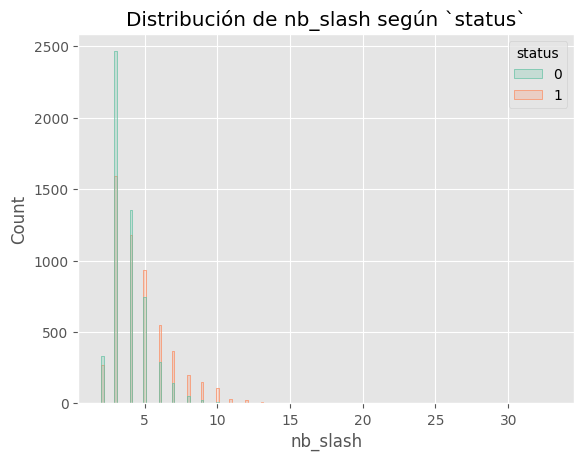

Matriz de Contingencia:


status       0     1
nb_slash            
2          332   271
3         2465  1593
4         1357  1177
5          746   935
6          290   549
7          144   369
8           53   199
9           23   147
10          12   106
11           3    31

In [368]:
analisis_contingencia(df_train, 'nb_slash', 'status')

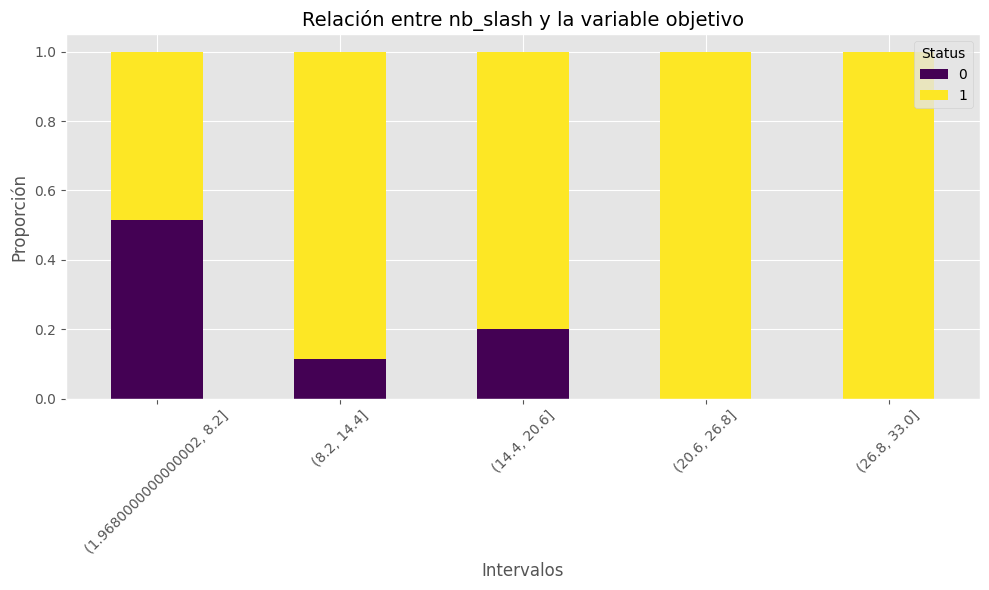

In [369]:
resultado = categorize_and_analyze(
    df_train, 
    column='nb_slash', 
    target='status', 
    bins=5
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("nb_slash_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre nb_slash y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

Mas de 20 barras es extraño, por lo que la añadimos a is_weird

In [370]:
is_weird.append('nb_slash')

### **longest_words_raw**

La variable longest_words_raw en un dataset de phishing se refiere a la longitud de la palabra más larga encontrada en el path (ruta) de la URL. Es una métrica relevante porque las URLs de phishing a menudo tienen palabras extremadamente largas en sus paths para parecer técnicas, legítimas o confundir al usuario.

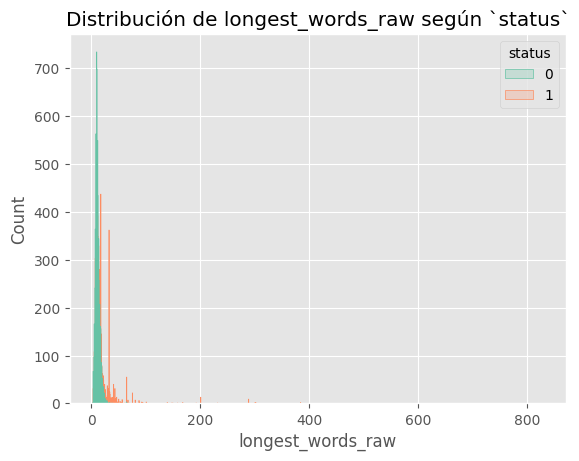

Matriz de Contingencia:


status               0    1
longest_words_raw          
2                    3    2
3                   68   32
4                   98   33
5                  167  109
6                  242  157
7                  365  304
8                  564  345
9                  735  374
10                 699  372
11                 550  393

In [371]:
analisis_contingencia(df_train, 'longest_words_raw', 'status')

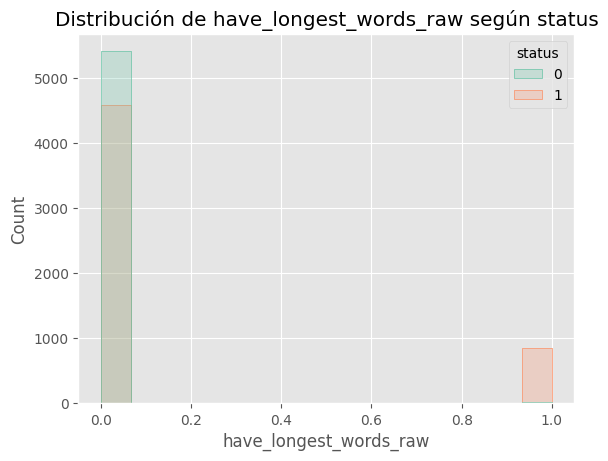

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                     0     1
have_longest_words_raw            
0                       5410  4582
1                         19   847

Coeficiente de Contingencia: 858.2040
p-value: 0.0000


In [372]:
binary_analysis(df_train, 'longest_words_raw', 'status', '>', 30)

Mas de 30 son valores extraños, por lo que los añadiremos a is_weird

In [373]:
is_weird.append('have_longest_words_raw')

### **longest_word_host**

La variable longest_word_host en un dataset de phishing se refiere a la longitud de la palabra más larga en el host de la URL. El host es la parte de la URL que incluye el dominio principal y los subdominios, pero excluye el path y los parámetros.

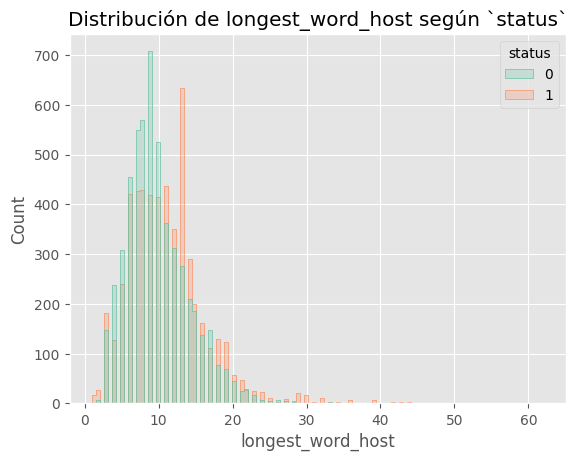

Matriz de Contingencia:


status               0    1
longest_word_host          
1                    0   16
2                    7   27
3                  147  181
4                  237  128
5                  309  240
6                  454  420
7                  549  427
8                  570  429
9                  707  418
10                 526  414

In [374]:
analisis_contingencia(df_train, 'longest_word_host', 'status')

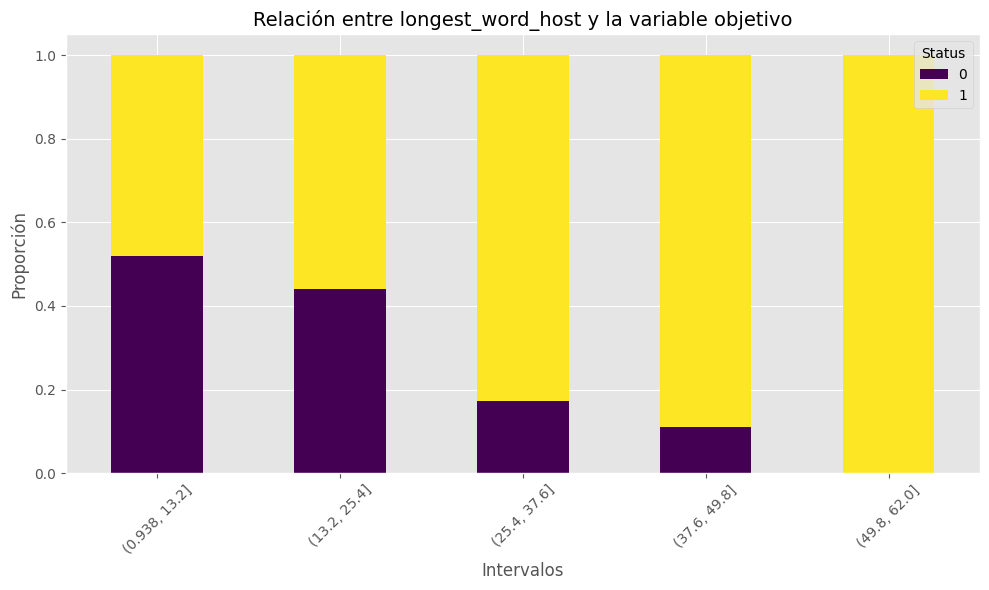

In [375]:
resultado = categorize_and_analyze(
    df_train, 
    column='longest_word_host', 
    target='status', 
    bins=5
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("longest_word_host_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre longest_word_host y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

Mantenemos la variable dividida en 5, y a partir de 49.8 lo añadimos a is_weird

In [376]:
is_weird.append('longest_word_host')

### **longest_word_path**

longest_word_path en un dataset de phishing se refiere a la longitud de la palabra más larga encontrada en el path (ruta) de la URL. Es una métrica relevante porque las URLs de phishing tienden a tener palabras extremadamente largas en sus paths para confundir a los usuarios o para parecer más técnicas y legítimas.

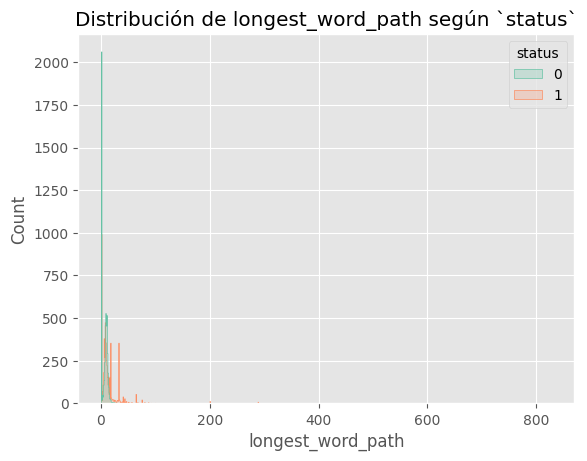

Matriz de Contingencia:


status                0    1
longest_word_path           
0                  2063  993
1                    22   19
2                    51   74
3                    40  111
4                   110  184
5                   137  382
6                   244  271
7                   459  476
8                   530  358
9                   456  255

In [377]:
analisis_contingencia(df_train, 'longest_word_path', 'status')

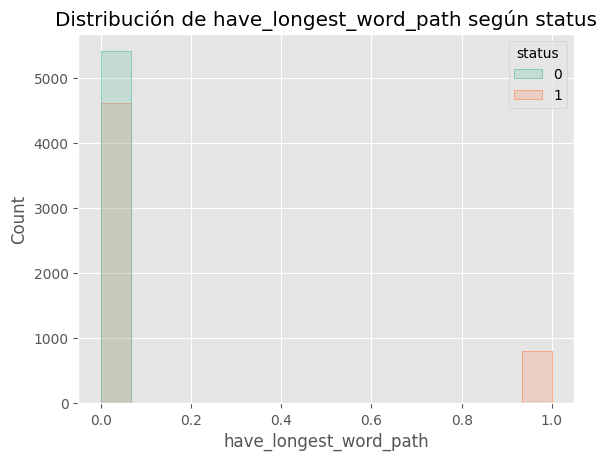

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                     0     1
have_longest_word_path            
0                       5415  4621
1                         14   808

Coeficiente de Contingencia: 827.6824
p-value: 0.0000


In [378]:
binary_analysis(df_train, 'longest_word_path', 'status', '>', 30)

Añadimos las mayores de 30 a is_weird

### **avg_words_raw**

se refiere a la longitud promedio de las palabras en el path (ruta) de la URL. Es una métrica que evalúa cuántos caracteres tiene, en promedio, cada palabra encontrada en el path.



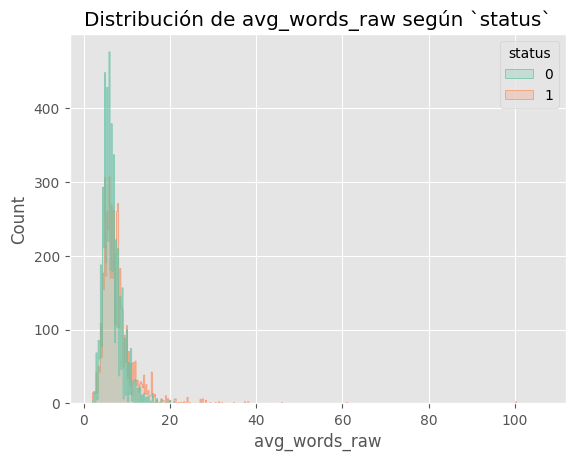

Matriz de Contingencia:


status         0   1
avg_words_raw       
2.000          4  10
2.143          0   1
2.235          0   1
2.250          0   3
2.263          1   0
2.293          1   0
2.300          0   1
2.333          2   0
2.375          0   1
2.429          0   3

In [379]:
analisis_contingencia(df_train, 'avg_words_raw', 'status')

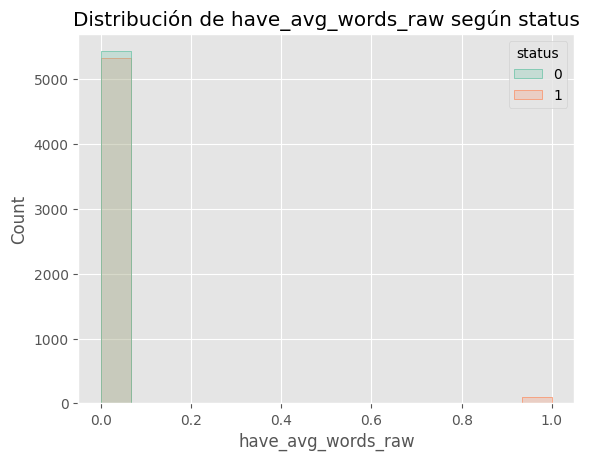

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                 0     1
have_avg_words_raw            
0                   5423  5326
1                      6   103

Coeficiente de Contingencia: 85.4078
p-value: 0.0000


In [380]:
binary_analysis(df_train, 'avg_words_raw', 'status', '>', 20)

Añadimos las mayores de 20 a is_weird

In [381]:
is_weird.append('avg_words_raw')

### **avg_word_host**

 se refiere a la longitud promedio de las palabras en el host de la URL. Esto mide cuántos caracteres tiene, en promedio, cada palabra dentro del dominio principal y los subdominios.

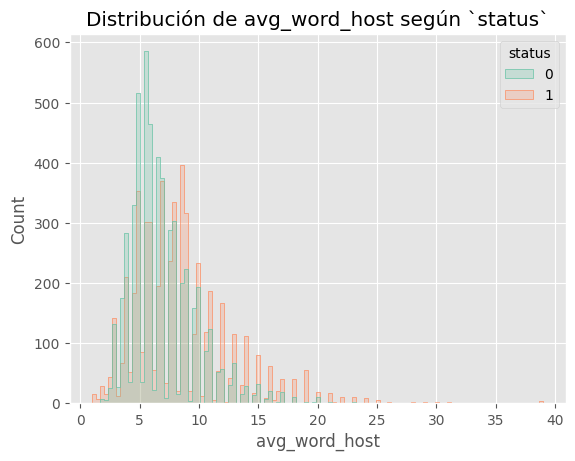

Matriz de Contingencia:


status          0   1
avg_word_host        
1.000           0  16
1.500           0   1
1.667           0   7
1.750           0   1
2.000           8  28
2.250           0  16
2.333           5   0
2.500          17  42
2.600           0   1
2.667           9   1

In [382]:
analisis_contingencia(df_train, 'avg_word_host', 'status')

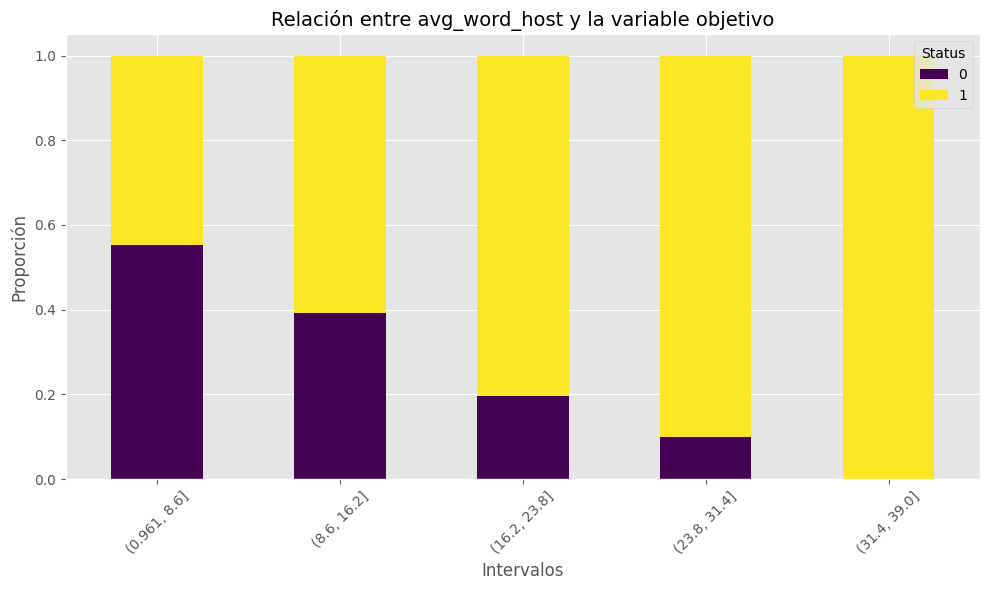

In [383]:
resultado = categorize_and_analyze(
    df_train, 
    column='avg_word_host', 
    target='status', 
    bins=5
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("avg_word_host_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre avg_word_host y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

Mantenemos dividida en 5 y añadimos las mayores de 31 a is weird

In [384]:
is_weird.append('avg_words_host')

### **avg_word_path**

Se refiere a la longitud promedio de las palabras en el path (ruta) de la URL. Esto mide cuántos caracteres tiene, en promedio, cada palabra dentro del path de la URL.

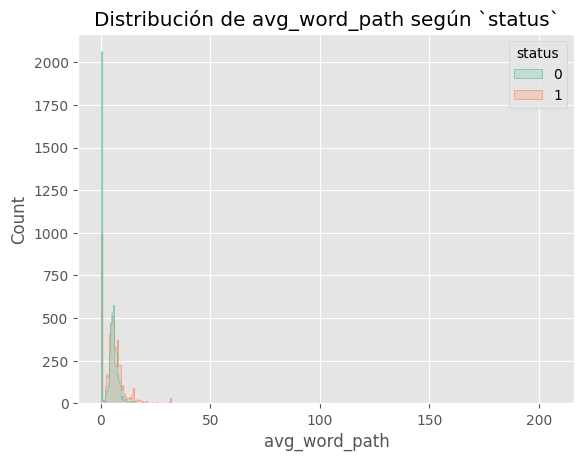

Matriz de Contingencia:


status            0    1
avg_word_path           
0.000          2063  993
1.000            22   19
1.500             0    3
1.667             2    0
2.000            53   82
2.051             1    0
2.111             1    0
2.167             0    1
2.236             0    1
2.250             1    3

In [385]:
analisis_contingencia(df_train, 'avg_word_path', 'status')

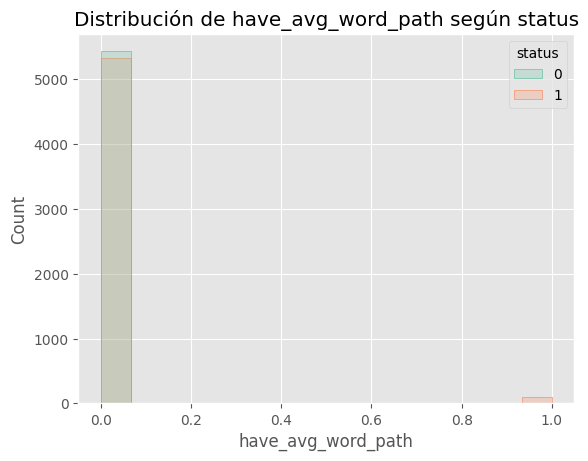

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                 0     1
have_avg_word_path            
0                   5428  5334
1                      1    95

Coeficiente de Contingencia: 90.8974
p-value: 0.0000


In [386]:
binary_analysis(df_train, 'avg_word_path', 'status', '>', 30)

Añadimos las mayores de 30 a is_weird

### **phish_hints**

se refiere a la presencia de palabras clave sospechosas en la URL, que podrían indicar una intención maliciosa. Estas palabras clave, también conocidas como "hints" o "indicadores", son términos que los atacantes incluyen en las URLs para persuadir al usuario de que realice una acción específica (como iniciar sesión o proporcionar información confidencial).

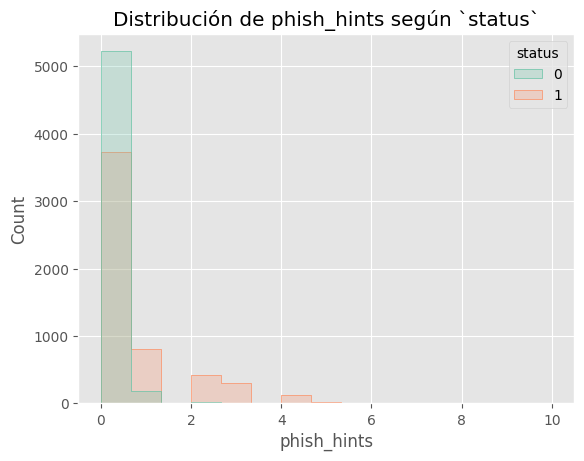

Matriz de Contingencia:


status          0     1
phish_hints            
0            5218  3734
1             183   814
2              24   416
3               4   299
4               0   128
5               0    26
6               0     8
7               0     2
10              0     2

In [387]:
analisis_contingencia(df_train, 'phish_hints', 'status')

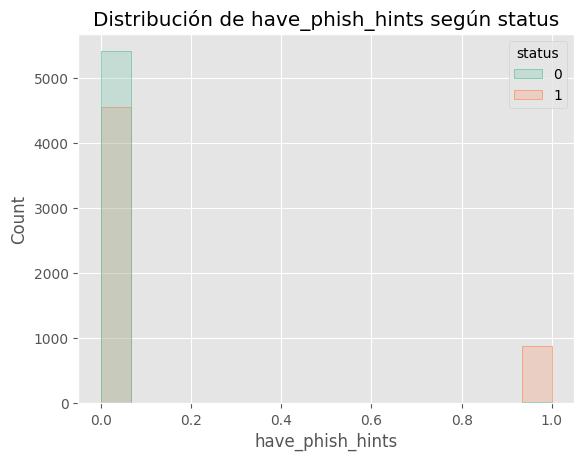

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status               0     1
have_phish_hints            
0                 5401  4548
1                   28   881

Coeficiente de Contingencia: 871.5368
p-value: 0.0000


In [388]:
binary_analysis(df_train, 'phish_hints', 'status', '>', 1)

Añadimos a is_weird aquellas con mas de una palabra marcada

In [389]:
is_weird.append('phish_hints')

### **domain_in_brand**

indica si el dominio de la URL incluye el nombre de una marca conocida. Este es un indicador importante, ya que los atacantes a menudo usan nombres de marcas populares en los dominios de phishing para engañar a los usuarios y parecer legítimos.

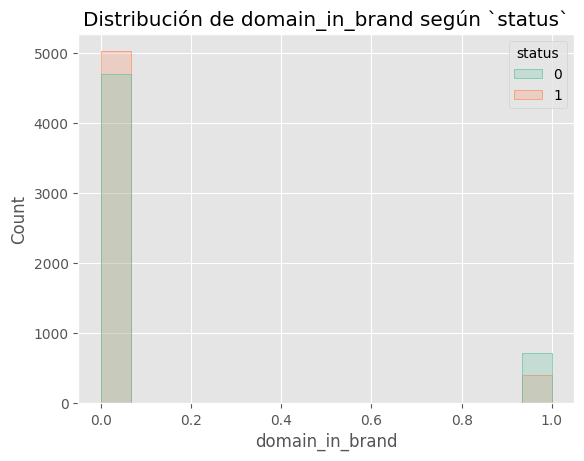

Matriz de Contingencia:


status              0     1
domain_in_brand            
0                4709  5025
1                 720   404

In [390]:
analisis_contingencia(df_train, 'domain_in_brand', 'status')

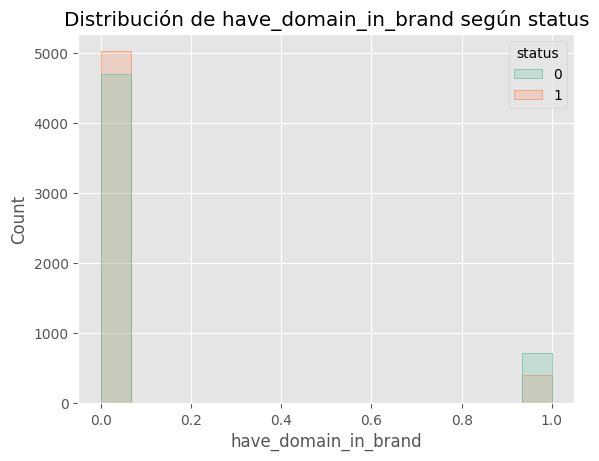

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                   0     1
have_domain_in_brand            
0                     4709  5025
1                      720   404

Coeficiente de Contingencia: 98.4721
p-value: 0.0000


In [391]:
binary_analysis(df_train, 'domain_in_brand', 'status', '!=', 0)

Muy repartida, la descartamos

### **brand_in_subdomain**

indica si el subdominio de la URL contiene el nombre de una marca conocida. Esto es relevante porque los atacantes suelen colocar nombres de marcas en los subdominios para engañar a los usuarios, haciendo que la URL parezca legítima.

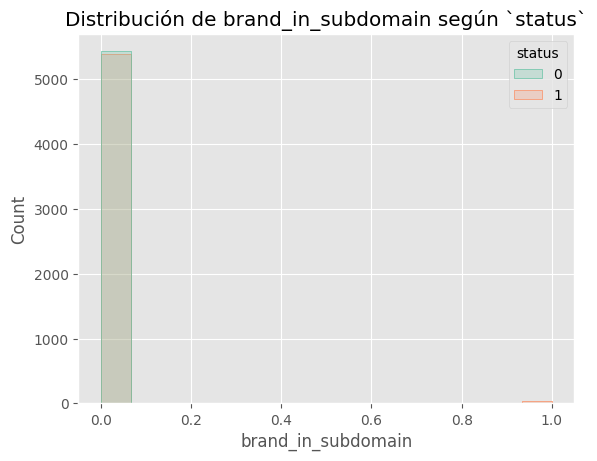

Matriz de Contingencia:


status                 0     1
brand_in_subdomain            
0                   5429  5385
1                      0    44

In [392]:
analisis_contingencia(df_train, 'brand_in_subdomain', 'status')

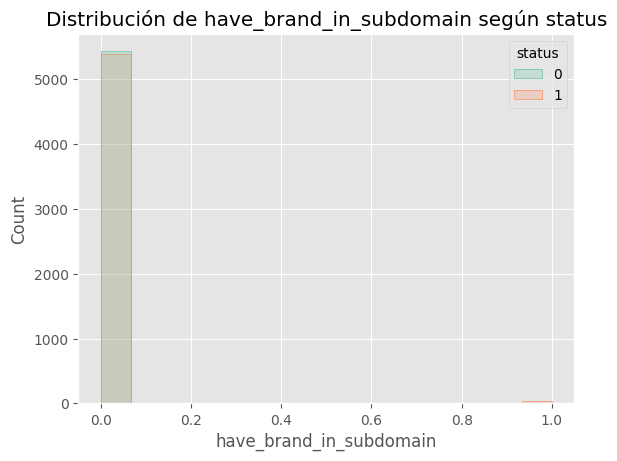

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                      0     1
have_brand_in_subdomain            
0                        5429  5385
1                           0    44

Coeficiente de Contingencia: 42.1937
p-value: 0.0000


In [393]:
binary_analysis(df_train, 'brand_in_subdomain', 'status', '!=', 0)

Añadimos aquellas igual a 1, a is_weird

In [394]:
is_weird.append('have_brand_in_subdomain')

### **brand_in_path**

indica si el path (ruta) de la URL contiene el nombre de una marca conocida. Esta es una señal útil porque los atacantes a menudo colocan nombres de marcas populares en el path para que las URLs parezcan legítimas y engañar a los usuarios.

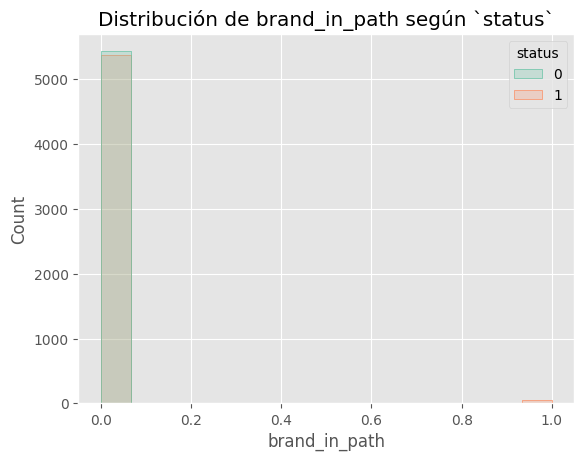

Matriz de Contingencia:


status            0     1
brand_in_path            
0              5427  5376
1                 2    53

In [395]:
analisis_contingencia(df_train, 'brand_in_path', 'status')

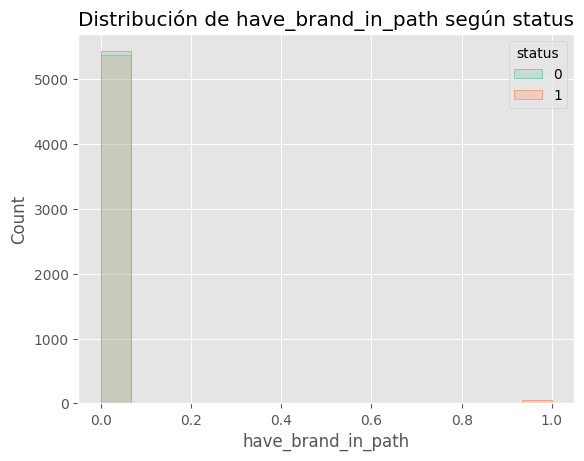

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                 0     1
have_brand_in_path            
0                   5427  5376
1                      2    53

Coeficiente de Contingencia: 45.6860
p-value: 0.0000


In [396]:
binary_analysis(df_train, 'brand_in_path', 'status', '!=', 0)

Añadimos have_brand_in_path a is_weird

In [397]:
is_weird.append('have_brand_in_path')

### **suspecious_tld**

se refiere a si el TLD (Top-Level Domain) de una URL es considerado sospechoso. El TLD es la parte de la URL que aparece al final del dominio principal, como .com, .net, .org, o extensiones menos comunes como .xyz, .info, .click, etc.

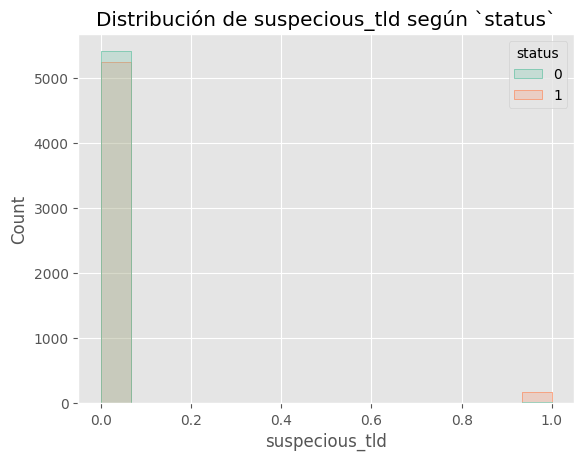

Matriz de Contingencia:


status             0     1
suspecious_tld            
0               5411  5248
1                 18   181

In [398]:
analisis_contingencia(df_train, 'suspecious_tld', 'status')

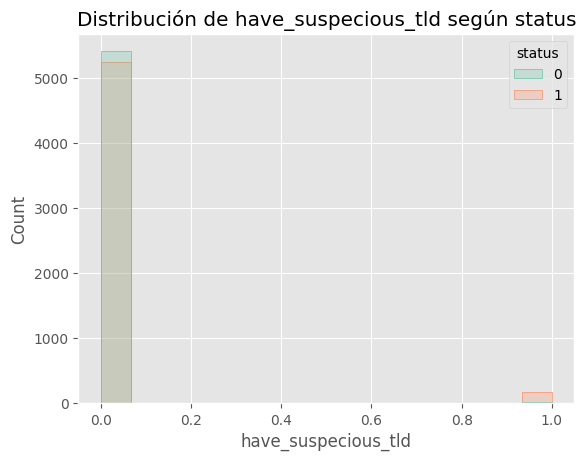

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                  0     1
have_suspecious_tld            
0                    5411  5248
1                      18   181

Coeficiente de Contingencia: 134.3415
p-value: 0.0000


In [399]:
binary_analysis(df_train, 'suspecious_tld', 'status', '!=', 0)

Añadimos aquellas con have_suspecious_tld = 1, a is_weird

In [400]:
is_weird.append('have_suspecious_tld')

### **statistical_report**

representa un indicador o una clasificación específica basada en características del análisis estadístico. Sin sospecha, sospechosa, muy sospechosa

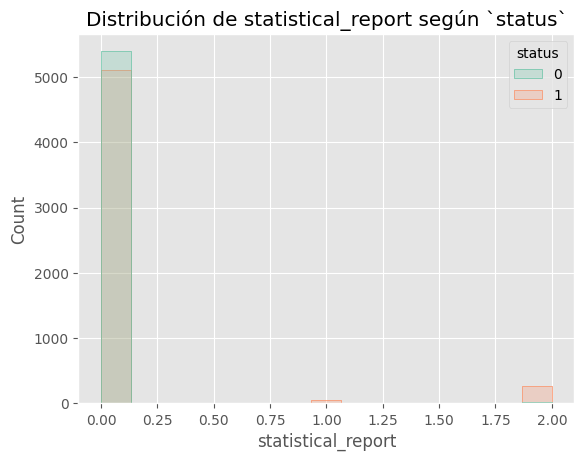

Matriz de Contingencia:


status                 0     1
statistical_report            
0                   5389  5110
1                     12    54
2                     28   265

In [401]:
analisis_contingencia(df_train, 'statistical_report', 'status')

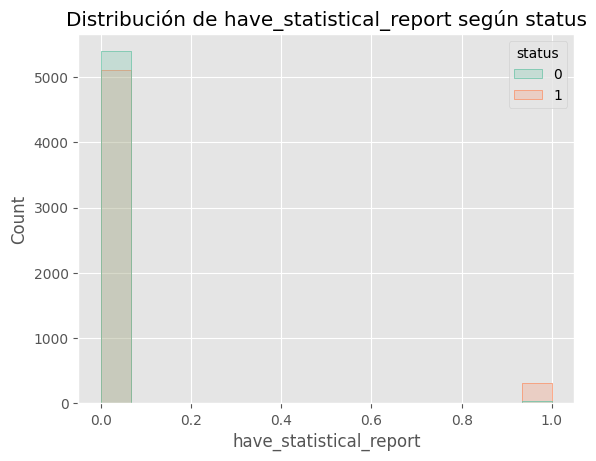

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                      0     1
have_statistical_report            
0                        5389  5110
1                          40   319

Coeficiente de Contingencia: 222.6368
p-value: 0.0000


In [402]:
binary_analysis(df_train, 'statistical_report', 'status', '!=', 0)

Añadimos statistical_report	= 1 y 2, a is_weird

In [403]:
is_weird.append('have_statistical_report')

### **nb_hyperlinks**

se refiere al número de hipervínculos presentes en el contenido de la URL o en el documento HTML al que apunta la URL. Esta métrica es útil en el análisis de phishing porque los sitios maliciosos tienden a usar diferentes estrategias con respecto a la cantidad de enlaces.

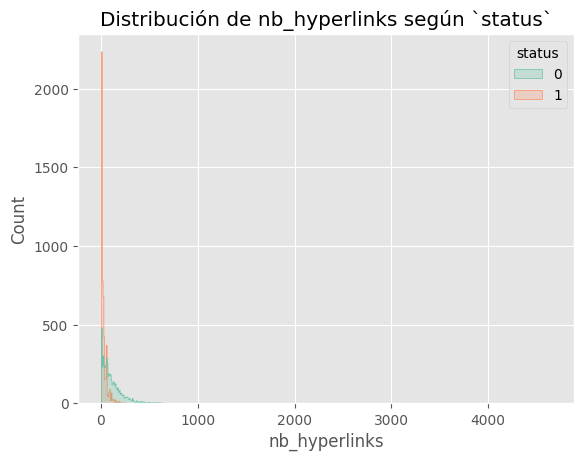

Matriz de Contingencia:


status           0     1
nb_hyperlinks           
0              300  1022
1               32   273
2               16    43
3               16    94
4               14   315
5               39    94
6               18   123
7               22   143
8               26   130
9               32    84

In [404]:
analisis_contingencia(df_train, 'nb_hyperlinks', 'status')  

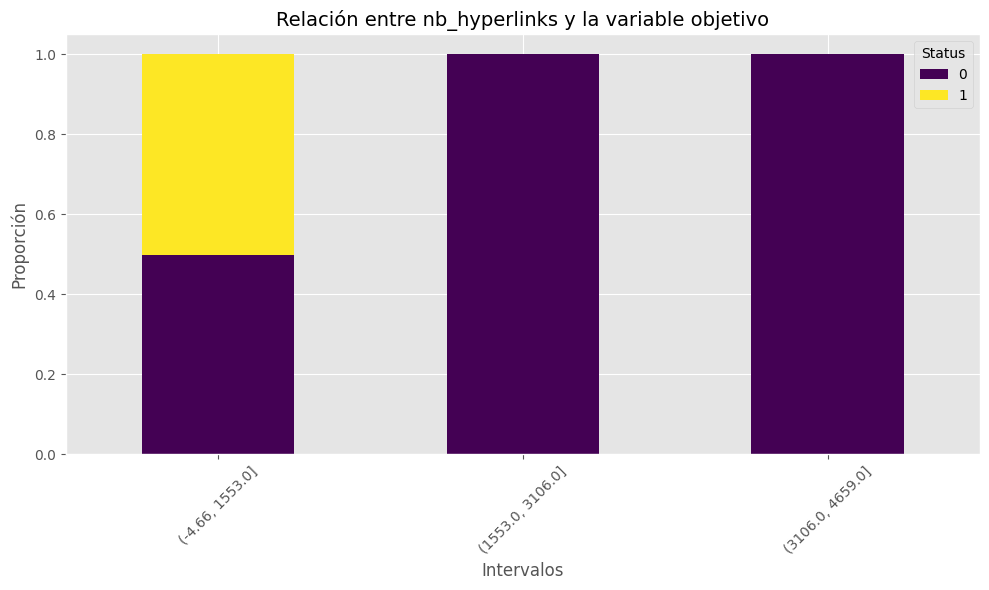

In [405]:
resultado = categorize_and_analyze(
    df_train, 
    column='nb_hyperlinks', 
    target='status', 
    bins=3
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("nb_hyperlinks_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre nb_hyperlinks y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

La mantenemos divida en 3, teniendo en cuenta que valores altos indican no phishing

### **ratio_intHyperlinks**

se refiere al porcentaje de hipervínculos internos en relación al número total de hipervínculos (nb_hyperlinks) presentes en el contenido asociado con la URL. Esta métrica es importante porque los sitios de phishing suelen tener patrones diferentes en el uso de enlaces internos y externos en comparación con sitios legítimos.

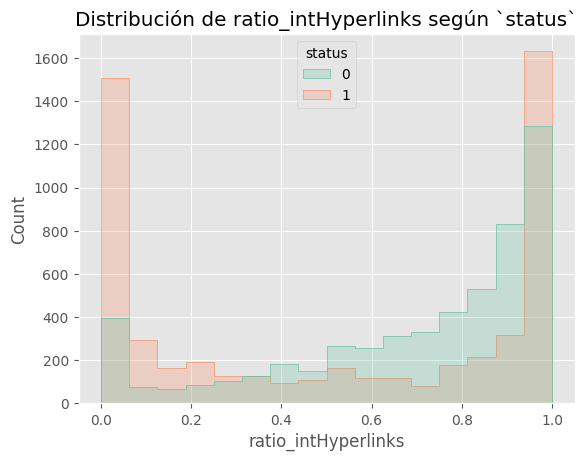

Matriz de Contingencia:


status                 0     1
ratio_intHyperlinks           
0.000                359  1434
0.009                  0     1
0.010                  1     0
0.012                  0     5
0.016                  0     1
0.016                  1     0
0.017                  1     0
0.017                  0     1
0.021                  1     0
0.021                  0     1

In [406]:
analisis_contingencia(df_train, 'ratio_intHyperlinks', 'status')

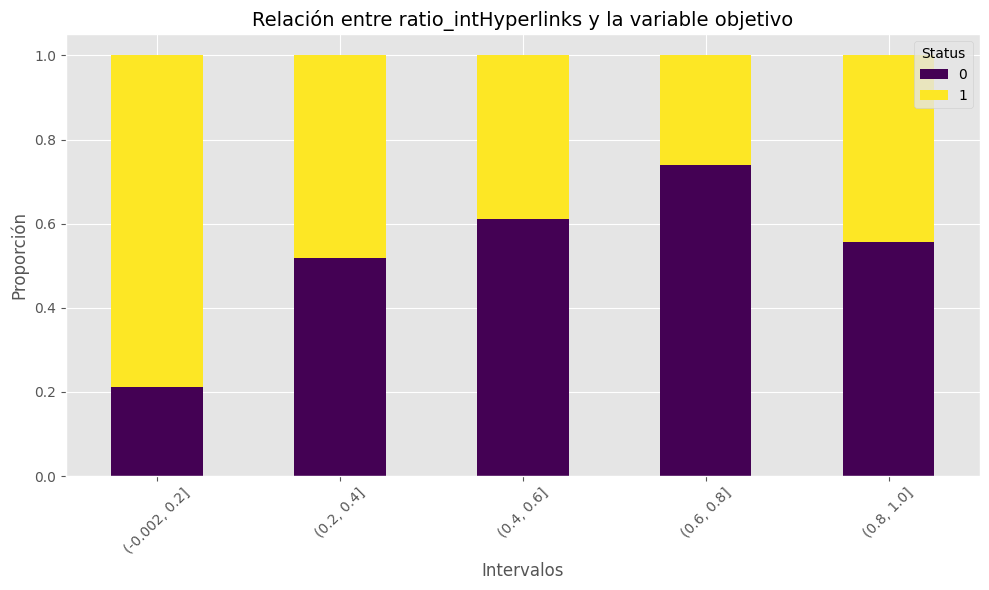

In [407]:
resultado = categorize_and_analyze(
    df_train, 
    column='ratio_intHyperlinks', 
    target='status', 
    bins=5
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("ratio_intHyperlinks_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre ratio_intHyperlinks y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

In [408]:
df_train = df_train.drop(columns=['ratio_intHyperlinks'], axis=1)

Demasiado repartida, en principio eliminar

### **ratio_extHyperlinks**

ratio_extHyperlinks: Proporción de enlaces externos respecto al total.

0: Todos internos (normal en legítimos).

1: Todos externos (sospechoso).

URLs de phishing suelen tener alto ratio (más externos).

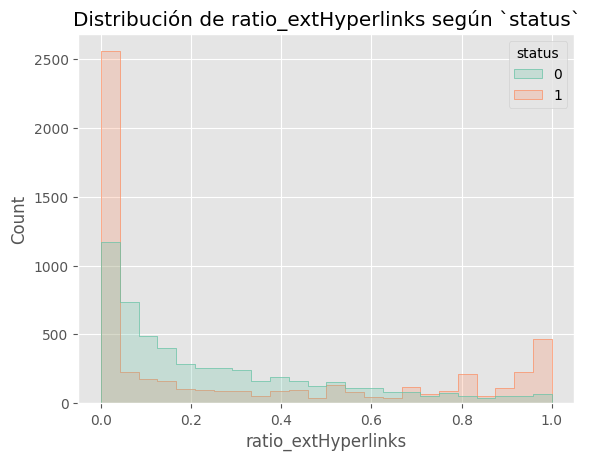

Matriz de Contingencia:


status                 0     1
ratio_extHyperlinks           
0.000                542  2391
0.001                  1     0
0.002                  1     0
0.002                  1     0
0.002                  1     0
0.003                  1     0
0.003                  1     0
0.003                  1     0
0.003                  1     0
0.003                  1     0

In [409]:
analisis_contingencia(df_train, 'ratio_extHyperlinks', 'status')

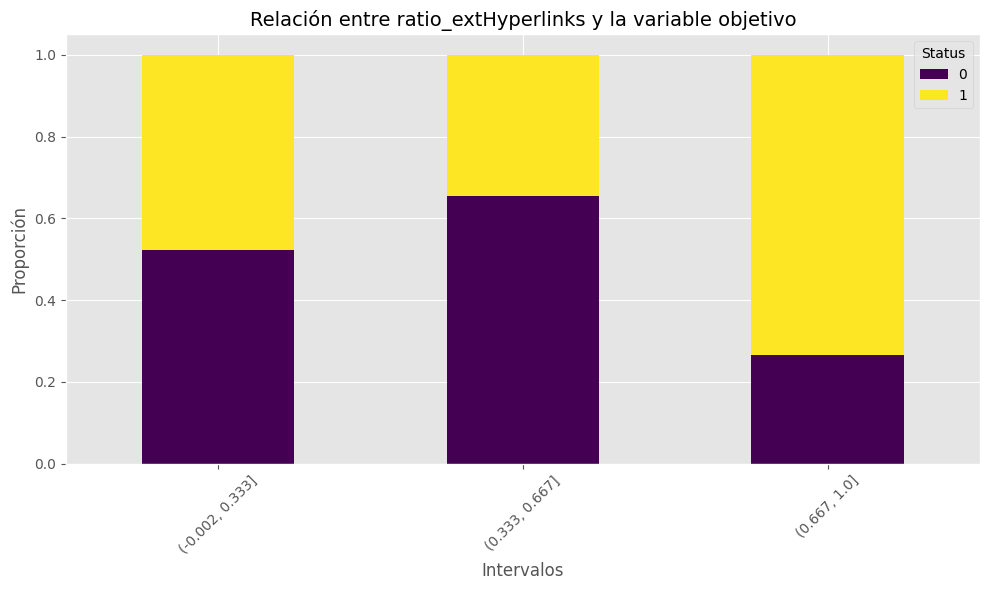

In [410]:
resultado = categorize_and_analyze(
    df_train, 
    column='ratio_extHyperlinks', 
    target='status', 
    bins=3
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("ratio_extHyperlinks_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre ratio_extHyperlinks y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

Muy repartida, en principio descartamos

### **ratio_nullHyperlinks**

ratio_nullHyperlinks: Proporción de enlaces vacíos (sin destino) respecto al total de hipervínculos.

0: Todos los enlaces tienen destino (normal).

1: Todos los enlaces están vacíos (muy sospechoso).

URLs de phishing pueden tener alto ratio para confundir o simular legitimidad.

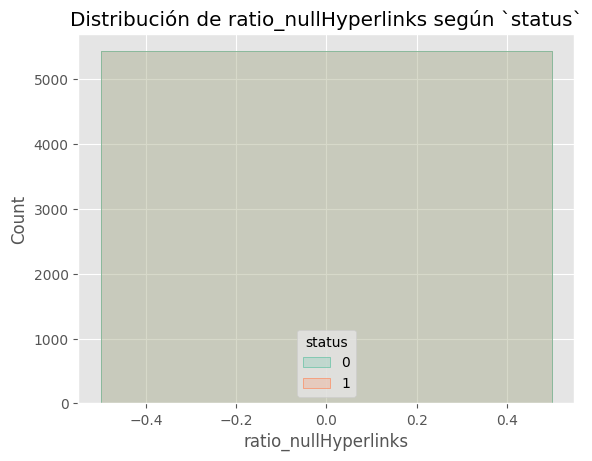

Matriz de Contingencia:


status                   0     1
ratio_nullHyperlinks            
0                     5429  5429

In [411]:
analisis_contingencia(df_train, 'ratio_nullHyperlinks', 'status')

Borramos la característica ya que es constante

In [412]:
df_train = df_train.drop(columns=['ratio_nullHyperlinks'], axis=1)

### **nb_extCSS**

nb_extCSS: Número de archivos CSS externos.

0-2: Potencialmente sospechoso (sitios maliciosos suelen usar pocos recursos para simplificar).

3-10: Rango típico en sitios legítimos simples.

11+: Normal en sitios avanzados y profesionales (menos sospechoso).

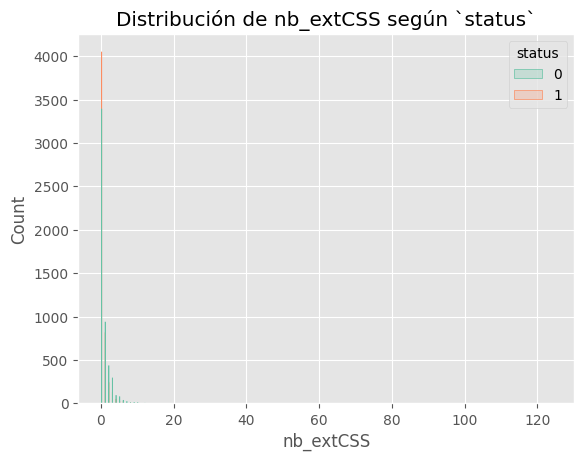

Matriz de Contingencia:


status        0     1
nb_extCSS            
0          3397  4054
1           944   821
2           441   246
3           300   136
4            99    55
5            84    29
6            42    27
7            28     5
8            15    13
9            18     8

In [413]:
analisis_contingencia(df_train, 'nb_extCSS', 'status')

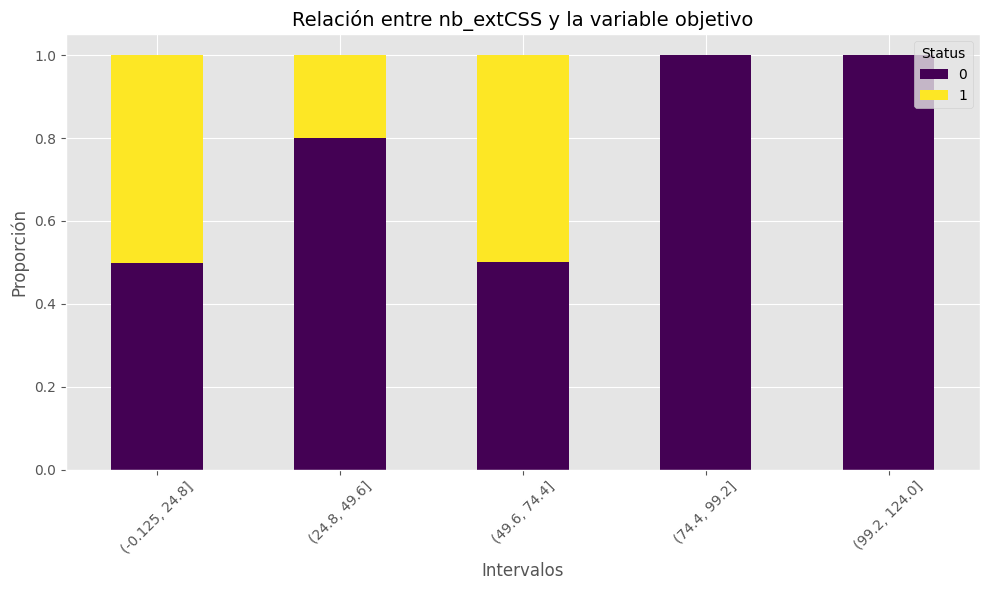

In [414]:
resultado = categorize_and_analyze(
    df_train, 
    column='nb_extCSS', 
    target='status', 
    bins=5
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("nb_extCSS_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre nb_extCSS y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

Demasiado repartida, descartamos la variable

### **ratio_intRedirection**

ratio_intRedirection: Proporción de redirecciones internas respecto al total de redirecciones.

0: Todas las redirecciones son externas (sospechoso).

1: Todas son internas (normal en sitios legítimos).

Intermedio (0.1-0.9): Mezcla de internas y externas (puede ser sospechoso si el ratio externo es alto).

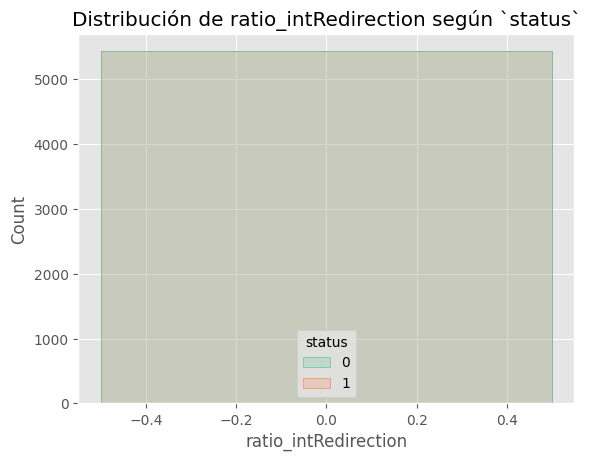

Matriz de Contingencia:


status                   0     1
ratio_intRedirection            
0                     5429  5429

In [415]:
analisis_contingencia(df_train, 'ratio_intRedirection', 'status')

Borrar, es constante

In [416]:
df_train = df_train.drop(columns=['ratio_intRedirection'], axis=1)

### **ratio_extRedirection**

ratio_extRedirection: Proporción de redirecciones externas respecto al total de redirecciones.

0: Todas son internas (normal en sitios legítimos).

1: Todas son externas (muy sospechoso).

Intermedio (0.1-0.9): Mezcla de internas y externas, a evaluar según contexto.

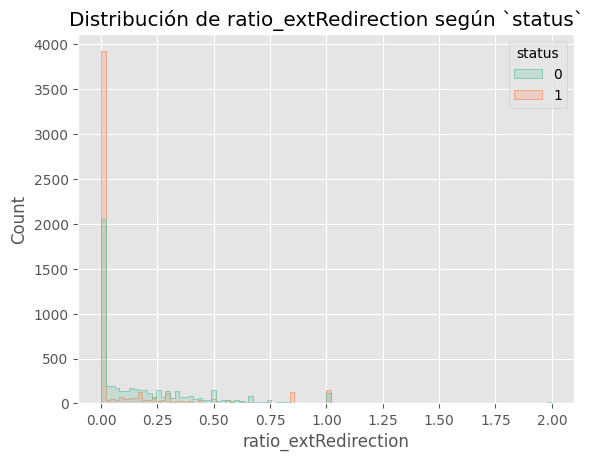

Matriz de Contingencia:


status                   0     1
ratio_extRedirection            
0.000                 1970  3882
0.002                    1     0
0.004                    1     0
0.005                    1     0
0.006                    1     0
0.007                    1     0
0.007                    1     0
0.007                    1     0
0.007                    3     0
0.007                    1     0

In [417]:
analisis_contingencia(df_train, 'ratio_extRedirection', 'status')

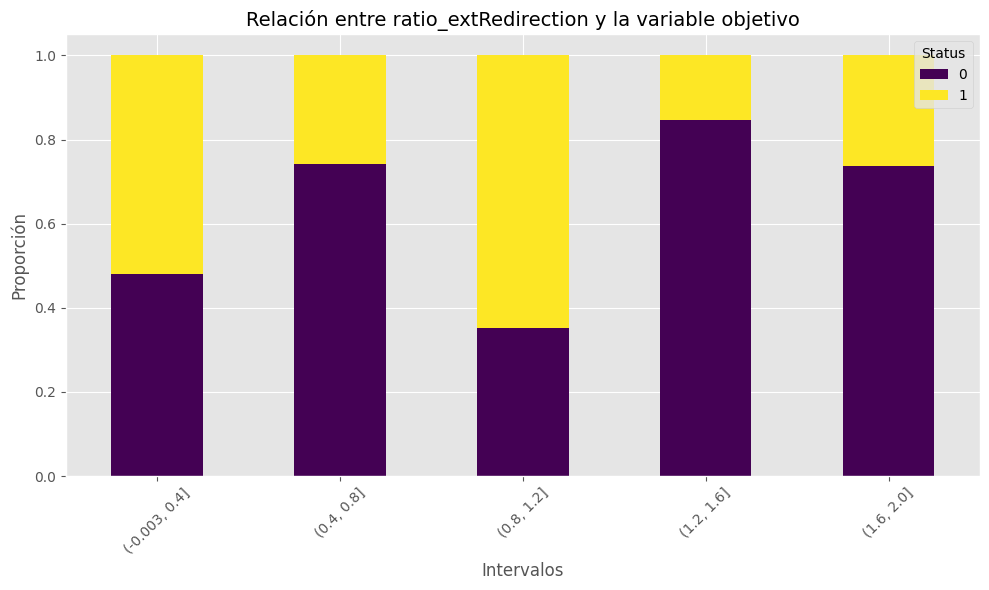

In [418]:
resultado = categorize_and_analyze(
    df_train, 
    column='ratio_extRedirection', 
    target='status', 
    bins=5
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("ratio_extRedirection_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre ratio_extRedirection y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

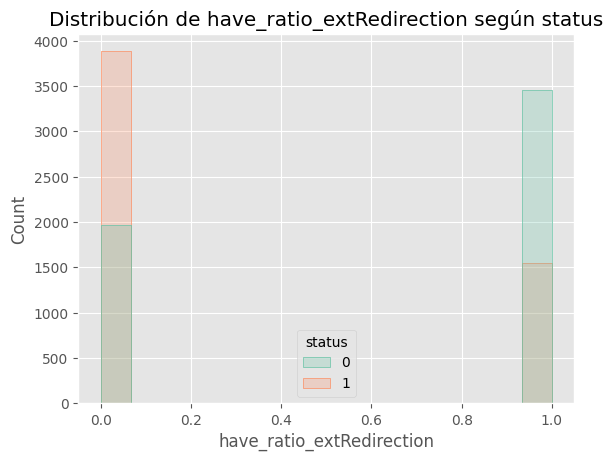

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                        0     1
have_ratio_extRedirection            
0                          1970  3882
1                          3459  1547

Coeficiente de Contingencia: 1353.5554
p-value: 0.0000


In [419]:
binary_analysis(df_train, 'ratio_extRedirection', 'status', '!=', 0)

Se aprecia relacion, mantener en binaria

### **ratio_intErrors**

ratio_intErrors: Proporción de errores internos (dentro del mismo dominio) respecto al total de errores detectados.

0: Todos los errores son externos (puede ser menos sospechoso).

1: Todos los errores son internos (normal en sitios legítimos).

Intermedio (0.1-0.9): Mezcla de errores internos y externos, a analiza

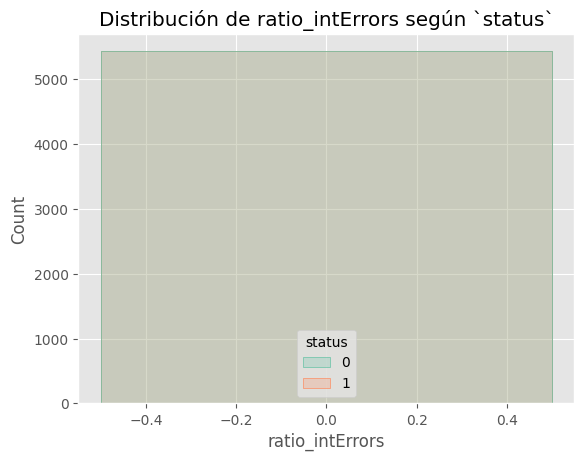

Matriz de Contingencia:


status              0     1
ratio_intErrors            
0                5429  5429

In [420]:
analisis_contingencia(df_train, 'ratio_intErrors', 'status')

Borrar, es constante

In [421]:
df_train = df_train.drop(columns=['ratio_intErrors'], axis=1)

### **ratio_extErrors**

ratio_extErrors: Proporción de errores externos (fuera del dominio) respecto al total de errores detectados.

0: Todos los errores son internos (normal en sitios legítimos).

1: Todos los errores son externos (puede ser sospechoso).

Intermedio (0.1-0.9): Mezcla de errores internos y externos, contexto dependiente.

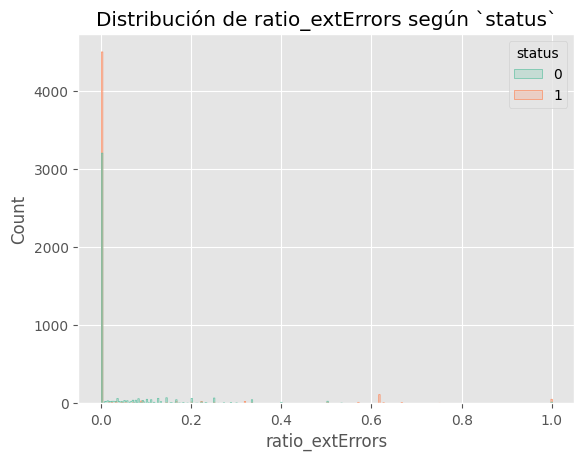

Matriz de Contingencia:


status              0     1
ratio_extErrors            
0.000            3212  4508
0.004               1     0
0.004               1     0
0.004               1     0
0.005               1     0
0.005               1     0
0.005               1     0
0.005               1     0
0.005               1     0
0.006               1     0

In [422]:
analisis_contingencia(df_train, 'ratio_extErrors', 'status')

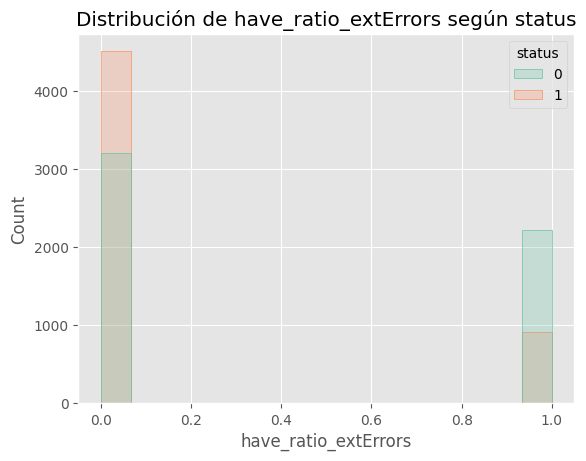

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                   0     1
have_ratio_extErrors            
0                     3212  4508
1                     2217   921

Coeficiente de Contingencia: 751.6560
p-value: 0.0000


In [423]:
binary_analysis(df_train, 'ratio_extErrors', 'status', '!=', 0)

La mantenemos en binaria por la relación

### **login_form**

login_form: Indica la presencia y configuración de un formulario de inicio de sesión en la página asociada a la URL.

0: No hay formulario de inicio de sesión (puede ser menos sospechoso, pero depende del sitio).

1: Hay formulario de inicio de sesión configurado correctamente (esperable en sitios legítimos).

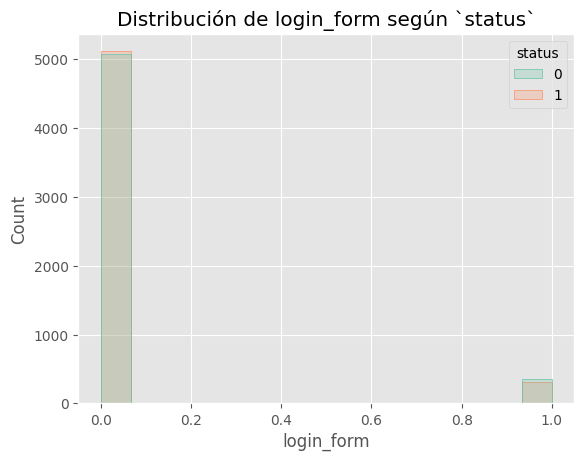

Matriz de Contingencia:


status         0     1
login_form            
0           5068  5112
1            361   317

In [424]:
analisis_contingencia(df_train, 'login_form', 'status')

No hay diferencia, descartamos la variable

In [425]:
df_train = df_train.drop(columns=['login_form'], axis=1)

### **external_favicon**

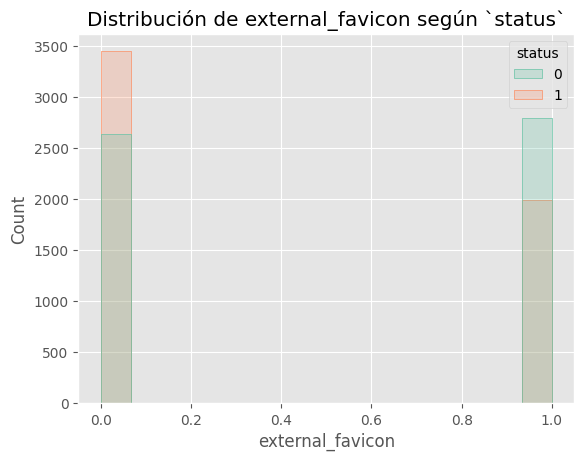

Matriz de Contingencia:


status               0     1
external_favicon            
0                 2634  3442
1                 2795  1987

In [426]:
analisis_contingencia(df_train, 'external_favicon', 'status')

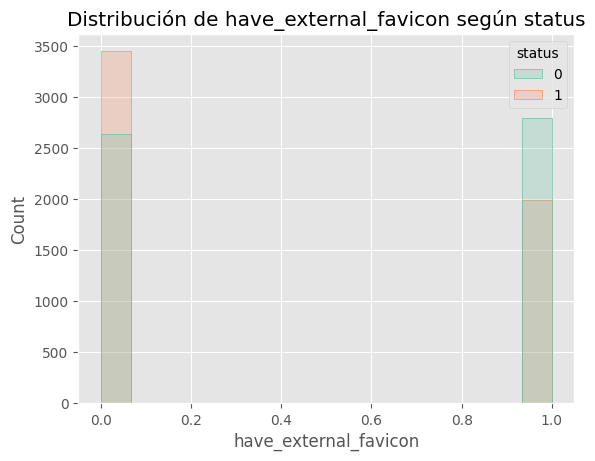

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: Cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                    0     1
have_external_favicon            
0                      2634  3442
1                      2795  1987

Coeficiente de Contingencia: 243.3714
p-value: 0.0000


In [427]:
binary_analysis(df_train, 'external_favicon', 'status', '!=', 0)

Lo mantenemos de momento, aunque no será variale principal

### **links_in_tags**

Se refiere a la proporcion de enlaces en las etiquetas

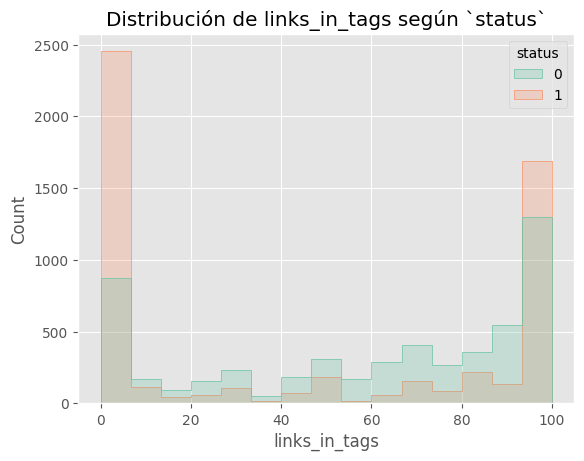

Matriz de Contingencia:


status           0     1
links_in_tags           
0.000          824  2411
0.209            1     0
0.209            1     0
1.370            1     0
1.408            1     0
1.562            1     0
1.754            1     0
1.887            0     1
1.942            1     0
1.961            1     3

In [428]:
analisis_contingencia(df_train, 'links_in_tags', 'status')

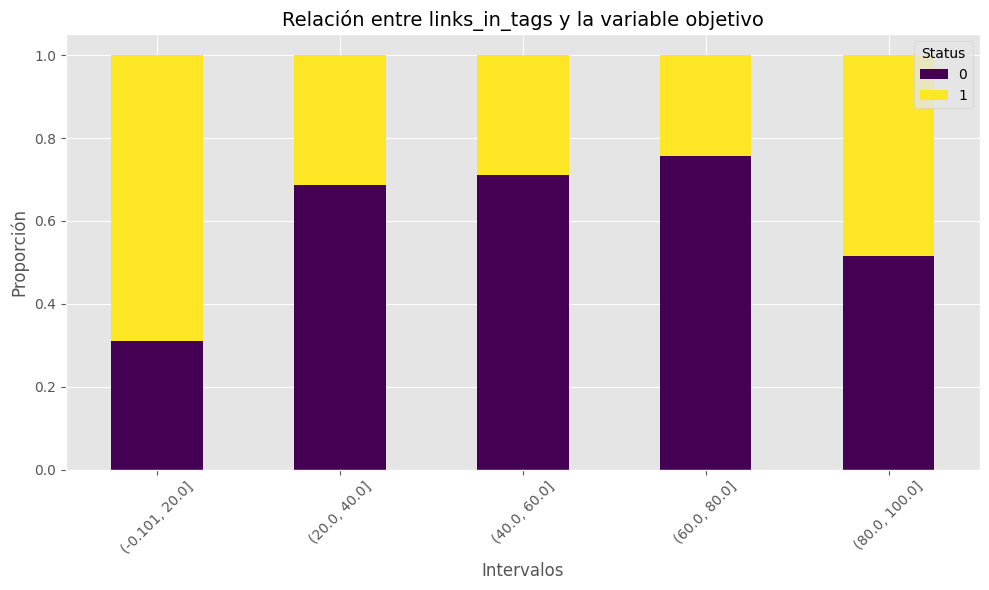

In [429]:
resultado = categorize_and_analyze(
    df_train, 
    column='links_in_tags', 
    target='status', 
    bins=5
)

# Configurar el DataFrame para el gráfico
df_plot = resultado.set_index("links_in_tags_interval")

# Crear el gráfico de barras apiladas
df_plot[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title("Relación entre links_in_tags y la variable objetivo", fontsize=14)
plt.ylabel("Proporción", fontsize=12)
plt.xlabel("Intervalos", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Status", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

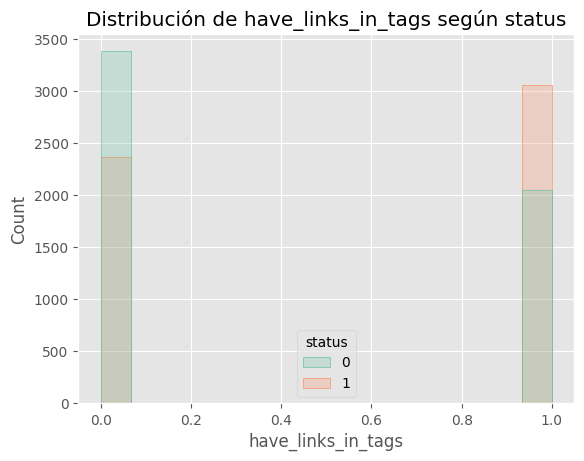

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: Cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                 0     1
have_links_in_tags            
0                   3379  2369
1                   2050  3060

Coeficiente de Contingencia: 376.3522
p-value: 0.0000


In [430]:
binary_analysis(df_train, 'links_in_tags', 'status', '<=', 50)

Está bastante repartido, en principio la descartamos

### **submit_email**

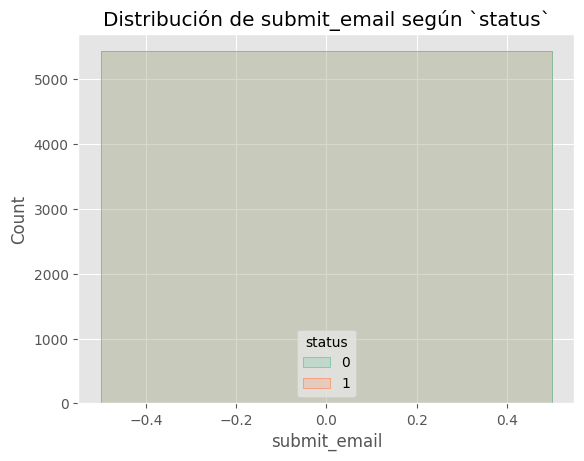

Matriz de Contingencia:


status           0     1
submit_email            
0             5429  5429

In [431]:
analisis_contingencia(df_train, 'submit_email', 'status')

Borramos submit_email

In [432]:
df_train = df_train.drop(columns=['submit_email'], axis=1)

### **ratio_intMedia**

ratio_intMedia: Proporción de medios internos (imágenes, videos, etc.) respecto al total de medios referenciados en la página.

0: Todos los medios son externos (sospechoso, típico en sitios maliciosos).

1: Todos los medios son internos (normal en sitios legítimos).

Intermedio (0.1-0.9): Mezcla de internos y externos, depende del contexto del sitio.


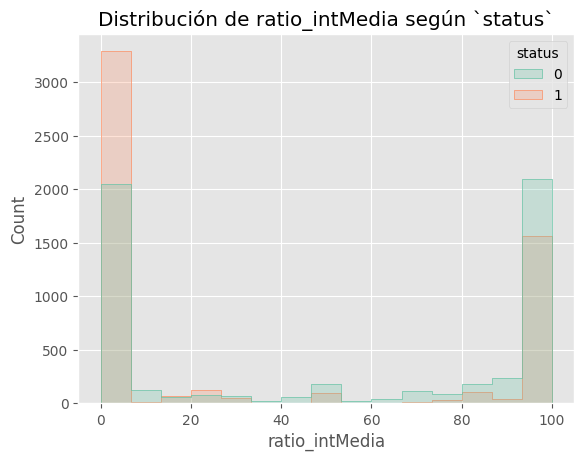

Matriz de Contingencia:


status             0     1
ratio_intMedia            
0.000           1923  3279
0.581              1     0
0.656              1     0
0.877              1     0
0.909              1     0
0.935              1     0
0.980              0     3
1.000              1     0
1.136              1     0
1.299              3     0

In [433]:
analisis_contingencia(df_train, 'ratio_intMedia', 'status')

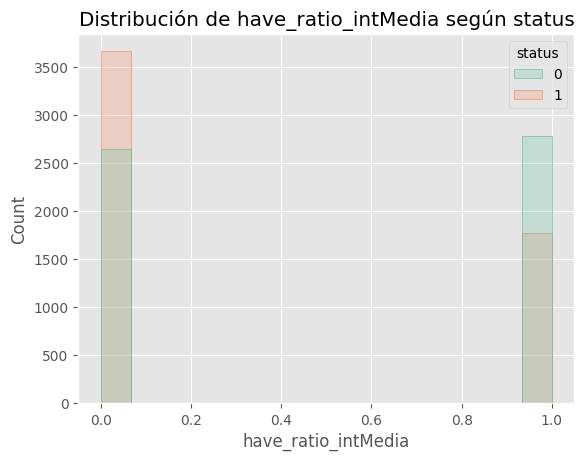

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                  0     1
have_ratio_intMedia            
0                    2645  3658
1                    2784  1771

Coeficiente de Contingencia: 387.3247
p-value: 0.0000


In [434]:
binary_analysis (df_train, 'ratio_intMedia', 'status', '>', 50)

De momento la descartamos

In [435]:
df_train = df_train.drop(columns=['ratio_intMedia'], axis=1)

### **ratio_extMedia**

ratio_extMedia: Proporción de medios externos (imágenes, videos, etc.) respecto al total de medios referenciados en la página.

0: Todos los medios son internos (normal en sitios legítimos).

1: Todos los medios son externos (sospechoso, típico en phishing).

Intermedio (0.1-0.9): Mezcla de internos y externos, evaluar según contexto.

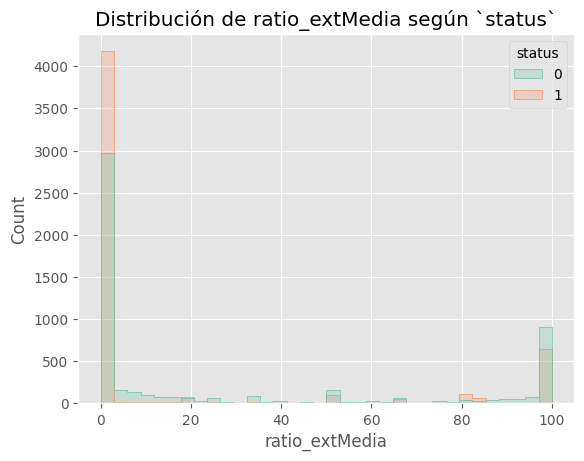

Matriz de Contingencia:


status             0     1
ratio_extMedia            
0.000           2838  4153
0.214              1     0
0.302              1     0
0.341              1     0
0.348              1     0
0.398              1     0
0.505              1     1
0.508              1     0
0.521              1     0
0.542              1     0

In [436]:
analisis_contingencia(df_train, 'ratio_extMedia', 'status')

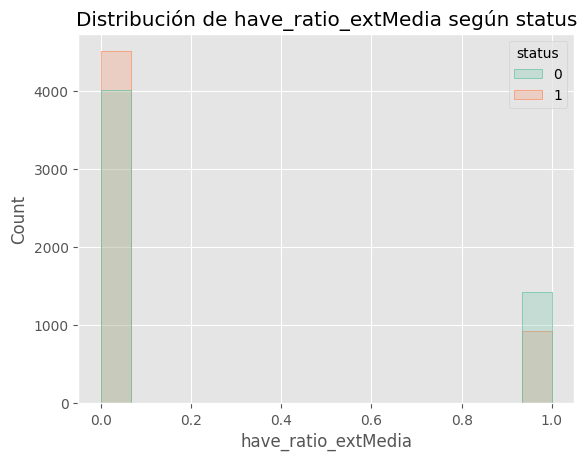

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                  0     1
have_ratio_extMedia            
0                    4002  4501
1                    1427   928

Coeficiente de Contingencia: 134.4762
p-value: 0.0000


In [437]:
binary_analysis(df_train, 'ratio_extMedia', 'status', '>', 50)

Demasiado repartido, la descartamos

In [438]:
df_train = df_train.drop(columns=['ratio_extMedia'], axis=1)

### **sfh**

sfh (Server Form Handler): Evalúa la ubicación del controlador de formularios (action) en una página con formulario de entrada.


0: El controlador del formulario apunta a un dominio externo (sospechoso).

1: El controlador del formulario apunta al mismo dominio (normal en sitios legítimos).

2: El controlador del formulario está vacío o faltante (muy sospechoso, típico en phishing).

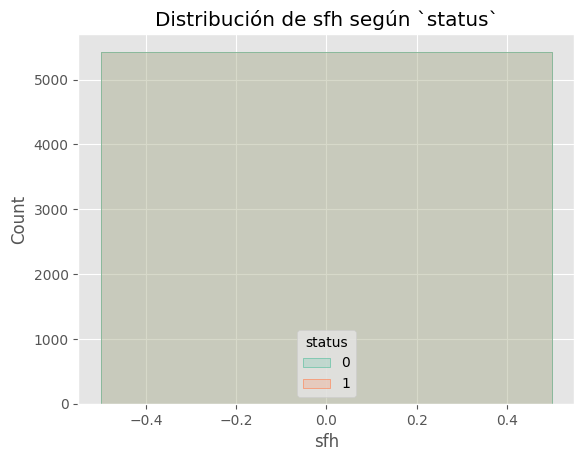

Matriz de Contingencia:


status     0     1
sfh               
0       5429  5429

In [439]:
analisis_contingencia(df_train, 'sfh', 'status')

Borrar, es constante

In [440]:
df_train = df_train.drop(columns=['sfh'], axis=1)

### **iframe**

 Indica el uso de etiquetas iframe en la página, comúnmente asociadas con prácticas sospechosas en phishing.

0: No hay iframe (normal en sitios legítimos).

1: Se detectan iframe (potencialmente sospechoso).

2: iframe ocultos o con propiedades sospechosas (típico en phishing).

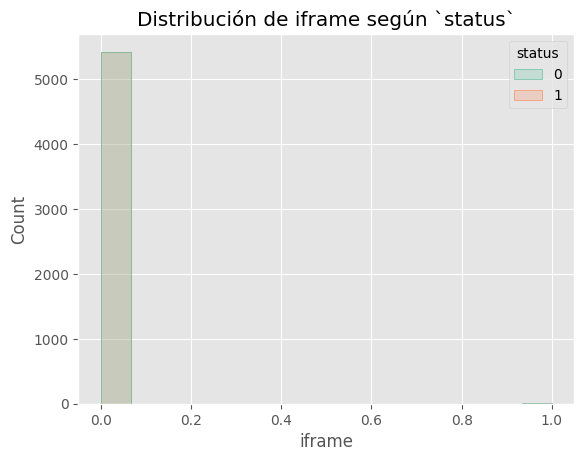

Matriz de Contingencia:


status     0     1
iframe            
0       5419  5424
1         10     5

In [441]:
analisis_contingencia(df_train, 'iframe', 'status')

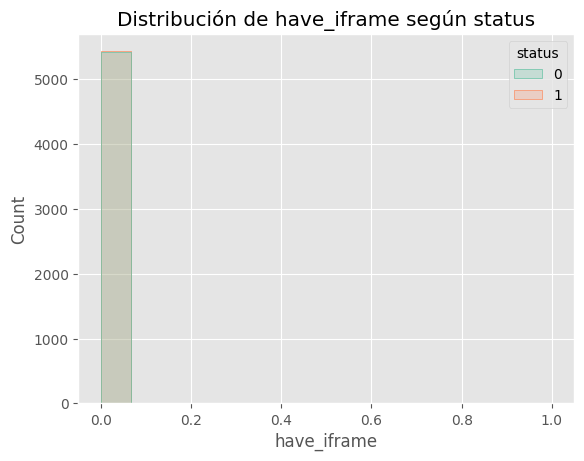

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: Cumple
Prueba de Kruskal-Wallis: No hay relación significativa (p-value = 0.1964)
Matriz de Contingencia:


status          0     1
have_iframe            
0            5419  5424
1              10     5

Coeficiente de Contingencia: 1.0681
p-value: 0.3014


In [442]:
binary_analysis(df_train, 'iframe', 'status', '!=', 0)

No hay relacion, descartamos

In [443]:
df_train = df_train.drop(columns=['have_iframe'], axis=1)

### **popup_window**

Indica si la página utiliza ventanas emergentes (pop-ups), que a menudo se asocian con phishing o comportamientos intrusivos.

0: No hay ventanas emergentes (normal en sitios legítimos).

1: Presencia de pop-ups (puede ser sospechoso según el contexto).

2: Pop-ups con contenido sospechoso o intrusivo (típico en phishing).

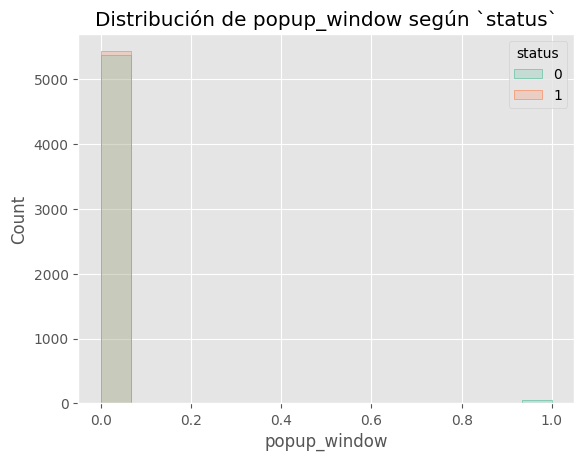

Matriz de Contingencia:


status           0     1
popup_window            
0             5371  5420
1               58     9

In [444]:
analisis_contingencia(df_train, 'popup_window', 'status')

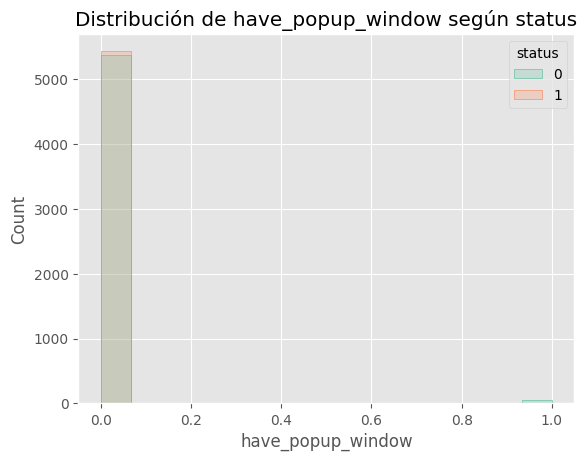

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                0     1
have_popup_window            
0                  5371  5420
1                    58     9

Coeficiente de Contingencia: 34.6016
p-value: 0.0000


In [445]:
binary_analysis(df_train, 'popup_window', 'status', '!=', 0)

Baja relacion, descartamos

In [446]:
df_train = df_train.drop(columns=['have_popup_window'], axis=1)

### **safe_anchor**

Evalúa el uso de enlaces (a) en la página y si sus destinos son seguros o sospechosos.

0: Los enlaces apuntan a destinos externos (puede ser sospechoso).

1: La mayoría de los enlaces son seguros y apuntan a destinos internos (normal en sitios legítimos).

Intermedio (0.1-0.9): Mezcla de enlaces internos y externos, a analizar según contexto.

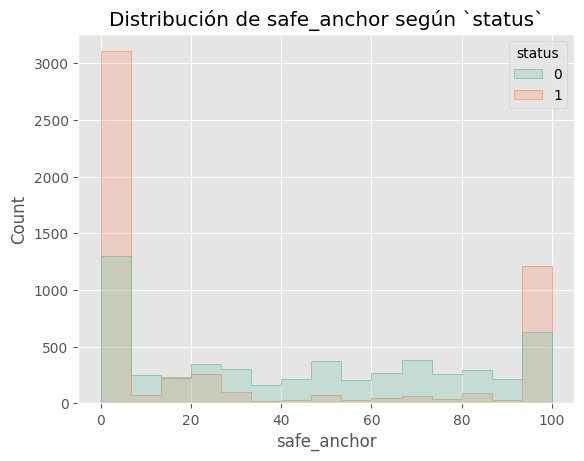

Matriz de Contingencia:


status          0     1
safe_anchor            
0.000        1191  3028
0.645           1     0
0.730           1     0
0.746           0     1
0.775           1     0
0.909           0     1
1.136           1     0
1.235           1     0
1.250           1     0
1.370           0     1

In [447]:
analisis_contingencia(df_train, 'safe_anchor', 'status')

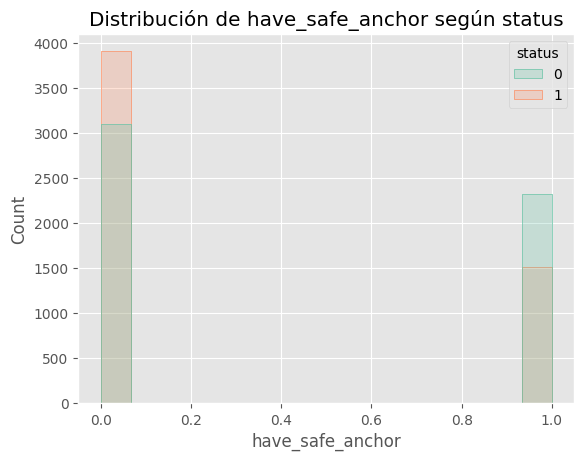

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status               0     1
have_safe_anchor            
0                 3102  3911
1                 2327  1518

Coeficiente de Contingencia: 262.8890
p-value: 0.0000


In [448]:
binary_analysis(df_train, 'safe_anchor', 'status', '>', 50)

Mantenemos la variable continua

### **onmouseover**

 Indica si se utiliza el evento onmouseover en la página, comúnmente asociado a comportamientos sospechosos en phishing.

0: No se utiliza onmouseover (normal en sitios legítimos).

1: Se utiliza onmouseover (puede ser sospechoso, dependiendo de su uso).

2: Uso malicioso, como redirecciones ocultas o cambios de URL al pasar el ratón (típico en phishing).


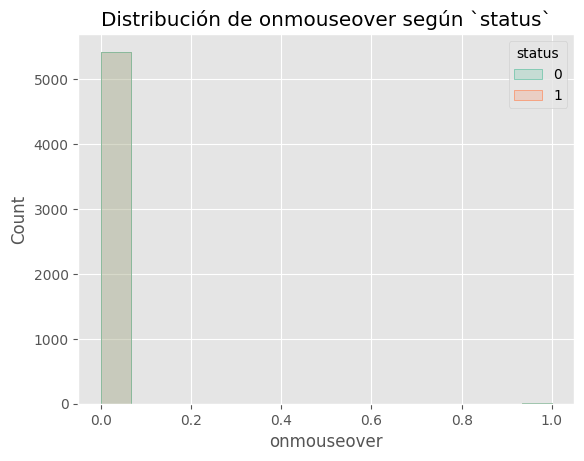

Matriz de Contingencia:


status          0     1
onmouseover            
0            5421  5424
1               8     5

In [449]:
analisis_contingencia(df_train, 'onmouseover', 'status')

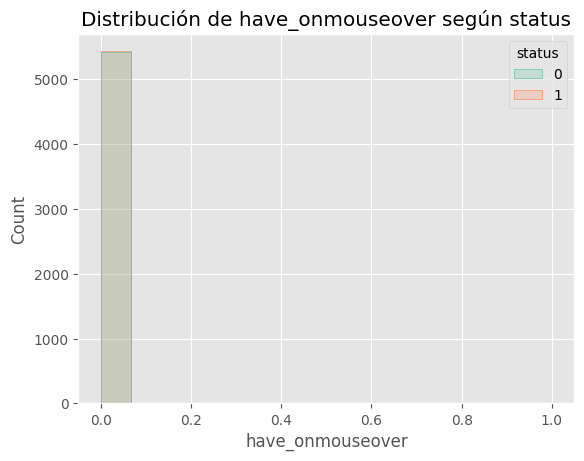

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: Cumple
Prueba de Kruskal-Wallis: No hay relación significativa (p-value = 0.4051)
Matriz de Contingencia:


status               0     1
have_onmouseover            
0                 5421  5424
1                    8     5

Coeficiente de Contingencia: 0.3081
p-value: 0.5789


In [450]:
binary_analysis(df_train, 'onmouseover', 'status', '!=', 0)

Muy repartida, descartamos

In [451]:
df_train = df_train.drop(columns=['have_onmouseover'], axis=1)

### **right_clic**

Indica si se ha deshabilitado el clic derecho en la página, una práctica que puede ser usada en phishing para evitar inspección o copia de elementos.

0: El clic derecho está habilitado (normal en sitios legítimos).

1: El clic derecho está deshabilitado (sospechoso, común en phishing).

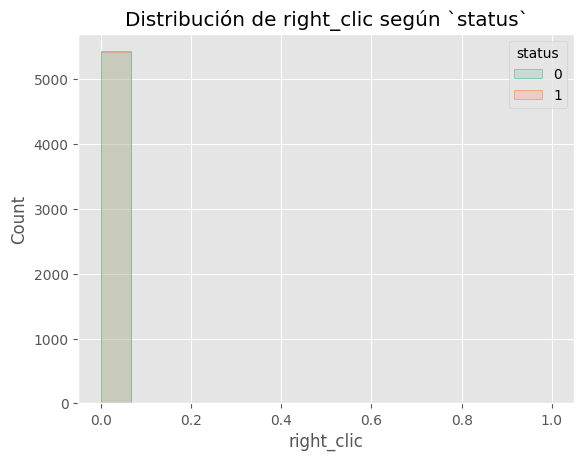

Matriz de Contingencia:


status         0     1
right_clic            
0           5422  5420
1              7     9

In [452]:
analisis_contingencia(df_train, 'right_clic', 'status')

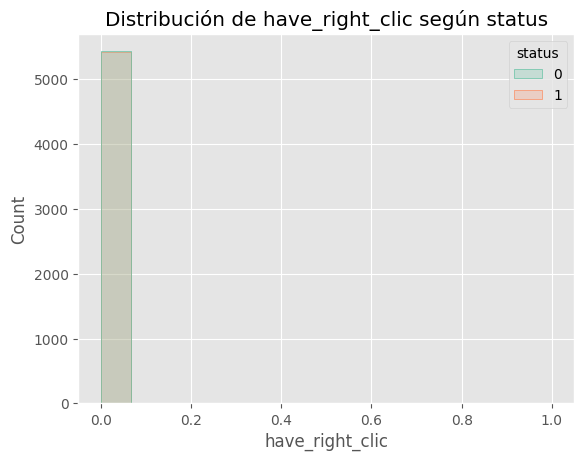

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: Cumple
Prueba de Kruskal-Wallis: No hay relación significativa (p-value = 0.6168)
Matriz de Contingencia:


status              0     1
have_right_clic            
0                5422  5420
1                   7     9

Coeficiente de Contingencia: 0.0626
p-value: 0.8024


In [453]:
binary_analysis(df_train, 'right_clic', 'status', '!=', 0)

No hay relación, descartamos

In [454]:
df_train = df_train.drop(columns=['have_right_clic'], axis=1)

### **empty_title**

empty_title: Indica si la página tiene un título (title) vacío o faltante.


0: La página tiene un título válido (normal en sitios legítimos).

1: El título está vacío o no existe (sospechoso, típico en phishing)


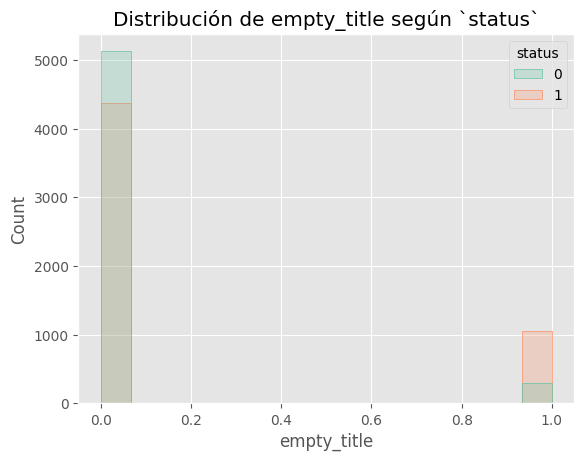

Matriz de Contingencia:


status          0     1
empty_title            
0            5126  4373
1             303  1056

In [455]:
analisis_contingencia(df_train, 'empty_title', 'status')

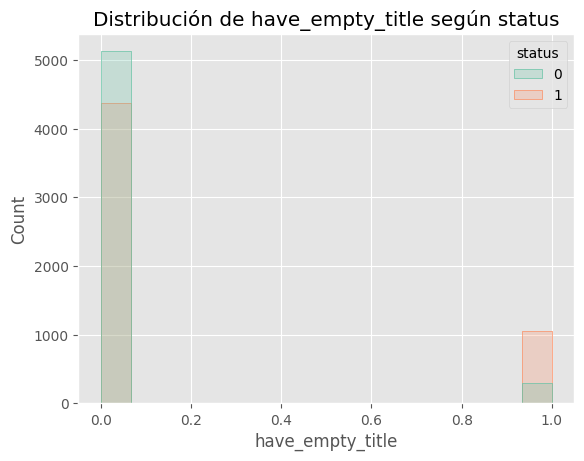

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status               0     1
have_empty_title            
0                 5126  4373
1                  303  1056

Coeficiente de Contingencia: 475.6507
p-value: 0.0000


In [456]:
binary_analysis(df_train, 'empty_title', 'status', '!=', 0)

Mantenemos la variable y añadimos empty_title = 1 a is_weird

In [457]:
is_weird.append('have_empty_title')

### **domain_in_title**

 Indica si el dominio principal de la URL aparece en el título de la página.

0: El dominio no está en el título (puede ser sospechoso si debería estar).

1: El dominio aparece en el título (normal en sitios legítimos).


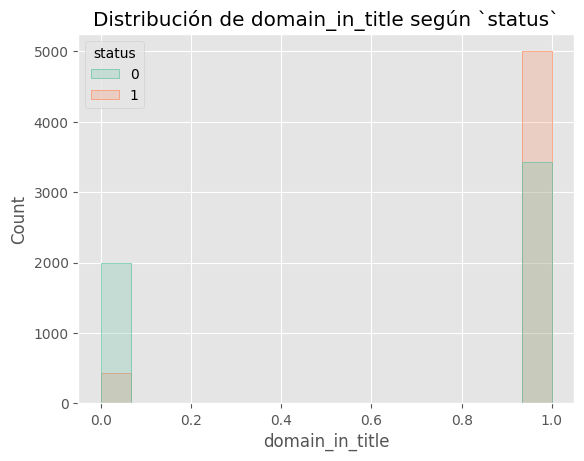

Matriz de Contingencia:


status              0     1
domain_in_title            
0                1996   434
1                3433  4995

In [458]:
analisis_contingencia(df_train, 'domain_in_title', 'status')

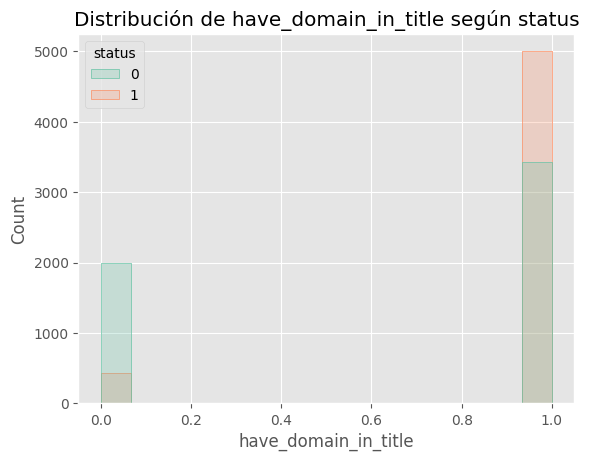

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                   0     1
have_domain_in_title            
0                     1996   434
1                     3433  4995

Coeficiente de Contingencia: 1291.8879
p-value: 0.0000


In [459]:
binary_analysis(df_train, 'domain_in_title', 'status', '!=', 0)

La variable tiene alta importancia, la mantenemos

### **domain_with_copyright**

Indica si el dominio principal de la URL aparece en la declaración de derechos de autor (copyright) de la página.

0: El dominio no está en el texto de copyright (puede ser sospechoso).

1: El dominio está presente en el texto de copyright (normal en sitios legítimos).

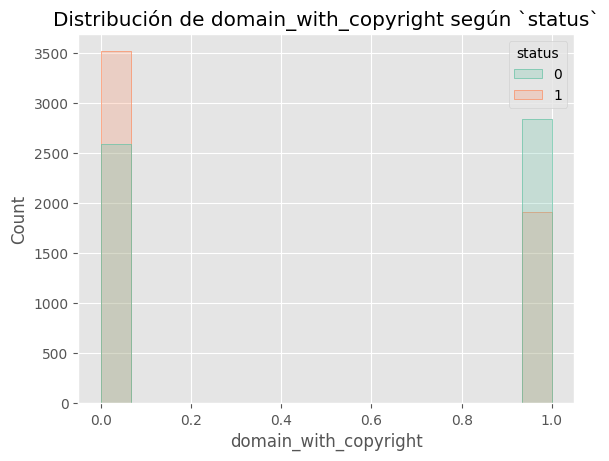

Matriz de Contingencia:


status                    0     1
domain_with_copyright            
0                      2589  3518
1                      2840  1911

In [460]:
analisis_contingencia(df_train, 'domain_with_copyright', 'status')

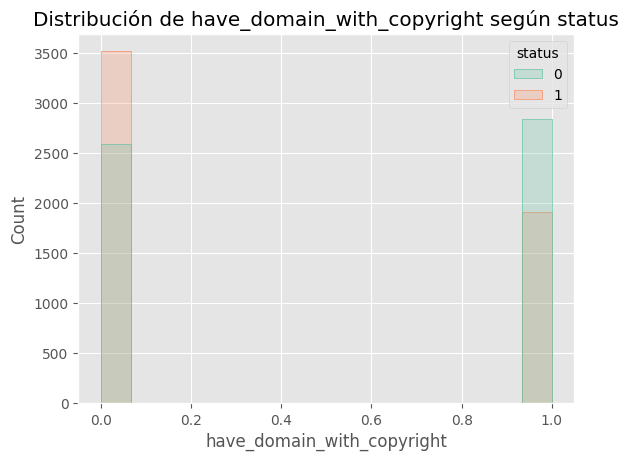

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                         0     1
have_domain_with_copyright            
0                           2589  3518
1                           2840  1911

Coeficiente de Contingencia: 322.2796
p-value: 0.0000


In [461]:
binary_analysis(df_train, 'domain_with_copyright', 'status', '!=', 0)

Es una variable importante, la mantenemos

## **whois_registered_domain**

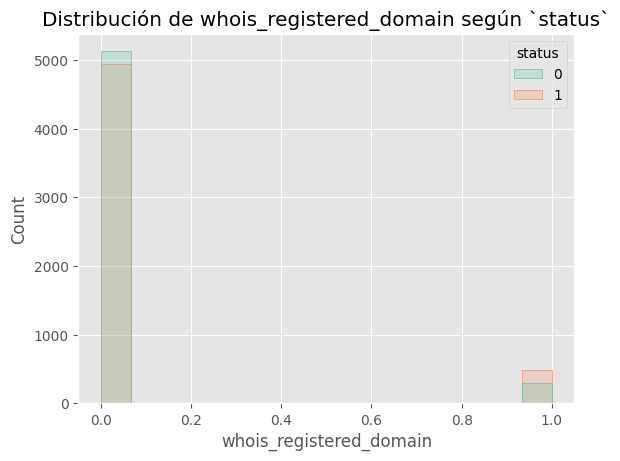

Matriz de Contingencia:


status                      0     1
whois_registered_domain            
0                        5126  4938
1                         303   491

In [462]:
analisis_contingencia(df_train, 'whois_registered_domain', 'status')

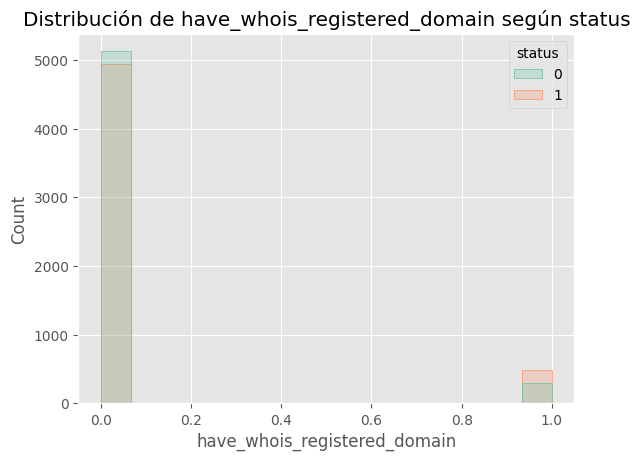

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                           0     1
have_whois_registered_domain            
0                             5126  4938
1                              303   491

Coeficiente de Contingencia: 47.5162
p-value: 0.0000


In [463]:
binary_analysis(df_train, 'whois_registered_domain', 'status', '!=', 0)

Demasiado repartida, en principio descartamos

## **domain_registration_length**

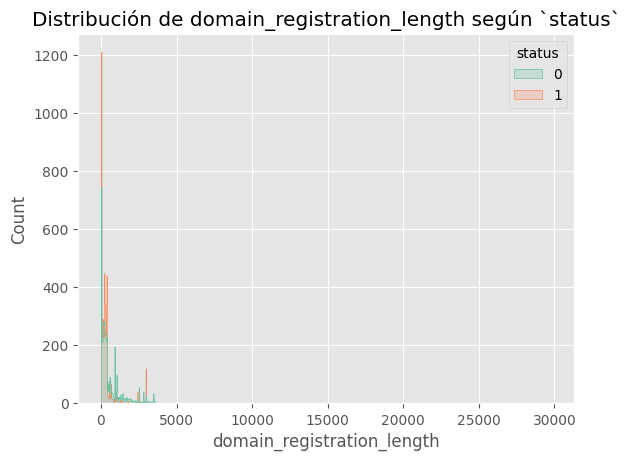

Matriz de Contingencia:


status                        0    1
domain_registration_length          
-1                           32   13
 0                          620  727
 1                            2    3
 2                            1    7
 3                            3    5
 4                            2    7
 5                            3    3
 6                            0    6
 7                            5    7
 8                            1    4

In [464]:
analisis_contingencia(df_train, 'domain_registration_length', 'status')

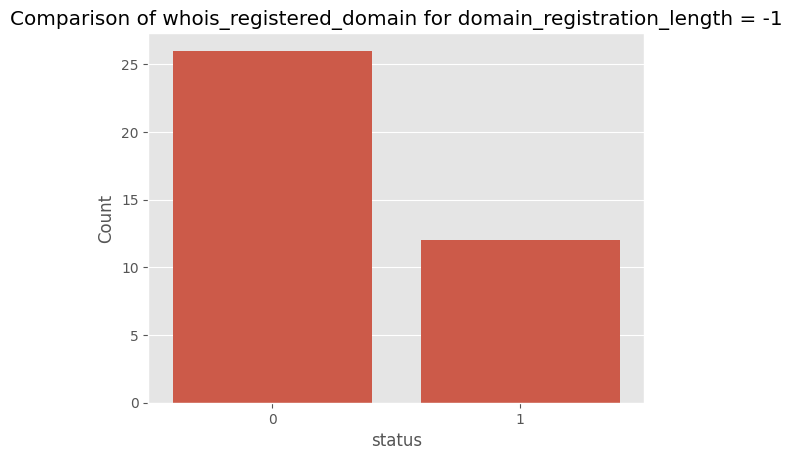

In [465]:
# Filter the dataframe for domain_registration_length negativo y domain_age negativo
filtered_df = df_train[(df_train['domain_registration_length'] < 0) & (df_train['domain_age'] < 0)]

# Create a count plot to compare whois_registered_domain
sns.countplot(data=filtered_df, x='status')
plt.title('Comparison of whois_registered_domain for domain_registration_length = -1')
plt.xlabel('status')
plt.ylabel('Count')
plt.show()


Tiene valores negativos, esto no tiene sentido. Tampoco aporta demasiada informacion, descartar

In [466]:
df_train = df_train.drop(columns=['domain_registration_length'], axis=1)

### **domain_age**

La edad del dominio es un aspecto importante, ya que estas URL se abandonan antes de llevar muchos años o son denunciadas y cerradas

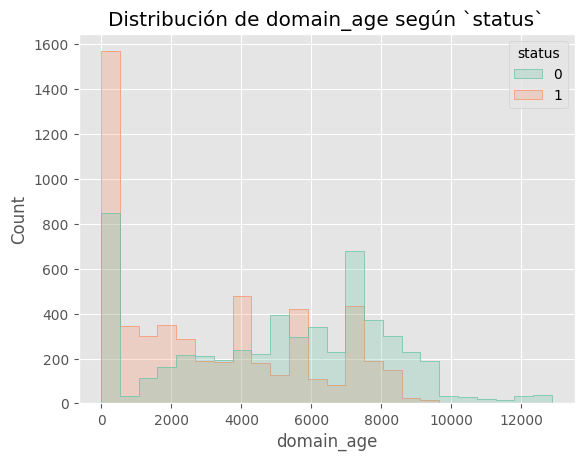

Matriz de Contingencia:


status        0    1
domain_age          
-12           0    1
-2           22   30
-1          790  911
 0            0    5
 1            0   23
 2            0   11
 3            0    3
 4            0    7
 5            0   14
 6            0    3

In [467]:
analisis_contingencia(df_train, 'domain_age', 'status')

Valores negativos de domain age, no tiene sentido, además hay demasiados registros en -1
Hay demasiados valores en un rango negativo, de hecho, la descartamos

In [468]:
df_train = df_train.drop(columns=['domain_age'], axis=1)

### **web_traffic**

Una web con mayor trafico suele significar que es legitima

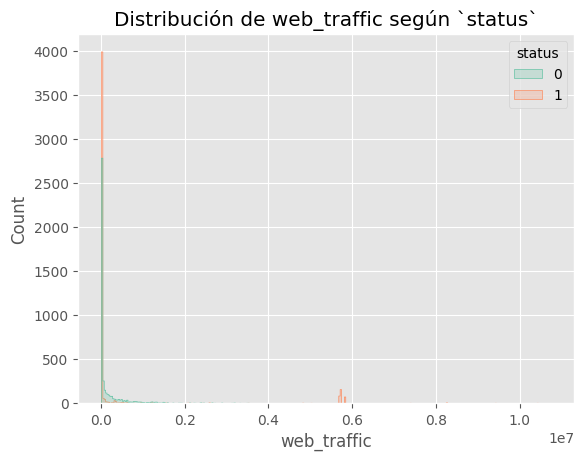

Matriz de Contingencia:


status         0     1
web_traffic           
0            790  3429
1             22   117
2             36     1
4              1     0
8             34     0
11             1     0
12           157     0
13            18     0
15             4     0
16             1     0

In [469]:
analisis_contingencia(df_train, 'web_traffic', 'status')

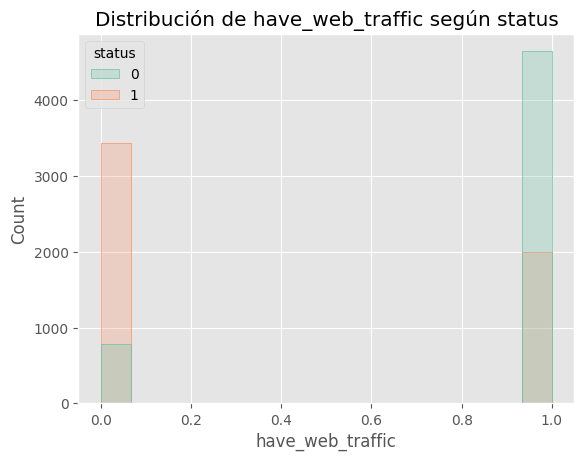

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status               0     1
have_web_traffic            
0                  790  3429
1                 4639  2000

Coeficiente de Contingencia: 2697.6601
p-value: 0.0000


In [470]:
binary_analysis(df_train, 'web_traffic', 'status', '!=', 0)

Marcamos las webs con 0 trafico como is_weird

In [471]:
is_weird.append('have_web_traffic')

### **dns_record**

dns_record: Indica si el dominio de la URL tiene un registro DNS válido, lo que confirma que el dominio está configurado correctamente para resolver direcciones.

0: No tiene un registro DNS válido (muy sospechoso, típico en phishing o dominios falsos).

1: Tiene un registro DNS válido (normal en sitios legítimos).

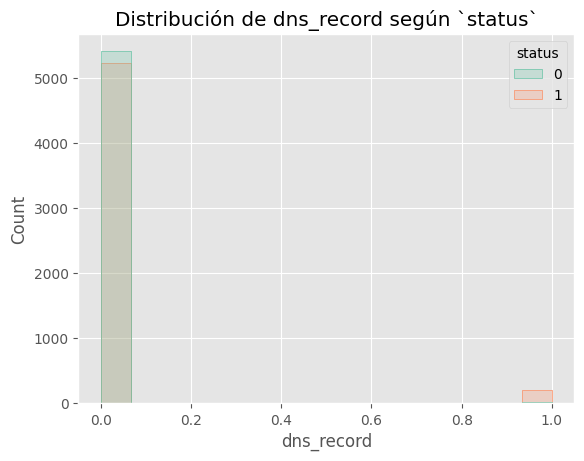

Matriz de Contingencia:


status         0     1
dns_record            
0           5412  5229
1             17   200

In [472]:
analisis_contingencia(df_train, 'dns_record', 'status')

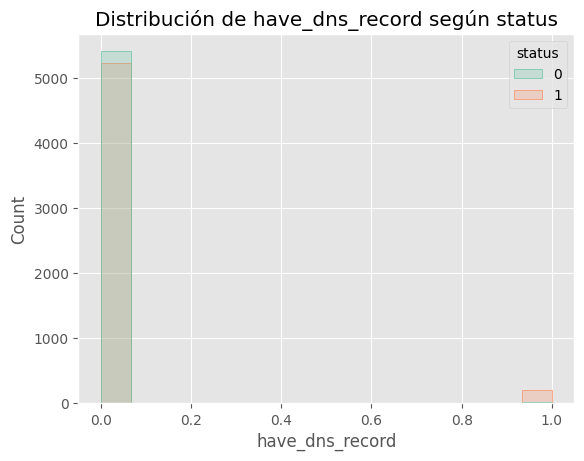

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status              0     1
have_dns_record            
0                5412  5229
1                  17   200

Coeficiente de Contingencia: 155.7580
p-value: 0.0000


In [473]:
binary_analysis(df_train, 'dns_record', 'status', '!=', 0)

Marcamos have_dns_record como is_weird

In [474]:
is_weird.append('have_dns_record')

### **google_index**

google_index: Indica si la URL está indexada en Google, lo que refleja su visibilidad y reputación.

0: No está indexada en Google (sospechoso, típico en phishing o sitios nuevos/maliciosos).

1: Está indexada en Google (normal en sitios legítimos).

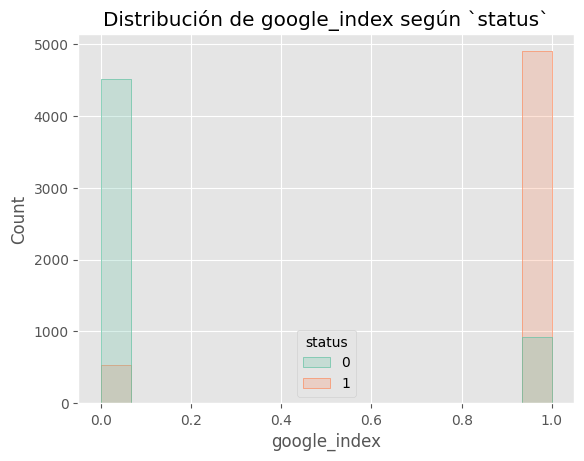

Matriz de Contingencia:


status           0     1
google_index            
0             4508   538
1              921  4891

In [475]:
analisis_contingencia(df_train, 'google_index', 'status')

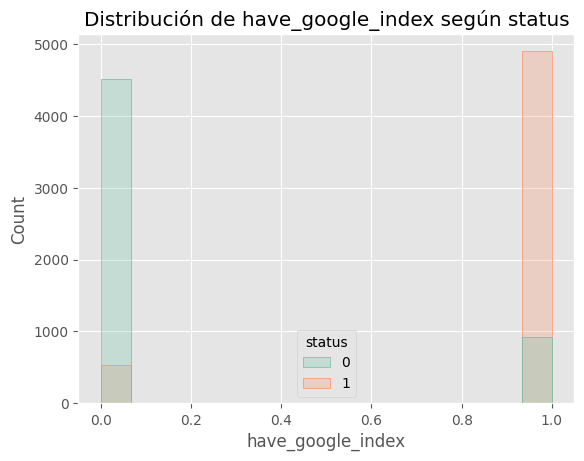

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status                0     1
have_google_index            
0                  4508   538
1                   921  4891

Coeficiente de Contingencia: 5832.2910
p-value: 0.0000


In [476]:
binary_analysis(df_train, 'google_index', 'status', '!=', 0)

marcamos google_index en is_weird y la mantenemos como variable importante

In [477]:
is_weird.append('have_google_index')

### **page_rank**

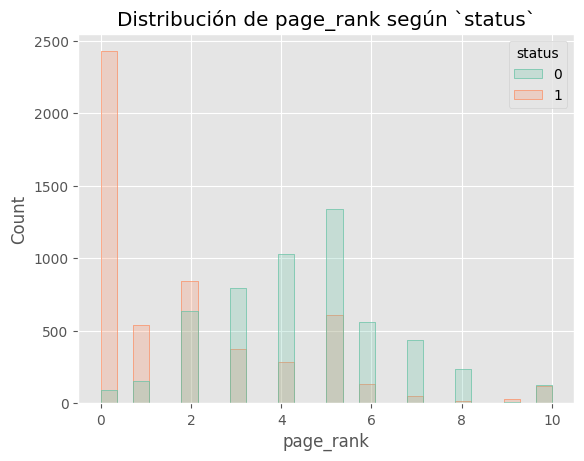

Matriz de Contingencia:


status        0     1
page_rank            
0            95  2425
1           157   539
2           637   845
3           797   373
4          1028   286
5          1342   607
6           564   132
7           437    53
8           234    19
9            10    28

In [478]:
analisis_contingencia(df_train, 'page_rank', 'status')

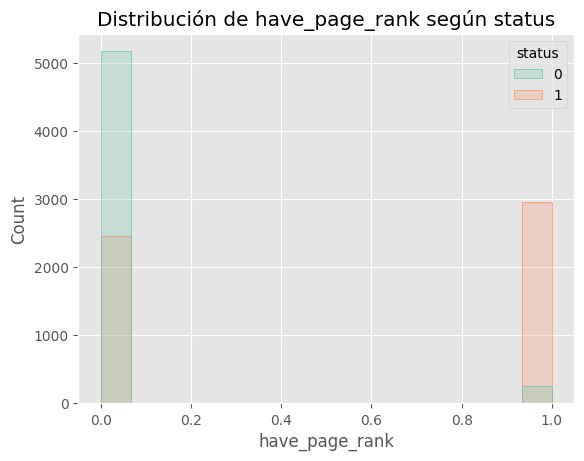

Resultados de las pruebas preliminares:
Normalidad: No cumple
Independencia: Cumple
Homocedasticidad: No cumple
Prueba de Kruskal-Wallis: Las variables están relacionadas (p-value = 0.0000)
Matriz de Contingencia:


status             0     1
have_page_rank            
0               5177  2465
1                252  2964

Coeficiente de Contingencia: 3247.0262
p-value: 0.0000


In [479]:
binary_analysis(df_train, 'page_rank', 'status', '<', 2)

Marcamos aquellas con menos de 2 de page rank como is_weird y mantenemos la variable

In [480]:
is_weird.append('have_page_rank')

# Aplicacion de Is_weird

Is_weird se aplicará en modelado, su función es la siguiente:

Se sumara 1 punto en is_weird por cada criterio de potencialmente peligrosa acumulen